### **Problem statement: Heart disease prediction?**

"Heart disease is broad term used for diseases and conditions affecting the heart and circulatory system. They are also referred as cardiovascular diseases. It is a major cause of disability all around the world. Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of the body as well. There are several different types and forms of heart diseases. The most common ones cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, enlargement in the size of heart and several others leading to **heart failure** and **heart attack**."

**Key facts according to WHO (World Health Organaizations)**

- Cardiovascular diseases (CVDs) are the leading cause of death globally.
- An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.
- Over three quarters of CVD deaths take place in low- and middle-income countries.
- Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2019, 38% were caused by CVDs.
- Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol.
- It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.

**Objective**
* Explore the heart disease dataset using exploratory data analysis (EDA) 
* Exercise with classification Using deep learning (Pytorch). 


In [1]:
#importing the necesary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import seaborn as sns
import torchvision
from torchvision import datasets

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.describe().T

count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
sex       1025.0    0.695610   0.460373    0.0    0.0    1.0    1.0    1.0
cp        1025.0    0.942439   1.029641    0.0    0.0    1.0    2.0    3.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
fbs       1025.0    0.149268   0.356527    0.0    0.0    0.0    0.0    1.0
restecg   1025.0    0.529756   0.527878    0.0    0.0    1.0    1.0    2.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
exang     1025.0    0.336585   0.472772    0.0    0.0    0.0    1.0    1.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2
slope     1025.0    1.385366   0.617755    0.0    1.0    1.0    2.0    2.0
ca        1025.0    0.754146   1.030798    0.0    0.0    0.0    1.0    4.0
thal      1025.0    2.323902   0.620660    0.0    2.0    2.0    3.0    3.0
target    1025.0    0.513171   0.500070    0.0    0.0    1.0    1.0    1.0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


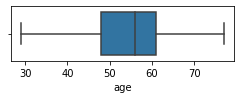

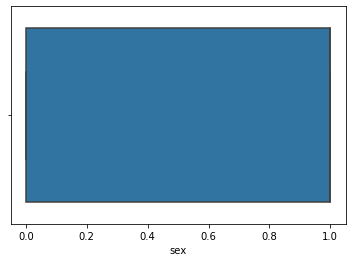

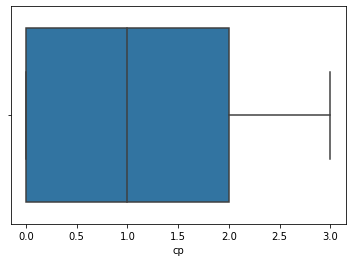

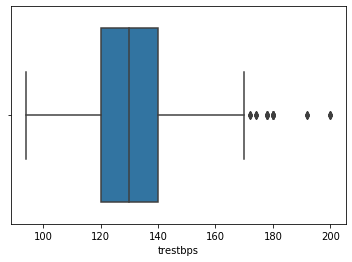

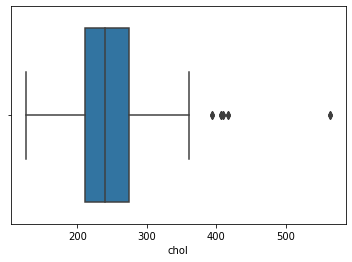

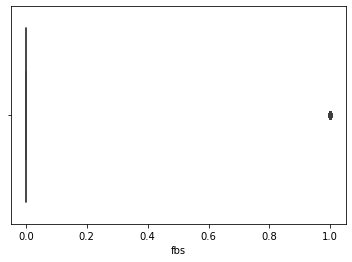

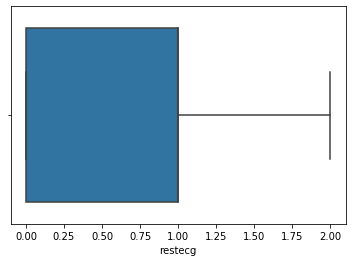

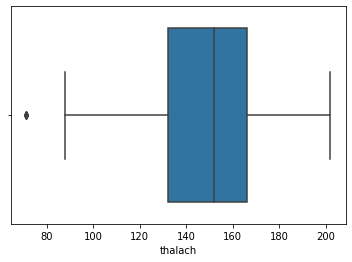

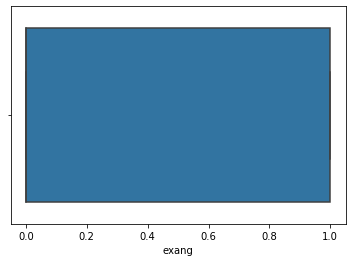

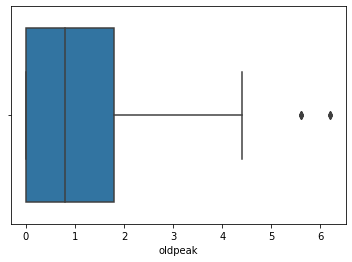

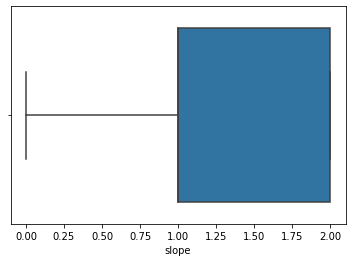

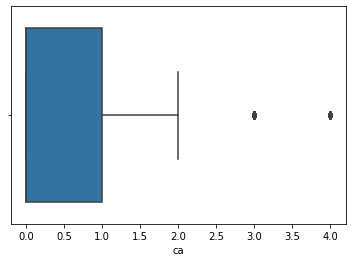

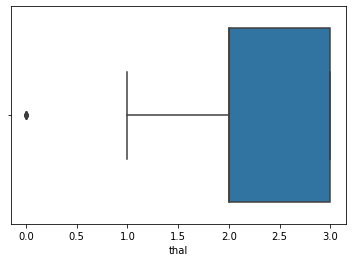

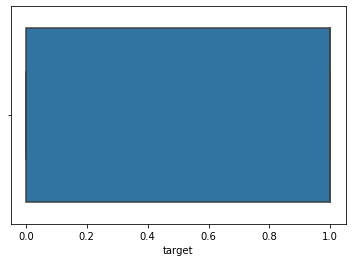

In [5]:
cols = data.columns
plt.figure(figsize = (4,1))
for col in cols: 
    sns.boxplot(data[col])
    plt.show()

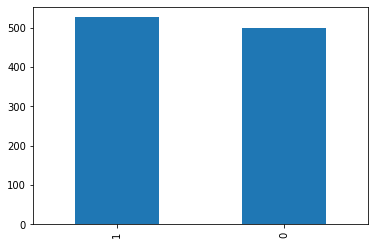

In [6]:
#Checking for bias in the dependent variable
data.target.value_counts().plot(kind = 'bar')

In [7]:
#The values are almost equal, so there is likely that there will be 
#no bias in the model. 

In [8]:
sample_size = data.shape[0]
train_size = int(0.8 * sample_size)
test_size = int(0.2 * sample_size)
train = data.iloc[: train_size + 1, :].values
test = data.iloc[test_size + 1 :, : ].values


In [9]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [10]:
class Data(Dataset):
    def __init__(self, data):
        x = data[:, :-1]
        y = data[:, -1]
        self.X = torch.tensor(x, dtype = torch.float32, requires_grad = True)
        self.y = torch.LongTensor(y)
        self.length = x.shape[0]
    
    def __len__(self):
        return self.length
    
    def __call__(self):
        return self.X, self.y
    
    def __getitem__(self, index) : 
        return self.X[index] , self.y[index]

In [11]:
train = Data(train)
test = Data(test)

In [23]:
#setting the hyperparameters.
X_train, y_train = train()
epoch = 50
learning_rate = 0.02
inp = X_train.shape[1]

In [24]:
import torch.nn.functional as F
#Creating the neural network model 
class Predictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(inp, 512)
        self.hidden1 = nn.Linear(512, 256)
        self.hidden2 = nn.Linear(256, 128)
        self.hidden3 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 2)
        
    def forward(self,x):
        x = F.relu(self.input(x))
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        output = self.out(x)
        return output

In [25]:
model = Predictor()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [26]:
#Creating the training loop 
errors = []
for i in range(epoch):
    for index, data in enumerate(train):
        print(X_train.shape, y_train.shape)
        output = model(X_train)
        print('This is the output of the model')
        loss = criterion(output, y_train)
        errors.append(loss)
        #Setting the gradients to zero
        optimizer.zero_grad()
        #Calculating the new gradients
        loss.backward()
        #Updating the new weights
        optimizer.step()
        
        print(f'Epoch ({i}) / Batch : {index}, LOSS : {loss}')

torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 0, LOSS : 1.2544251680374146
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 1, LOSS : 26.23558807373047
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 2, LOSS : 5.984081745147705
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 3, LOSS : 0.6944019794464111
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 4, LOSS : 2.3466451168060303
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 5, LOSS : 2.7994472980499268
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 6, LOSS : 2.43796706199646
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 7, LOSS : 0.6927105188369751
torch.Size([821, 13]) torch.Size([82

Epoch (0) / Batch : 69, LOSS : 0.6263056993484497
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 70, LOSS : 0.6226698756217957
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 71, LOSS : 0.6192739605903625
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 72, LOSS : 0.6193956136703491
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 73, LOSS : 0.6537348628044128
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 74, LOSS : 0.8385180830955505
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 75, LOSS : 0.7701419591903687
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 76, LOSS : 0.7333452701568604
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 77, 

Epoch (0) / Batch : 141, LOSS : 0.6507092714309692
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 142, LOSS : 0.6204032301902771
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 143, LOSS : 0.6354776620864868
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 144, LOSS : 0.6176965832710266
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 145, LOSS : 0.6303275227546692
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 146, LOSS : 0.6195225119590759
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 147, LOSS : 0.6438815593719482
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 148, LOSS : 0.6232504844665527
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batc

Epoch (0) / Batch : 212, LOSS : 0.604335606098175
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 213, LOSS : 0.6215153336524963
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 214, LOSS : 0.6548627614974976
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 215, LOSS : 0.6149915456771851
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 216, LOSS : 0.5971038937568665
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 217, LOSS : 0.5885599851608276
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 218, LOSS : 0.5908695459365845
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 219, LOSS : 0.5939664840698242
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch

This is the output of the model
Epoch (0) / Batch : 280, LOSS : 0.5941256284713745
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 281, LOSS : 0.5880621671676636
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 282, LOSS : 0.5991535782814026
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 283, LOSS : 0.5885339975357056
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 284, LOSS : 0.596329391002655
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 285, LOSS : 0.5869426131248474
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 286, LOSS : 0.5966356992721558
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 287, LOSS : 0.5840750932693481
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (0) / Batch : 347, LOSS : 0.5803453326225281
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 348, LOSS : 0.5888054966926575
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 349, LOSS : 0.585608720779419
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 350, LOSS : 0.5994399189949036
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 351, LOSS : 0.5854766368865967
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 352, LOSS : 0.5824680328369141
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 353, LOSS : 0.576759397983551
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 354, LOSS : 0.5832406282424927
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (0) / Batch : 418, LOSS : 0.5894572138786316
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 419, LOSS : 0.5760285258293152
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 420, LOSS : 0.5782321691513062
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 421, LOSS : 0.5729740262031555
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 422, LOSS : 0.5902294516563416
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 423, LOSS : 0.5689008235931396
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 424, LOSS : 0.5659509897232056
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 425, LOSS : 0.5672557353973389
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batc

Epoch (0) / Batch : 489, LOSS : 0.5641025304794312
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 490, LOSS : 0.587748646736145
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 491, LOSS : 0.5692554116249084
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 492, LOSS : 0.5680018663406372
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 493, LOSS : 0.5742416381835938
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 494, LOSS : 0.6156274080276489
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 495, LOSS : 0.5792979598045349
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 496, LOSS : 0.5544186234474182
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch

Epoch (0) / Batch : 559, LOSS : 0.5810528993606567
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 560, LOSS : 0.6014477014541626
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 561, LOSS : 0.5833160877227783
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 562, LOSS : 0.5488651990890503
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 563, LOSS : 0.5468615889549255
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 564, LOSS : 0.546002209186554
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 565, LOSS : 0.5454916954040527
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 566, LOSS : 0.5451505780220032
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch

This is the output of the model
Epoch (0) / Batch : 631, LOSS : 0.5779995322227478
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 632, LOSS : 0.5446265935897827
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 633, LOSS : 0.5458347797393799
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 634, LOSS : 0.553796112537384
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 635, LOSS : 0.5904240012168884
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 636, LOSS : 0.5528771281242371
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 637, LOSS : 0.5443486571311951
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 638, LOSS : 0.5464808940887451
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (0) / Batch : 701, LOSS : 0.541333794593811
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 702, LOSS : 0.5449433326721191
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 703, LOSS : 0.5590041279792786
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 704, LOSS : 0.5382880568504333
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 705, LOSS : 0.5376401543617249
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 706, LOSS : 0.5370515584945679
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 707, LOSS : 0.5491722822189331
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 708, LOSS : 0.5373951196670532
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch

Epoch (0) / Batch : 768, LOSS : 0.5505439043045044
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 769, LOSS : 0.5378523468971252
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 770, LOSS : 0.5370581150054932
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 771, LOSS : 0.5328119993209839
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 772, LOSS : 0.5357109308242798
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 773, LOSS : 0.5439886450767517
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 774, LOSS : 0.5852592587471008
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch : 775, LOSS : 0.553909182548523
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (0) / Batch

This is the output of the model
Epoch (1) / Batch : 16, LOSS : 0.5432892441749573
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 17, LOSS : 0.5392727851867676
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 18, LOSS : 0.5402650833129883
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 19, LOSS : 0.5353260636329651
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 20, LOSS : 0.5381513833999634
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 21, LOSS : 0.5328035950660706
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 22, LOSS : 0.5385392904281616
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 23, LOSS : 0.5362148880958557
torch.Size([821, 13]) torch.Size([821])
This is the output of th

This is the output of the model
Epoch (1) / Batch : 86, LOSS : 0.5367478728294373
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 87, LOSS : 0.5376200079917908
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 88, LOSS : 0.5601760745048523
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 89, LOSS : 0.5928066968917847
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 90, LOSS : 0.5289483070373535
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 91, LOSS : 0.5300344824790955
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 92, LOSS : 0.5404255986213684
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 93, LOSS : 0.5299385786056519
torch.Size([821, 13]) torch.Size([821])
This is the output of th

Epoch (1) / Batch : 154, LOSS : 0.5955026745796204
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 155, LOSS : 0.5256821513175964
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 156, LOSS : 0.5261915326118469
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 157, LOSS : 0.5276144742965698
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 158, LOSS : 0.5453526973724365
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 159, LOSS : 0.5305892825126648
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 160, LOSS : 0.5462098121643066
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 161, LOSS : 0.5271083116531372
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batc

Epoch (1) / Batch : 221, LOSS : 0.5302460789680481
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 222, LOSS : 0.522621750831604
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 223, LOSS : 0.5325595736503601
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 224, LOSS : 0.5313417911529541
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 225, LOSS : 0.5604843497276306
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 226, LOSS : 0.5766982436180115
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 227, LOSS : 0.5330377221107483
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 228, LOSS : 0.532243549823761
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch 

Epoch (1) / Batch : 291, LOSS : 0.5389483571052551
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 292, LOSS : 0.5189457535743713
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 293, LOSS : 0.5202925801277161
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 294, LOSS : 0.5180102586746216
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 295, LOSS : 0.5298539996147156
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 296, LOSS : 0.5301927924156189
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 297, LOSS : 0.5563201904296875
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 298, LOSS : 0.5785515308380127
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batc

This is the output of the model
Epoch (1) / Batch : 360, LOSS : 0.534045398235321
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 361, LOSS : 0.5245605111122131
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 362, LOSS : 0.5323556065559387
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 363, LOSS : 0.516977846622467
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 364, LOSS : 0.5154576301574707
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 365, LOSS : 0.5142679214477539
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 366, LOSS : 0.5276780724525452
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 367, LOSS : 0.5306715965270996
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (1) / Batch : 430, LOSS : 0.5336540937423706
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 431, LOSS : 0.553121030330658
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 432, LOSS : 0.5269219875335693
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 433, LOSS : 0.523883044719696
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 434, LOSS : 0.5379720330238342
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 435, LOSS : 0.5221030116081238
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 436, LOSS : 0.5367976427078247
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 437, LOSS : 0.527271032333374
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch :

This is the output of the model
Epoch (1) / Batch : 497, LOSS : 0.5092081427574158
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 498, LOSS : 0.5134733319282532
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 499, LOSS : 0.5363799333572388
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 500, LOSS : 0.5338059067726135
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 501, LOSS : 0.5506277084350586
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 502, LOSS : 0.572543203830719
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 503, LOSS : 0.5167601108551025
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 504, LOSS : 0.5221720933914185
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (1) / Batch : 565, LOSS : 0.515399158000946
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 566, LOSS : 0.5069103837013245
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 567, LOSS : 0.5155085921287537
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 568, LOSS : 0.5138319134712219
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 569, LOSS : 0.5470203161239624
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 570, LOSS : 0.5157791972160339
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 571, LOSS : 0.5235080718994141
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 572, LOSS : 0.548569917678833
torch.Size([821, 13]) torch.Size([821])
This is the output

This is the output of the model
Epoch (1) / Batch : 633, LOSS : 0.51373690366745
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 634, LOSS : 0.5138075351715088
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 635, LOSS : 0.5047497153282166
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 636, LOSS : 0.5122297406196594
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 637, LOSS : 0.5073440074920654
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 638, LOSS : 0.5206641554832458
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 639, LOSS : 0.5126194357872009
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 640, LOSS : 0.5253949761390686
torch.Size([821, 13]) torch.Size([821])
This is the output

This is the output of the model
Epoch (1) / Batch : 705, LOSS : 0.5427097082138062
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 706, LOSS : 0.5153935551643372
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 707, LOSS : 0.5196800231933594
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 708, LOSS : 0.5110740661621094
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 709, LOSS : 0.5242536067962646
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 710, LOSS : 0.5201040506362915
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 711, LOSS : 0.5092663764953613
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 712, LOSS : 0.5217404365539551
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (1) / Batch : 775, LOSS : 0.5264817476272583
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 776, LOSS : 0.5232905745506287
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 777, LOSS : 0.540817141532898
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 778, LOSS : 0.504163384437561
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 779, LOSS : 0.5148448348045349
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 780, LOSS : 0.5129112601280212
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 781, LOSS : 0.5405168533325195
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch : 782, LOSS : 0.5156146883964539
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1) / Batch 

This is the output of the model
Epoch (2) / Batch : 23, LOSS : 0.5012326240539551
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 24, LOSS : 0.5065026879310608
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 25, LOSS : 0.5013284683227539
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 26, LOSS : 0.5187201499938965
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 27, LOSS : 0.4950241446495056
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 28, LOSS : 0.4955971837043762
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 29, LOSS : 0.4960955083370209
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 30, LOSS : 0.5101721286773682
torch.Size([821, 13]) torch.Size([821])
This is the output of th

This is the output of the model
Epoch (2) / Batch : 95, LOSS : 0.518531084060669
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 96, LOSS : 0.5133410692214966
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 97, LOSS : 0.5603982210159302
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 98, LOSS : 0.5545207262039185
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 99, LOSS : 0.5113778710365295
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 100, LOSS : 0.5053514242172241
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 101, LOSS : 0.5030808448791504
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 102, LOSS : 0.5074023008346558
torch.Size([821, 13]) torch.Size([821])
This is the output of 

Epoch (2) / Batch : 162, LOSS : 0.5095323920249939
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 163, LOSS : 0.5212773680686951
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 164, LOSS : 0.5531483292579651
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 165, LOSS : 0.5231882333755493
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 166, LOSS : 0.5219476819038391
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 167, LOSS : 0.5602933764457703
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 168, LOSS : 0.5052871108055115
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 169, LOSS : 0.4940859377384186
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batc

Epoch (2) / Batch : 232, LOSS : 0.5373160243034363
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 233, LOSS : 0.5003706812858582
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 234, LOSS : 0.49399057030677795
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 235, LOSS : 0.4951382875442505
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 236, LOSS : 0.5123174786567688
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 237, LOSS : 0.5111055970191956
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 238, LOSS : 0.49685773253440857
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 239, LOSS : 0.5074416995048523
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Ba

Epoch (2) / Batch : 303, LOSS : 0.5095773935317993
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 304, LOSS : 0.5134336352348328
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 305, LOSS : 0.5257806777954102
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 306, LOSS : 0.5336753726005554
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 307, LOSS : 0.5444958806037903
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 308, LOSS : 0.5071244835853577
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 309, LOSS : 0.5246523022651672
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 310, LOSS : 0.49158138036727905
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Bat

Epoch (2) / Batch : 374, LOSS : 0.5496090650558472
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 375, LOSS : 0.4956168532371521
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 376, LOSS : 0.483851820230484
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 377, LOSS : 0.4794321656227112
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 378, LOSS : 0.48686161637306213
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 379, LOSS : 0.4845398962497711
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 380, LOSS : 0.5069085955619812
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 381, LOSS : 0.4985984265804291
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batc

Epoch (2) / Batch : 447, LOSS : 0.5423755049705505
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 448, LOSS : 0.5019663572311401
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 449, LOSS : 0.5225296020507812
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 450, LOSS : 0.5117326378822327
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 451, LOSS : 0.5270443558692932
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 452, LOSS : 0.486478716135025
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 453, LOSS : 0.47732481360435486
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 454, LOSS : 0.47168633341789246
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Bat

Epoch (2) / Batch : 517, LOSS : 0.4912850260734558
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 518, LOSS : 0.48427802324295044
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 519, LOSS : 0.48982182145118713
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 520, LOSS : 0.5225138068199158
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 521, LOSS : 0.5085172057151794
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 522, LOSS : 0.5392990708351135
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 523, LOSS : 0.48492419719696045
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 524, LOSS : 0.5053676962852478
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / B

This is the output of the model
Epoch (2) / Batch : 584, LOSS : 0.5048629641532898
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 585, LOSS : 0.5045897364616394
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 586, LOSS : 0.5466864705085754
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 587, LOSS : 0.48147788643836975
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 588, LOSS : 0.49137184023857117
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 589, LOSS : 0.48303088545799255
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 590, LOSS : 0.5063062310218811
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 591, LOSS : 0.4730669856071472
torch.Size([821, 13]) torch.Size([821])
This is the o

Epoch (2) / Batch : 655, LOSS : 0.47204381227493286
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 656, LOSS : 0.49847474694252014
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 657, LOSS : 0.5107930302619934
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 658, LOSS : 0.5224550366401672
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 659, LOSS : 0.47780218720436096
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 660, LOSS : 0.4907333254814148
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 661, LOSS : 0.4962735176086426
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 662, LOSS : 0.521472692489624
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Ba

This is the output of the model
Epoch (2) / Batch : 726, LOSS : 0.49153634905815125
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 727, LOSS : 0.516074538230896
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 728, LOSS : 0.47287699580192566
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 729, LOSS : 0.4928830564022064
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 730, LOSS : 0.48193565011024475
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 731, LOSS : 0.507344126701355
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 732, LOSS : 0.4721301198005676
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 733, LOSS : 0.48426467180252075
torch.Size([821, 13]) torch.Size([821])
This is the ou

Epoch (2) / Batch : 798, LOSS : 0.4932447671890259
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 799, LOSS : 0.5281124711036682
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 800, LOSS : 0.49930059909820557
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 801, LOSS : 0.4988524615764618
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 802, LOSS : 0.49077755212783813
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 803, LOSS : 0.5259920954704285
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 804, LOSS : 0.481431782245636
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Batch : 805, LOSS : 0.47889506816864014
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (2) / Ba

Epoch (3) / Batch : 48, LOSS : 0.4963409900665283
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 49, LOSS : 0.5388996005058289
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 50, LOSS : 0.48311445116996765
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 51, LOSS : 0.45910409092903137
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 52, LOSS : 0.4460170865058899
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 53, LOSS : 0.4607361853122711
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 54, LOSS : 0.4791644215583801
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 55, LOSS : 0.5190074443817139
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 56

Epoch (3) / Batch : 116, LOSS : 0.4752987027168274
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 117, LOSS : 0.4490034282207489
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 118, LOSS : 0.4563376307487488
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 119, LOSS : 0.4694496989250183
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 120, LOSS : 0.4749446213245392
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 121, LOSS : 0.4720609486103058
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 122, LOSS : 0.48164811730384827
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 123, LOSS : 0.4951803386211395
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Bat

This is the output of the model
Epoch (3) / Batch : 188, LOSS : 0.5013675093650818
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 189, LOSS : 0.4758893549442291
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 190, LOSS : 0.49181288480758667
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 191, LOSS : 0.4662661552429199
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 192, LOSS : 0.48304376006126404
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 193, LOSS : 0.4621690511703491
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 194, LOSS : 0.4795791208744049
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 195, LOSS : 0.4591302275657654
torch.Size([821, 13]) torch.Size([821])
This is the ou

Epoch (3) / Batch : 256, LOSS : 0.4902076721191406
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 257, LOSS : 0.45095720887184143
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 258, LOSS : 0.4584057033061981
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 259, LOSS : 0.4488533139228821
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 260, LOSS : 0.4626009166240692
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 261, LOSS : 0.464751273393631
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 262, LOSS : 0.47493982315063477
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 263, LOSS : 0.4651851952075958
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Bat

Epoch (3) / Batch : 327, LOSS : 0.46893253922462463
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 328, LOSS : 0.48443251848220825
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 329, LOSS : 0.4621941149234772
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 330, LOSS : 0.45881223678588867
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 331, LOSS : 0.43896782398223877
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 332, LOSS : 0.44944271445274353
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 333, LOSS : 0.4477808177471161
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 334, LOSS : 0.4536227583885193
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) /

Epoch (3) / Batch : 398, LOSS : 0.4564594328403473
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 399, LOSS : 0.47806182503700256
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 400, LOSS : 0.5332962870597839
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 401, LOSS : 0.5023524761199951
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 402, LOSS : 0.5401954054832458
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 403, LOSS : 0.451043039560318
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 404, LOSS : 0.44444742798805237
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 405, LOSS : 0.4266374111175537
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Bat

This is the output of the model
Epoch (3) / Batch : 468, LOSS : 0.4516875445842743
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 469, LOSS : 0.47654035687446594
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 470, LOSS : 0.46360981464385986
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 471, LOSS : 0.43696117401123047
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 472, LOSS : 0.46596038341522217
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 473, LOSS : 0.445144385099411
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 474, LOSS : 0.455716997385025
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 475, LOSS : 0.41925445199012756
torch.Size([821, 13]) torch.Size([821])
This is the o

Epoch (3) / Batch : 537, LOSS : 0.518400251865387
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 538, LOSS : 0.6561012268066406
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 539, LOSS : 0.5256686806678772
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 540, LOSS : 0.45406970381736755
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 541, LOSS : 0.41504600644111633
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 542, LOSS : 0.40473243594169617
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 543, LOSS : 0.4057598114013672
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 544, LOSS : 0.45079052448272705
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / B

Epoch (3) / Batch : 608, LOSS : 0.4063991606235504
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 609, LOSS : 0.45453181862831116
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 610, LOSS : 0.43420183658599854
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 611, LOSS : 0.4611533284187317
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 612, LOSS : 0.4441320300102234
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 613, LOSS : 0.4972808361053467
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 614, LOSS : 0.4634400010108948
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 615, LOSS : 0.4579685628414154
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Ba

Epoch (3) / Batch : 676, LOSS : 0.41698989272117615
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 677, LOSS : 0.42130047082901
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 678, LOSS : 0.48318883776664734
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 679, LOSS : 0.4692125916481018
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 680, LOSS : 0.4800710082054138
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 681, LOSS : 0.4532497823238373
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 682, LOSS : 0.4366506338119507
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 683, LOSS : 0.47254428267478943
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Bat

Epoch (3) / Batch : 746, LOSS : 0.4485020637512207
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 747, LOSS : 0.4341285824775696
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 748, LOSS : 0.4760058522224426
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 749, LOSS : 0.42924922704696655
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 750, LOSS : 0.41254010796546936
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 751, LOSS : 0.3913629353046417
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 752, LOSS : 0.40896910429000854
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 753, LOSS : 0.40637174248695374
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / 

This is the output of the model
Epoch (3) / Batch : 815, LOSS : 0.4618861973285675
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 816, LOSS : 0.44593051075935364
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 817, LOSS : 0.5193710923194885
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 818, LOSS : 0.45137667655944824
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 819, LOSS : 0.46401941776275635
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (3) / Batch : 820, LOSS : 0.42638877034187317
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 0, LOSS : 0.46243342757225037
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 1, LOSS : 0.4267866909503937
torch.Size([821, 13]) torch.Size([821])
This is the out

This is the output of the model
Epoch (4) / Batch : 65, LOSS : 0.4468379020690918
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 66, LOSS : 0.4858514070510864
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 67, LOSS : 0.6269489526748657
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 68, LOSS : 0.5502316355705261
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 69, LOSS : 0.5508094429969788
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 70, LOSS : 0.42715635895729065
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 71, LOSS : 0.40017011761665344
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 72, LOSS : 0.3923504948616028
torch.Size([821, 13]) torch.Size([821])
This is the output of 

This is the output of the model
Epoch (4) / Batch : 132, LOSS : 0.49070224165916443
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 133, LOSS : 0.4645770490169525
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 134, LOSS : 0.571026086807251
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 135, LOSS : 0.4923052489757538
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 136, LOSS : 0.47095006704330444
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 137, LOSS : 0.40062546730041504
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 138, LOSS : 0.4008291959762573
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 139, LOSS : 0.38496750593185425
torch.Size([821, 13]) torch.Size([821])
This is the o

This is the output of the model
Epoch (4) / Batch : 199, LOSS : 0.46701934933662415
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 200, LOSS : 0.4146125912666321
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 201, LOSS : 0.4676179587841034
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 202, LOSS : 0.47243425250053406
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 203, LOSS : 0.5757123827934265
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 204, LOSS : 0.5079951882362366
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 205, LOSS : 0.4489278793334961
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 206, LOSS : 0.37886250019073486
torch.Size([821, 13]) torch.Size([821])
This is the o

Epoch (4) / Batch : 270, LOSS : 0.43037018179893494
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 271, LOSS : 0.46675047278404236
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 272, LOSS : 0.47643008828163147
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 273, LOSS : 0.5083494782447815
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 274, LOSS : 0.43292346596717834
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 275, LOSS : 0.4223273694515228
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 276, LOSS : 0.3778659701347351
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 277, LOSS : 0.38820481300354004
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) /

Epoch (4) / Batch : 338, LOSS : 0.431373655796051
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 339, LOSS : 0.3883659243583679
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 340, LOSS : 0.37520650029182434
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 341, LOSS : 0.3889511823654175
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 342, LOSS : 0.42134836316108704
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 343, LOSS : 0.43801960349082947
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 344, LOSS : 0.3930400013923645
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 345, LOSS : 0.37454313039779663
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / B

This is the output of the model
Epoch (4) / Batch : 410, LOSS : 0.44253960251808167
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 411, LOSS : 0.4234077036380768
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 412, LOSS : 0.4140990376472473
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 413, LOSS : 0.4124341905117035
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 414, LOSS : 0.4206007421016693
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 415, LOSS : 0.3824366331100464
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 416, LOSS : 0.3909529745578766
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 417, LOSS : 0.3946531116962433
torch.Size([821, 13]) torch.Size([821])
This is the out

Epoch (4) / Batch : 480, LOSS : 0.37599343061447144
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 481, LOSS : 0.3666241466999054
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 482, LOSS : 0.39343610405921936
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 483, LOSS : 0.3946341276168823
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 484, LOSS : 0.441628098487854
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 485, LOSS : 0.4277859330177307
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 486, LOSS : 0.4138926565647125
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 487, LOSS : 0.37672698497772217
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Ba

This is the output of the model
Epoch (4) / Batch : 551, LOSS : 0.3574385344982147
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 552, LOSS : 0.3536776900291443
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 553, LOSS : 0.4056525230407715
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 554, LOSS : 0.38165542483329773
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 555, LOSS : 0.4157150983810425
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 556, LOSS : 0.39194798469543457
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 557, LOSS : 0.4512712061405182
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 558, LOSS : 0.4332391619682312
torch.Size([821, 13]) torch.Size([821])
This is the ou

Epoch (4) / Batch : 621, LOSS : 0.3904373347759247
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 622, LOSS : 0.41258561611175537
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 623, LOSS : 0.4521068036556244
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 624, LOSS : 0.4339030981063843
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 625, LOSS : 0.39542803168296814
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 626, LOSS : 0.3703746497631073
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 627, LOSS : 0.36135584115982056
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 628, LOSS : 0.3561716079711914
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / B

This is the output of the model
Epoch (4) / Batch : 691, LOSS : 0.4645206928253174
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 692, LOSS : 0.41206952929496765
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 693, LOSS : 0.46258437633514404
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 694, LOSS : 0.40218302607536316
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 695, LOSS : 0.4614449739456177
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 696, LOSS : 0.3996509611606598
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 697, LOSS : 0.3596259355545044
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 698, LOSS : 0.35092902183532715
torch.Size([821, 13]) torch.Size([821])
This is the 

Epoch (4) / Batch : 761, LOSS : 0.3467590808868408
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 762, LOSS : 0.36684897541999817
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 763, LOSS : 0.3636721670627594
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 764, LOSS : 0.4190906882286072
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 765, LOSS : 0.39008450508117676
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 766, LOSS : 0.4105907678604126
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 767, LOSS : 0.36522114276885986
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / Batch : 768, LOSS : 0.4105965495109558
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (4) / B

This is the output of the model
Epoch (5) / Batch : 11, LOSS : 0.3934793174266815
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 12, LOSS : 0.3848438560962677
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 13, LOSS : 0.49232810735702515
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 14, LOSS : 0.4638192355632782
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 15, LOSS : 0.4706474542617798
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 16, LOSS : 0.3787440359592438
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 17, LOSS : 0.4030749797821045
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 18, LOSS : 0.3841557502746582
torch.Size([821, 13]) torch.Size([821])
This is the output of t

Epoch (5) / Batch : 78, LOSS : 0.4962501525878906
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 79, LOSS : 0.37877070903778076
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 80, LOSS : 0.36492666602134705
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 81, LOSS : 0.3613162338733673
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 82, LOSS : 0.4270879626274109
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 83, LOSS : 0.3756699860095978
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 84, LOSS : 0.39315539598464966
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 85, LOSS : 0.38777095079421997
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 

Epoch (5) / Batch : 146, LOSS : 0.3992431163787842
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 147, LOSS : 0.4144425094127655
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 148, LOSS : 0.4880768954753876
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 149, LOSS : 0.43708691000938416
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 150, LOSS : 0.38815394043922424
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 151, LOSS : 0.41110527515411377
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 152, LOSS : 0.40379801392555237
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 153, LOSS : 0.4544873535633087
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / 

This is the output of the model
Epoch (5) / Batch : 218, LOSS : 0.4590143859386444
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 219, LOSS : 0.4623028635978699
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 220, LOSS : 0.4104693830013275
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 221, LOSS : 0.35340532660484314
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 222, LOSS : 0.3466036319732666
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 223, LOSS : 0.3368132412433624
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 224, LOSS : 0.37727484107017517
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 225, LOSS : 0.38584503531455994
torch.Size([821, 13]) torch.Size([821])
This is the o

Epoch (5) / Batch : 285, LOSS : 0.3701857030391693
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 286, LOSS : 0.40111422538757324
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 287, LOSS : 0.36289939284324646
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 288, LOSS : 0.3635978102684021
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 289, LOSS : 0.35345733165740967
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 290, LOSS : 0.36973056197166443
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 291, LOSS : 0.36564961075782776
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 292, LOSS : 0.3651137948036194
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) /

Epoch (5) / Batch : 353, LOSS : 0.3653831481933594
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 354, LOSS : 0.3716851472854614
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 355, LOSS : 0.3363070487976074
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 356, LOSS : 0.33000698685646057
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 357, LOSS : 0.3210882544517517
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 358, LOSS : 0.3261382579803467
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 359, LOSS : 0.3193894624710083
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 360, LOSS : 0.33846548199653625
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Ba

Epoch (5) / Batch : 420, LOSS : 0.3917985260486603
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 421, LOSS : 0.35765260457992554
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 422, LOSS : 0.4309968948364258
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 423, LOSS : 0.3850022256374359
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 424, LOSS : 0.4801467955112457
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 425, LOSS : 0.482500821352005
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 426, LOSS : 0.4470515251159668
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 427, LOSS : 0.3349369764328003
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batc

Epoch (5) / Batch : 488, LOSS : 0.6101611256599426
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 489, LOSS : 0.4430522322654724
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 490, LOSS : 0.40701326727867126
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 491, LOSS : 0.3096673786640167
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 492, LOSS : 0.30386975407600403
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 493, LOSS : 0.29420992732048035
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 494, LOSS : 0.3160324692726135
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 495, LOSS : 0.3147352933883667
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / B

This is the output of the model
Epoch (5) / Batch : 556, LOSS : 0.5133464932441711
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 557, LOSS : 0.38486918807029724
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 558, LOSS : 0.30957719683647156
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 559, LOSS : 0.3041808307170868
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 560, LOSS : 0.36114317178726196
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 561, LOSS : 0.455960750579834
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 562, LOSS : 0.3937411904335022
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 563, LOSS : 0.47682467103004456
torch.Size([821, 13]) torch.Size([821])
This is the o

Epoch (5) / Batch : 623, LOSS : 0.3621748089790344
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 624, LOSS : 0.33862167596817017
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 625, LOSS : 0.3596192002296448
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 626, LOSS : 0.36997780203819275
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 627, LOSS : 0.3984277844429016
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 628, LOSS : 0.42098385095596313
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 629, LOSS : 0.41518959403038025
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 630, LOSS : 0.33532944321632385
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) /

Epoch (5) / Batch : 758, LOSS : 0.30839091539382935
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 759, LOSS : 0.3073385953903198
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 760, LOSS : 0.33823272585868835
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 761, LOSS : 0.3233969807624817
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 762, LOSS : 0.37734970450401306
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 763, LOSS : 0.34894490242004395
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 764, LOSS : 0.3811693787574768
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / Batch : 765, LOSS : 0.4353700876235962
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (5) / 

Epoch (6) / Batch : 5, LOSS : 0.3245098292827606
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 6, LOSS : 0.3566237688064575
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 7, LOSS : 0.45266789197921753
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 8, LOSS : 0.494532972574234
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 9, LOSS : 0.6449717283248901
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 10, LOSS : 0.4079834818840027
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 11, LOSS : 0.40113240480422974
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 12, LOSS : 0.36598464846611023
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 13, LOS

Epoch (6) / Batch : 75, LOSS : 0.2913192808628082
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 76, LOSS : 0.2800001800060272
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 77, LOSS : 0.30885371565818787
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 78, LOSS : 0.3149089217185974
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 79, LOSS : 0.45340496301651
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 80, LOSS : 0.4437064528465271
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 81, LOSS : 0.735193133354187
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 82, LOSS : 0.5221241116523743
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 83, LO

This is the output of the model
Epoch (6) / Batch : 142, LOSS : 0.3306065499782562
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 143, LOSS : 0.31083518266677856
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 144, LOSS : 0.291984498500824
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 145, LOSS : 0.28853049874305725
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 146, LOSS : 0.27607807517051697
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 147, LOSS : 0.27978622913360596
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 148, LOSS : 0.30513641238212585
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 149, LOSS : 0.35025420784950256
torch.Size([821, 13]) torch.Size([821])
This is the

This is the output of the model
Epoch (6) / Batch : 214, LOSS : 0.33127361536026
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 215, LOSS : 0.35081323981285095
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 216, LOSS : 0.30279800295829773
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 217, LOSS : 0.31097668409347534
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 218, LOSS : 0.36128878593444824
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 219, LOSS : 0.45093730092048645
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 220, LOSS : 0.4616050720214844
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 221, LOSS : 0.3978777825832367
torch.Size([821, 13]) torch.Size([821])
This is the o

Epoch (6) / Batch : 282, LOSS : 0.3577928841114044
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 283, LOSS : 0.34313255548477173
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 284, LOSS : 0.33065950870513916
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 285, LOSS : 0.3689570426940918
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 286, LOSS : 0.31668585538864136
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 287, LOSS : 0.2800372242927551
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 288, LOSS : 0.29201945662498474
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 289, LOSS : 0.31666725873947144
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) /

Epoch (6) / Batch : 352, LOSS : 0.29550105333328247
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 353, LOSS : 0.3429822027683258
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 354, LOSS : 0.3496081531047821
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 355, LOSS : 0.4393283426761627
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 356, LOSS : 0.2952434718608856
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 357, LOSS : 0.30492928624153137
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 358, LOSS : 0.3036474287509918
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 359, LOSS : 0.4631600081920624
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Ba

Epoch (6) / Batch : 424, LOSS : 0.3895709812641144
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 425, LOSS : 0.3199772238731384
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 426, LOSS : 0.30080482363700867
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 427, LOSS : 0.29398903250694275
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 428, LOSS : 0.38035815954208374
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 429, LOSS : 0.4335609972476959
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 430, LOSS : 0.392233669757843
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 431, LOSS : 0.4848615229129791
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Ba

Epoch (6) / Batch : 493, LOSS : 0.32990798354148865
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 494, LOSS : 0.30695676803588867
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 495, LOSS : 0.27331042289733887
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 496, LOSS : 0.2581147253513336
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 497, LOSS : 0.2543265223503113
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 498, LOSS : 0.2590857744216919
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 499, LOSS : 0.285314679145813
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 500, LOSS : 0.31724992394447327
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / B

Epoch (6) / Batch : 563, LOSS : 0.3050594925880432
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 564, LOSS : 0.42164939641952515
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 565, LOSS : 0.3895418047904968
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 566, LOSS : 0.48403024673461914
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 567, LOSS : 0.31538107991218567
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 568, LOSS : 0.31005972623825073
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 569, LOSS : 0.31283944845199585
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 570, LOSS : 0.34800904989242554
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) 

This is the output of the model
Epoch (6) / Batch : 632, LOSS : 0.33294081687927246
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 633, LOSS : 0.30956459045410156
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 634, LOSS : 0.27859070897102356
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 635, LOSS : 0.2697465717792511
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 636, LOSS : 0.3317536413669586
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 637, LOSS : 0.32468849420547485
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 638, LOSS : 0.5473262667655945
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 639, LOSS : 0.5598238110542297
torch.Size([821, 13]) torch.Size([821])
This is the 

Epoch (6) / Batch : 704, LOSS : 0.5123193860054016
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 705, LOSS : 0.3829135000705719
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 706, LOSS : 0.45152154564857483
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 707, LOSS : 0.4220491051673889
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 708, LOSS : 0.6939224600791931
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 709, LOSS : 0.5386616587638855
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 710, LOSS : 0.2983391284942627
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 711, LOSS : 0.27815189957618713
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Ba

Epoch (6) / Batch : 774, LOSS : 0.4966149926185608
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 775, LOSS : 0.31855520606040955
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 776, LOSS : 0.3119054436683655
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 777, LOSS : 0.26160335540771484
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 778, LOSS : 0.2904488444328308
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 779, LOSS : 0.3180601894855499
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 780, LOSS : 0.5327420234680176
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Batch : 781, LOSS : 0.5749511122703552
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (6) / Ba

This is the output of the model
Epoch (7) / Batch : 23, LOSS : 0.2832435071468353
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 24, LOSS : 0.3206418454647064
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 25, LOSS : 0.2991673946380615
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 26, LOSS : 0.4046686887741089
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 27, LOSS : 0.39760783314704895
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 28, LOSS : 0.6661043763160706
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 29, LOSS : 0.4722971022129059
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 30, LOSS : 0.5006164312362671
torch.Size([821, 13]) torch.Size([821])
This is the output of t

This is the output of the model
Epoch (7) / Batch : 91, LOSS : 0.8238847255706787
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 92, LOSS : 0.6856392025947571
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 93, LOSS : 0.440946489572525
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 94, LOSS : 0.3411766588687897
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 95, LOSS : 0.33457157015800476
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 96, LOSS : 0.27557122707366943
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 97, LOSS : 0.27905306220054626
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 98, LOSS : 0.2596224248409271
torch.Size([821, 13]) torch.Size([821])
This is the output of 

Epoch (7) / Batch : 160, LOSS : 0.40091362595558167
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 161, LOSS : 0.3652955889701843
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 162, LOSS : 0.5149811506271362
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 163, LOSS : 0.44765329360961914
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 164, LOSS : 0.395397812128067
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 165, LOSS : 0.3646179139614105
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 166, LOSS : 0.3069833219051361
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 167, LOSS : 0.3159884214401245
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Bat

Epoch (7) / Batch : 228, LOSS : 0.27563562989234924
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 229, LOSS : 0.2859779894351959
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 230, LOSS : 0.27007535099983215
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 231, LOSS : 0.3011380732059479
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 232, LOSS : 0.2753083407878876
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 233, LOSS : 0.33903077244758606
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 234, LOSS : 0.28625649213790894
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 235, LOSS : 0.32861191034317017
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) /

Epoch (7) / Batch : 298, LOSS : 0.25838541984558105
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 299, LOSS : 0.37846189737319946
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 300, LOSS : 0.33752137422561646
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 301, LOSS : 0.3071131706237793
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 302, LOSS : 0.26135843992233276
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 303, LOSS : 0.33629271388053894
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 304, LOSS : 0.2594558894634247
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 305, LOSS : 0.2660790979862213
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) /

Epoch (7) / Batch : 366, LOSS : 0.3016687035560608
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 367, LOSS : 0.295526385307312
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 368, LOSS : 0.28061816096305847
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 369, LOSS : 0.40672266483306885
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 370, LOSS : 0.47822192311286926
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 371, LOSS : 0.7559280395507812
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 372, LOSS : 0.5346590280532837
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 373, LOSS : 0.6015303134918213
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Ba

Epoch (7) / Batch : 499, LOSS : 0.4042634963989258
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 500, LOSS : 0.37103918194770813
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 501, LOSS : 0.4633408188819885
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 502, LOSS : 0.43909934163093567
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 503, LOSS : 0.27997034788131714
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 504, LOSS : 0.2510581612586975
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 505, LOSS : 0.22238075733184814
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 506, LOSS : 0.22365275025367737
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) /

This is the output of the model
Epoch (7) / Batch : 570, LOSS : 0.2921049892902374
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 571, LOSS : 0.4442045986652374
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 572, LOSS : 0.458768755197525
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 573, LOSS : 0.36771732568740845
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 574, LOSS : 0.24745571613311768
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 575, LOSS : 0.2464912384748459
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 576, LOSS : 0.23113630712032318
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 577, LOSS : 0.26763373613357544
torch.Size([821, 13]) torch.Size([821])
This is the o

This is the output of the model
Epoch (7) / Batch : 638, LOSS : 0.24987465143203735
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 639, LOSS : 0.23279424011707306
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 640, LOSS : 0.22184602916240692
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 641, LOSS : 0.21900835633277893
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 642, LOSS : 0.20900759100914001
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 643, LOSS : 0.2126668393611908
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 644, LOSS : 0.20988193154335022
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 645, LOSS : 0.23029479384422302
torch.Size([821, 13]) torch.Size([821])
This is t

Epoch (7) / Batch : 707, LOSS : 0.2337721437215805
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 708, LOSS : 0.2369343340396881
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 709, LOSS : 0.24433298408985138
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 710, LOSS : 0.26319649815559387
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 711, LOSS : 0.307624876499176
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 712, LOSS : 0.3195732831954956
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 713, LOSS : 0.38821038603782654
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 714, LOSS : 0.3133481740951538
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Ba

Epoch (7) / Batch : 775, LOSS : 0.2800445854663849
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 776, LOSS : 0.3112449049949646
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 777, LOSS : 0.40654709935188293
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 778, LOSS : 0.45218515396118164
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 779, LOSS : 0.3377072215080261
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 780, LOSS : 0.3475535809993744
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 781, LOSS : 0.2831570506095886
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / Batch : 782, LOSS : 0.24780867993831635
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (7) / B

Epoch (8) / Batch : 23, LOSS : 0.5152944922447205
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 24, LOSS : 0.5402330160140991
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 25, LOSS : 0.9600552320480347
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 26, LOSS : 0.602886438369751
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 27, LOSS : 0.3283810615539551
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 28, LOSS : 0.2856631278991699
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 29, LOSS : 0.2420247495174408
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 30, LOSS : 0.23543809354305267
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 31, 

Epoch (8) / Batch : 91, LOSS : 0.547652542591095
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 92, LOSS : 0.4440072774887085
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 93, LOSS : 0.505349338054657
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 94, LOSS : 0.2592851221561432
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 95, LOSS : 0.2830592393875122
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 96, LOSS : 0.2636207938194275
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 97, LOSS : 0.3363472521305084
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 98, LOSS : 0.3802742660045624
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 99, LO

Epoch (8) / Batch : 158, LOSS : 0.24964022636413574
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 159, LOSS : 0.23431025445461273
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 160, LOSS : 0.23094822466373444
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 161, LOSS : 0.22733493149280548
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 162, LOSS : 0.2559564709663391
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 163, LOSS : 0.24153071641921997
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 164, LOSS : 0.28834936022758484
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 165, LOSS : 0.23473811149597168
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8)

This is the output of the model
Epoch (8) / Batch : 225, LOSS : 0.28257253766059875
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 226, LOSS : 0.3172135651111603
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 227, LOSS : 0.30269086360931396
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 228, LOSS : 0.2718711793422699
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 229, LOSS : 0.24140770733356476
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 230, LOSS : 0.27442508935928345
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 231, LOSS : 0.3034350275993347
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 232, LOSS : 0.5965011119842529
torch.Size([821, 13]) torch.Size([821])
This is the 

Epoch (8) / Batch : 292, LOSS : 0.24434088170528412
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 293, LOSS : 0.23146532475948334
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 294, LOSS : 0.23462536931037903
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 295, LOSS : 0.23447062075138092
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 296, LOSS : 0.2866475284099579
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 297, LOSS : 0.3356093764305115
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 298, LOSS : 0.49133485555648804
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 299, LOSS : 0.46090275049209595
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) 

This is the output of the model
Epoch (8) / Batch : 360, LOSS : 0.2644651532173157
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 361, LOSS : 0.41608044505119324
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 362, LOSS : 0.31479525566101074
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 363, LOSS : 0.46361038088798523
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 364, LOSS : 0.4011860489845276
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 365, LOSS : 0.2657943665981293
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 366, LOSS : 0.232618510723114
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 367, LOSS : 0.2406105250120163
torch.Size([821, 13]) torch.Size([821])
This is the ou

Epoch (8) / Batch : 430, LOSS : 0.2824871838092804
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 431, LOSS : 0.24426063895225525
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 432, LOSS : 0.3756476938724518
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 433, LOSS : 0.35192230343818665
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 434, LOSS : 0.5879637598991394
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 435, LOSS : 0.33266255259513855
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 436, LOSS : 0.28332599997520447
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 437, LOSS : 0.2625841200351715
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / 

This is the output of the model
Epoch (8) / Batch : 501, LOSS : 0.24482424557209015
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 502, LOSS : 0.21396292746067047
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 503, LOSS : 0.26199448108673096
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 504, LOSS : 0.25838813185691833
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 505, LOSS : 0.4341164529323578
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 506, LOSS : 0.5738254189491272
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 507, LOSS : 0.6094071269035339
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 508, LOSS : 0.29720547795295715
torch.Size([821, 13]) torch.Size([821])
This is the

This is the output of the model
Epoch (8) / Batch : 570, LOSS : 0.7133812308311462
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 571, LOSS : 0.5284545421600342
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 572, LOSS : 0.3333873748779297
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 573, LOSS : 0.2896750569343567
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 574, LOSS : 0.2397475391626358
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 575, LOSS : 0.20792527496814728
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 576, LOSS : 0.19078129529953003
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 577, LOSS : 0.18916702270507812
torch.Size([821, 13]) torch.Size([821])
This is the o

This is the output of the model
Epoch (8) / Batch : 641, LOSS : 0.2438940703868866
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 642, LOSS : 0.31697145104408264
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 643, LOSS : 0.4548543095588684
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 644, LOSS : 0.4524369239807129
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 645, LOSS : 0.3499079942703247
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 646, LOSS : 0.438242644071579
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 647, LOSS : 0.37360507249832153
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 648, LOSS : 0.514218270778656
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (8) / Batch : 776, LOSS : 0.3841720521450043
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 777, LOSS : 0.5932183861732483
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 778, LOSS : 0.2656407654285431
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 779, LOSS : 0.2181018590927124
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 780, LOSS : 0.22693981230258942
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 781, LOSS : 0.21617887914180756
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 782, LOSS : 0.22028663754463196
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (8) / Batch : 783, LOSS : 0.19743484258651733
torch.Size([821, 13]) torch.Size([821])
This is the 

torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 24, LOSS : 0.21867793798446655
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 25, LOSS : 0.31186050176620483
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 26, LOSS : 0.3503291606903076
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 27, LOSS : 0.6680998802185059
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 28, LOSS : 0.5140092372894287
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 29, LOSS : 0.6334550380706787
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 30, LOSS : 0.5513415932655334
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 31, LOSS : 0.4421681761741638
torch.Size([821, 13]) 

This is the output of the model
Epoch (9) / Batch : 91, LOSS : 0.3501010835170746
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 92, LOSS : 0.23286382853984833
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 93, LOSS : 0.26255080103874207
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 94, LOSS : 0.23501144349575043
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 95, LOSS : 0.2927073538303375
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 96, LOSS : 0.22817465662956238
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 97, LOSS : 0.26953861117362976
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 98, LOSS : 0.20530898869037628
torch.Size([821, 13]) torch.Size([821])
This is the output

This is the output of the model
Epoch (9) / Batch : 162, LOSS : 0.42158055305480957
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 163, LOSS : 0.5686299204826355
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 164, LOSS : 0.4157858192920685
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 165, LOSS : 0.35027384757995605
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 166, LOSS : 0.2177453488111496
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 167, LOSS : 0.19906361401081085
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 168, LOSS : 0.18636415898799896
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 169, LOSS : 0.18178816139698029
torch.Size([821, 13]) torch.Size([821])
This is the

Epoch (9) / Batch : 232, LOSS : 0.2009442001581192
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 233, LOSS : 0.17611177265644073
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 234, LOSS : 0.17778949439525604
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 235, LOSS : 0.1653243750333786
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 236, LOSS : 0.17194399237632751
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 237, LOSS : 0.16641664505004883
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 238, LOSS : 0.18140725791454315
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 239, LOSS : 0.17616558074951172
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) 

This is the output of the model
Epoch (9) / Batch : 300, LOSS : 0.21127209067344666
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 301, LOSS : 0.2015341818332672
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 302, LOSS : 0.21955187618732452
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 303, LOSS : 0.23328064382076263
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 304, LOSS : 0.2970242500305176
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 305, LOSS : 0.519121527671814
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 306, LOSS : 0.4835534393787384
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 307, LOSS : 0.3249177038669586
torch.Size([821, 13]) torch.Size([821])
This is the ou

This is the output of the model
Epoch (9) / Batch : 368, LOSS : 0.17533564567565918
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 369, LOSS : 0.20237211883068085
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 370, LOSS : 0.20987236499786377
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 371, LOSS : 0.2889269292354584
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 372, LOSS : 0.3130323886871338
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 373, LOSS : 0.47374841570854187
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 374, LOSS : 0.2782762050628662
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 375, LOSS : 0.30414173007011414
torch.Size([821, 13]) torch.Size([821])
This is the

Epoch (9) / Batch : 436, LOSS : 0.23278243839740753
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 437, LOSS : 0.25910449028015137
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 438, LOSS : 0.3400784730911255
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 439, LOSS : 0.3959282338619232
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 440, LOSS : 0.28824666142463684
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 441, LOSS : 0.42425698041915894
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 442, LOSS : 0.2269430011510849
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 443, LOSS : 0.21945829689502716
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) /

This is the output of the model
Epoch (9) / Batch : 504, LOSS : 0.16477659344673157
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 505, LOSS : 0.17214739322662354
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 506, LOSS : 0.18018966913223267
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 507, LOSS : 0.22228583693504333
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 508, LOSS : 0.23648855090141296
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 509, LOSS : 0.3736322522163391
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 510, LOSS : 0.34253907203674316
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 511, LOSS : 0.23021936416625977
torch.Size([821, 13]) torch.Size([821])
This is t

Epoch (9) / Batch : 573, LOSS : 0.1871252804994583
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 574, LOSS : 0.17653021216392517
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 575, LOSS : 0.1639062762260437
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 576, LOSS : 0.16279421746730804
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 577, LOSS : 0.15541207790374756
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 578, LOSS : 0.15753701329231262
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 579, LOSS : 0.15535850822925568
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 580, LOSS : 0.1659049093723297
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) /

Epoch (9) / Batch : 642, LOSS : 0.15257632732391357
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 643, LOSS : 0.15832866728305817
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 644, LOSS : 0.161738783121109
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 645, LOSS : 0.18931284546852112
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 646, LOSS : 0.2041584551334381
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 647, LOSS : 0.26452845335006714
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 648, LOSS : 0.31505459547042847
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 649, LOSS : 0.7046763896942139
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / 

Epoch (9) / Batch : 710, LOSS : 0.34290221333503723
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 711, LOSS : 0.3697914481163025
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 712, LOSS : 0.5881640911102295
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 713, LOSS : 0.3296672999858856
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 714, LOSS : 0.21291521191596985
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 715, LOSS : 0.18576009571552277
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 716, LOSS : 0.17440997064113617
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 717, LOSS : 0.16499584913253784
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) /

This is the output of the model
Epoch (9) / Batch : 781, LOSS : 0.24361567199230194
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 782, LOSS : 0.21918408572673798
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 783, LOSS : 0.25832247734069824
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 784, LOSS : 0.44706016778945923
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 785, LOSS : 0.3801336884498596
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 786, LOSS : 0.625409722328186
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 787, LOSS : 0.2847118377685547
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (9) / Batch : 788, LOSS : 0.4815569818019867
torch.Size([821, 13]) torch.Size([821])
This is the o

This is the output of the model
Epoch (10) / Batch : 29, LOSS : 0.2808913290500641
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 30, LOSS : 0.24904216825962067
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 31, LOSS : 0.28535428643226624
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 32, LOSS : 0.3812103867530823
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 33, LOSS : 0.7877955436706543
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 34, LOSS : 0.5449645519256592
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 35, LOSS : 0.5027053356170654
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 36, LOSS : 0.30454862117767334
torch.Size([821, 13]) torch.Size([821])
This is the o

This is the output of the model
Epoch (10) / Batch : 99, LOSS : 0.19400425255298615
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 100, LOSS : 0.23512321710586548
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 101, LOSS : 0.2373235523700714
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 102, LOSS : 0.4116881191730499
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 103, LOSS : 0.5606029033660889
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 104, LOSS : 0.37833285331726074
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 105, LOSS : 0.49124598503112793
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 106, LOSS : 0.5498873591423035
torch.Size([821, 13]) torch.Size([821])
This 

Epoch (10) / Batch : 168, LOSS : 0.2877533435821533
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 169, LOSS : 0.5814109444618225
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 170, LOSS : 0.3341428339481354
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 171, LOSS : 0.20587238669395447
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 172, LOSS : 0.17429262399673462
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 173, LOSS : 0.16149930655956268
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 174, LOSS : 0.16930076479911804
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 175, LOSS : 0.1598287671804428
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoc

This is the output of the model
Epoch (10) / Batch : 304, LOSS : 0.16212275624275208
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 305, LOSS : 0.1631128191947937
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 306, LOSS : 0.14620065689086914
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 307, LOSS : 0.16459976136684418
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 308, LOSS : 0.18088959157466888
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 309, LOSS : 0.2319495975971222
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 310, LOSS : 0.2123946100473404
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 311, LOSS : 0.27740758657455444
torch.Size([821, 13]) torch.Size([821])
Thi

Epoch (10) / Batch : 375, LOSS : 0.5010017156600952
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 376, LOSS : 0.4246147871017456
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 377, LOSS : 0.27760693430900574
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 378, LOSS : 0.2216693013906479
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 379, LOSS : 0.21621094644069672
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 380, LOSS : 0.26323696970939636
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 381, LOSS : 0.1685822457075119
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 382, LOSS : 0.15712013840675354
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoc

Epoch (10) / Batch : 446, LOSS : 0.15129730105400085
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 447, LOSS : 0.14792349934577942
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 448, LOSS : 0.15315628051757812
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 449, LOSS : 0.15217997133731842
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 450, LOSS : 0.17281410098075867
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 451, LOSS : 0.178988978266716
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 452, LOSS : 0.22813794016838074
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 453, LOSS : 0.21670466661453247
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Ep

This is the output of the model
Epoch (10) / Batch : 515, LOSS : 0.5111059546470642
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 516, LOSS : 0.48575901985168457
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 517, LOSS : 0.5857216715812683
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 518, LOSS : 0.3943243622779846
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 519, LOSS : 0.38505637645721436
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 520, LOSS : 0.21751385927200317
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 521, LOSS : 0.1667352020740509
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 522, LOSS : 0.15140379965305328
torch.Size([821, 13]) torch.Size([821])
This

Epoch (10) / Batch : 585, LOSS : 0.533581018447876
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 586, LOSS : 0.3177613317966461
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 587, LOSS : 0.2217312604188919
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 588, LOSS : 0.23046742379665375
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 589, LOSS : 0.22419416904449463
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 590, LOSS : 0.35857000946998596
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 591, LOSS : 0.3994494080543518
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 592, LOSS : 0.5890066623687744
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch 

This is the output of the model
Epoch (10) / Batch : 656, LOSS : 0.14668723940849304
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 657, LOSS : 0.1297968626022339
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 658, LOSS : 0.1305432915687561
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 659, LOSS : 0.12272011488676071
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 660, LOSS : 0.12611271440982819
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 661, LOSS : 0.12221193313598633
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 662, LOSS : 0.12905682623386383
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 663, LOSS : 0.12888820469379425
torch.Size([821, 13]) torch.Size([821])
Th

Epoch (10) / Batch : 723, LOSS : 0.6029170751571655
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 724, LOSS : 0.41000670194625854
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 725, LOSS : 0.41531097888946533
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 726, LOSS : 0.2051853984594345
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 727, LOSS : 0.18775241076946259
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 728, LOSS : 0.1923120766878128
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 729, LOSS : 0.1849449872970581
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 730, LOSS : 0.22884629666805267
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoc

This is the output of the model
Epoch (10) / Batch : 792, LOSS : 0.1666184663772583
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 793, LOSS : 0.20455962419509888
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 794, LOSS : 0.24858230352401733
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 795, LOSS : 0.4876101315021515
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 796, LOSS : 0.35200414061546326
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 797, LOSS : 0.35850146412849426
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 798, LOSS : 0.7551218867301941
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (10) / Batch : 799, LOSS : 0.2916487455368042
torch.Size([821, 13]) torch.Size([821])
This

Epoch (11) / Batch : 104, LOSS : 0.1400551199913025
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 105, LOSS : 0.16322198510169983
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 106, LOSS : 0.23161625862121582
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 107, LOSS : 0.2279670536518097
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 108, LOSS : 0.34998100996017456
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 109, LOSS : 0.2535875737667084
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 110, LOSS : 0.4136470854282379
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 111, LOSS : 0.3420848846435547
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch

Epoch (11) / Batch : 171, LOSS : 0.1759098768234253
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 172, LOSS : 0.20512910187244415
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 173, LOSS : 0.17208094894886017
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 174, LOSS : 0.18659161031246185
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 175, LOSS : 0.17207448184490204
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 176, LOSS : 0.20013004541397095
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 177, LOSS : 0.21269777417182922
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 178, LOSS : 0.3402023911476135
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Ep

Epoch (11) / Batch : 237, LOSS : 0.24627487361431122
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 238, LOSS : 0.3830036222934723
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 239, LOSS : 0.4610690772533417
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 240, LOSS : 0.710874617099762
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 241, LOSS : 0.42631739377975464
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 242, LOSS : 0.47295430302619934
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 243, LOSS : 0.3511955738067627
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 244, LOSS : 0.4298979341983795
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch 

Epoch (11) / Batch : 306, LOSS : 0.143080472946167
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 307, LOSS : 0.16476547718048096
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 308, LOSS : 0.13659463822841644
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 309, LOSS : 0.16457214951515198
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 310, LOSS : 0.17285487055778503
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 311, LOSS : 0.25750309228897095
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 312, LOSS : 0.3516381084918976
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 313, LOSS : 0.6710718274116516
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoc

This is the output of the model
Epoch (11) / Batch : 373, LOSS : 0.20705540478229523
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 374, LOSS : 0.3044849634170532
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 375, LOSS : 0.8632473945617676
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 376, LOSS : 0.23099063336849213
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 377, LOSS : 0.2101166546344757
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 378, LOSS : 0.25265929102897644
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 379, LOSS : 0.310293972492218
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 380, LOSS : 0.4860905408859253
torch.Size([821, 13]) torch.Size([821])
This i

This is the output of the model
Epoch (11) / Batch : 439, LOSS : 0.15095646679401398
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 440, LOSS : 0.16276229918003082
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 441, LOSS : 0.2033075988292694
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 442, LOSS : 0.18886755406856537
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 443, LOSS : 0.22798173129558563
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 444, LOSS : 0.17690619826316833
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 445, LOSS : 0.19881825149059296
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 446, LOSS : 0.15501898527145386
torch.Size([821, 13]) torch.Size([821])
T

Epoch (11) / Batch : 509, LOSS : 0.11277908831834793
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 510, LOSS : 0.10671013593673706
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 511, LOSS : 0.10634089261293411
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 512, LOSS : 0.10932955890893936
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 513, LOSS : 0.13074548542499542
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 514, LOSS : 0.14505231380462646
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 515, LOSS : 0.1906936764717102
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 516, LOSS : 0.1600620597600937
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Ep

Epoch (11) / Batch : 579, LOSS : 0.17980331182479858
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 580, LOSS : 0.20386312901973724
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 581, LOSS : 0.3266424238681793
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 582, LOSS : 0.4894682765007019
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 583, LOSS : 0.6153766512870789
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 584, LOSS : 0.36112678050994873
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 585, LOSS : 0.20157794654369354
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 586, LOSS : 0.14590835571289062
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epo

Epoch (11) / Batch : 647, LOSS : 0.18716251850128174
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 648, LOSS : 0.25001275539398193
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 649, LOSS : 0.2300318330526352
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 650, LOSS : 0.3379266858100891
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 651, LOSS : 0.30671319365501404
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 652, LOSS : 0.4714715778827667
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 653, LOSS : 0.3684181272983551
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 654, LOSS : 0.661994457244873
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch 

Epoch (11) / Batch : 717, LOSS : 0.23622776567935944
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 718, LOSS : 0.3939270079135895
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 719, LOSS : 0.4895246624946594
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 720, LOSS : 0.5156024694442749
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 721, LOSS : 0.25293946266174316
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 722, LOSS : 0.18573319911956787
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 723, LOSS : 0.1941050887107849
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 724, LOSS : 0.1655556708574295
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch

This is the output of the model
Epoch (11) / Batch : 786, LOSS : 0.09684677422046661
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 787, LOSS : 0.09376125037670135
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 788, LOSS : 0.09221874922513962
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 789, LOSS : 0.09111004322767258
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 790, LOSS : 0.09164422005414963
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 791, LOSS : 0.09198164194822311
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 792, LOSS : 0.0922454297542572
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (11) / Batch : 793, LOSS : 0.09423147141933441
torch.Size([821, 13]) torch.Size([821])
T

Epoch (12) / Batch : 32, LOSS : 0.11422253400087357
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 33, LOSS : 0.11241980642080307
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 34, LOSS : 0.10217359662055969
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 35, LOSS : 0.10325140506029129
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 36, LOSS : 0.10023795813322067
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 37, LOSS : 0.10497579723596573
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 38, LOSS : 0.10412056744098663
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 39, LOSS : 0.11647980660200119
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (1

Epoch (12) / Batch : 100, LOSS : 0.2635767459869385
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 101, LOSS : 0.3103976249694824
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 102, LOSS : 0.23093272745609283
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 103, LOSS : 0.2769164443016052
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 104, LOSS : 0.23480884730815887
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 105, LOSS : 0.2878129780292511
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 106, LOSS : 0.16234247386455536
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 107, LOSS : 0.13144275546073914
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoc

Epoch (12) / Batch : 169, LOSS : 0.41106048226356506
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 170, LOSS : 0.40615174174308777
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 171, LOSS : 0.717362105846405
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 172, LOSS : 0.4071267545223236
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 173, LOSS : 0.28929585218429565
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 174, LOSS : 0.3028714060783386
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 175, LOSS : 0.3118908703327179
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 176, LOSS : 0.1761009395122528
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch 

Epoch (12) / Batch : 235, LOSS : 0.09729433059692383
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 236, LOSS : 0.09054607897996902
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 237, LOSS : 0.08693026006221771
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 238, LOSS : 0.08485491573810577
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 239, LOSS : 0.08328907191753387
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 240, LOSS : 0.08200223743915558
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 241, LOSS : 0.08229005336761475
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 242, LOSS : 0.08364315330982208
torch.Size([821, 13]) torch.Size([821])
This is the output of the model


Epoch (12) / Batch : 304, LOSS : 0.12665221095085144
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 305, LOSS : 0.11058838665485382
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 306, LOSS : 0.10206065326929092
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 307, LOSS : 0.1006883755326271
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 308, LOSS : 0.09830418974161148
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 309, LOSS : 0.10108281672000885
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 310, LOSS : 0.1102578341960907
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 311, LOSS : 0.12531933188438416
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Ep

This is the output of the model
Epoch (12) / Batch : 371, LOSS : 0.11343368142843246
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 372, LOSS : 0.1549152433872223
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 373, LOSS : 0.13859771192073822
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 374, LOSS : 0.20627552270889282
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 375, LOSS : 0.18487466871738434
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 376, LOSS : 0.2710387706756592
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 377, LOSS : 0.2839238941669464
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 378, LOSS : 0.47106751799583435
torch.Size([821, 13]) torch.Size([821])
Thi

Epoch (12) / Batch : 438, LOSS : 1.1173009872436523
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 439, LOSS : 0.7031259536743164
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 440, LOSS : 0.3833838105201721
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 441, LOSS : 0.33888375759124756
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 442, LOSS : 0.23485732078552246
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 443, LOSS : 0.17248855531215668
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 444, LOSS : 0.12817510962486267
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 445, LOSS : 0.11311566084623337
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epo

Epoch (12) / Batch : 509, LOSS : 0.1229948177933693
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 510, LOSS : 0.1102978065609932
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 511, LOSS : 0.1123337522149086
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 512, LOSS : 0.10064990073442459
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 513, LOSS : 0.10839223116636276
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 514, LOSS : 0.09767019003629684
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 515, LOSS : 0.09922685474157333
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 516, LOSS : 0.10002201050519943
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epo

Epoch (12) / Batch : 576, LOSS : 0.2626694142818451
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 577, LOSS : 0.24264781177043915
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 578, LOSS : 0.22593218088150024
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 579, LOSS : 0.21221816539764404
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 580, LOSS : 0.2020711600780487
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 581, LOSS : 0.1942586600780487
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 582, LOSS : 0.18606847524642944
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 583, LOSS : 0.1838722676038742
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoc

Epoch (12) / Batch : 644, LOSS : 0.12031646072864532
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 645, LOSS : 0.11528294533491135
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 646, LOSS : 0.1103048101067543
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 647, LOSS : 0.10862315446138382
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 648, LOSS : 0.10697434097528458
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 649, LOSS : 0.10749145597219467
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 650, LOSS : 0.10726243257522583
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 651, LOSS : 0.10910570621490479
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
E

Epoch (12) / Batch : 711, LOSS : 0.37693774700164795
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 712, LOSS : 0.4631592631340027
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 713, LOSS : 0.46416962146759033
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 714, LOSS : 0.24843306839466095
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 715, LOSS : 0.17634032666683197
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 716, LOSS : 0.17318883538246155
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 717, LOSS : 0.2214909940958023
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 718, LOSS : 0.30606308579444885
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Ep

Epoch (12) / Batch : 778, LOSS : 0.0978681892156601
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 779, LOSS : 0.12275488674640656
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 780, LOSS : 0.1494165062904358
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 781, LOSS : 0.2404196560382843
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 782, LOSS : 0.15586385130882263
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 783, LOSS : 0.2514561116695404
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 784, LOSS : 0.37230539321899414
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (12) / Batch : 785, LOSS : 0.9731099009513855
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch

Epoch (13) / Batch : 25, LOSS : 0.12085767835378647
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 26, LOSS : 0.0975821241736412
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 27, LOSS : 0.11278996616601944
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 28, LOSS : 0.11947371065616608
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 29, LOSS : 0.20091816782951355
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 30, LOSS : 0.2034079134464264
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 31, LOSS : 0.4784242510795593
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 32, LOSS : 0.21045681834220886
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) 

Epoch (13) / Batch : 93, LOSS : 0.07983333617448807
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 94, LOSS : 0.07739467918872833
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 95, LOSS : 0.07039860635995865
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 96, LOSS : 0.06859271973371506
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 97, LOSS : 0.06718739122152328
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 98, LOSS : 0.06716570258140564
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 99, LOSS : 0.0663277879357338
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 100, LOSS : 0.0669526681303978
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13

Epoch (13) / Batch : 162, LOSS : 0.18167507648468018
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 163, LOSS : 0.1803726702928543
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 164, LOSS : 0.20182475447654724
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 165, LOSS : 0.2198435515165329
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 166, LOSS : 0.2140836864709854
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 167, LOSS : 0.28648486733436584
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 168, LOSS : 0.5634601712226868
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 169, LOSS : 0.673823356628418
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch 

This is the output of the model
Epoch (13) / Batch : 229, LOSS : 0.07022986561059952
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 230, LOSS : 0.07430747896432877
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 231, LOSS : 0.07980403304100037
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 232, LOSS : 0.090901680290699
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 233, LOSS : 0.12421173602342606
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 234, LOSS : 0.17803213000297546
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 235, LOSS : 0.1779710203409195
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 236, LOSS : 0.22316062450408936
torch.Size([821, 13]) torch.Size([821])
Thi

Epoch (13) / Batch : 296, LOSS : 0.3913218379020691
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 297, LOSS : 1.1086312532424927
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 298, LOSS : 0.5367788672447205
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 299, LOSS : 0.37228286266326904
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 300, LOSS : 0.2722351849079132
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 301, LOSS : 0.5255505442619324
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 302, LOSS : 0.3732359707355499
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 303, LOSS : 0.16377711296081543
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch 

Epoch (13) / Batch : 364, LOSS : 0.4895072281360626
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 365, LOSS : 0.3703186810016632
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 366, LOSS : 0.16846922039985657
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 367, LOSS : 0.13117076456546783
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 368, LOSS : 0.10573402047157288
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 369, LOSS : 0.10608097165822983
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 370, LOSS : 0.1018461063504219
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 371, LOSS : 0.1142774298787117
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoc

Epoch (13) / Batch : 431, LOSS : 0.19950608909130096
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 432, LOSS : 0.27848178148269653
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 433, LOSS : 0.11234652996063232
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 434, LOSS : 0.08627672493457794
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 435, LOSS : 0.07553806900978088
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 436, LOSS : 0.07292336970567703
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 437, LOSS : 0.06770024448633194
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 438, LOSS : 0.06354252994060516
torch.Size([821, 13]) torch.Size([821])
This is the output of the model


Epoch (13) / Batch : 499, LOSS : 0.06358002126216888
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 500, LOSS : 0.06008711829781532
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 501, LOSS : 0.05965229868888855
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 502, LOSS : 0.05718629062175751
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 503, LOSS : 0.056218065321445465
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 504, LOSS : 0.055524785071611404
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 505, LOSS : 0.05595801770687103
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 506, LOSS : 0.05540495738387108
torch.Size([821, 13]) torch.Size([821])
This is the output of the mode

Epoch (13) / Batch : 568, LOSS : 0.06898273527622223
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 569, LOSS : 0.06998024135828018
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 570, LOSS : 0.07118512690067291
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 571, LOSS : 0.07385871559381485
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 572, LOSS : 0.0766376331448555
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 573, LOSS : 0.07958664000034332
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 574, LOSS : 0.0877312570810318
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 575, LOSS : 0.0972793698310852
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epo

This is the output of the model
Epoch (13) / Batch : 635, LOSS : 0.2008182406425476
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 636, LOSS : 0.13827358186244965
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 637, LOSS : 0.11074215918779373
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 638, LOSS : 0.09432169049978256
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 639, LOSS : 0.09063595533370972
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 640, LOSS : 0.08526775240898132
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 641, LOSS : 0.0805685743689537
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 642, LOSS : 0.07531515508890152
torch.Size([821, 13]) torch.Size([821])
Th

This is the output of the model
Epoch (13) / Batch : 702, LOSS : 0.11363565176725388
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 703, LOSS : 0.1772446632385254
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 704, LOSS : 0.16004307568073273
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 705, LOSS : 0.24223732948303223
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 706, LOSS : 0.4447612464427948
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 707, LOSS : 0.608173131942749
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 708, LOSS : 0.5833302140235901
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 709, LOSS : 0.1817910075187683
torch.Size([821, 13]) torch.Size([821])
This i

Epoch (13) / Batch : 769, LOSS : 0.12236620485782623
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 770, LOSS : 0.0956513062119484
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 771, LOSS : 0.08471394330263138
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 772, LOSS : 0.0691995769739151
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 773, LOSS : 0.06456854939460754
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 774, LOSS : 0.061899736523628235
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 775, LOSS : 0.06043405085802078
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (13) / Batch : 776, LOSS : 0.05951349064707756
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
E

This is the output of the model
Epoch (14) / Batch : 16, LOSS : 0.12374214082956314
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 17, LOSS : 0.13565534353256226
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 18, LOSS : 0.17061056196689606
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 19, LOSS : 0.3962097764015198
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 20, LOSS : 0.6211069226264954
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 21, LOSS : 0.4749118685722351
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 22, LOSS : 0.14437785744667053
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 23, LOSS : 0.12813279032707214
torch.Size([821, 13]) torch.Size([821])
This is the

This is the output of the model
Epoch (14) / Batch : 84, LOSS : 0.1603040099143982
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 85, LOSS : 0.11004235595464706
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 86, LOSS : 0.09041382372379303
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 87, LOSS : 0.08207090944051743
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 88, LOSS : 0.07497717440128326
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 89, LOSS : 0.07116913795471191
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 90, LOSS : 0.06774663180112839
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 91, LOSS : 0.06573422998189926
torch.Size([821, 13]) torch.Size([821])
This is t

Epoch (14) / Batch : 150, LOSS : 0.04978730529546738
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 151, LOSS : 0.047828275710344315
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 152, LOSS : 0.04664580151438713
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 153, LOSS : 0.04552086070179939
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 154, LOSS : 0.04418707266449928
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 155, LOSS : 0.043723706156015396
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 156, LOSS : 0.04329158738255501
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 157, LOSS : 0.04286511242389679
torch.Size([821, 13]) torch.Size([821])
This is the output of the mode

Epoch (14) / Batch : 218, LOSS : 0.21820798516273499
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 219, LOSS : 0.6881949305534363
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 220, LOSS : 0.5128595232963562
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 221, LOSS : 0.4929250478744507
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 222, LOSS : 0.31654801964759827
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 223, LOSS : 0.667399525642395
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 224, LOSS : 0.44060570001602173
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 225, LOSS : 0.1964104026556015
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch 

Epoch (14) / Batch : 285, LOSS : 0.12053491920232773
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 286, LOSS : 0.15993596613407135
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 287, LOSS : 0.1642565280199051
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 288, LOSS : 0.36158132553100586
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 289, LOSS : 0.5204741954803467
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 290, LOSS : 0.4142395853996277
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 291, LOSS : 0.4296300709247589
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 292, LOSS : 1.0814478397369385
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch

Epoch (14) / Batch : 352, LOSS : 0.03784515708684921
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 353, LOSS : 0.037666838616132736
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 354, LOSS : 0.0382213331758976
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 355, LOSS : 0.03754003345966339
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 356, LOSS : 0.037969205528497696
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 357, LOSS : 0.03727564588189125
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 358, LOSS : 0.03803960978984833
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 359, LOSS : 0.03710618615150452
torch.Size([821, 13]) torch.Size([821])
This is the output of the model

Epoch (14) / Batch : 420, LOSS : 0.0372103750705719
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 421, LOSS : 0.03690805658698082
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 422, LOSS : 0.03720981627702713
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 423, LOSS : 0.03645298629999161
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 424, LOSS : 0.03742426261305809
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 425, LOSS : 0.036255206912755966
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 426, LOSS : 0.03716451674699783
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 427, LOSS : 0.03604977950453758
torch.Size([821, 13]) torch.Size([821])
This is the output of the model


This is the output of the model
Epoch (14) / Batch : 491, LOSS : 0.9215126633644104
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 492, LOSS : 0.6668302416801453
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 493, LOSS : 0.3748210072517395
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 494, LOSS : 0.37722375988960266
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 495, LOSS : 0.41551685333251953
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 496, LOSS : 0.2616429626941681
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 497, LOSS : 0.17252005636692047
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 498, LOSS : 0.2176528424024582
torch.Size([821, 13]) torch.Size([821])
This 

Epoch (14) / Batch : 558, LOSS : 0.035937223583459854
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 559, LOSS : 0.03539077192544937
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 560, LOSS : 0.034215040504932404
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 561, LOSS : 0.03376195207238197
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 562, LOSS : 0.03268668055534363
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 563, LOSS : 0.032234616577625275
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 564, LOSS : 0.03189067915081978
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 565, LOSS : 0.03162223845720291
torch.Size([821, 13]) torch.Size([821])
This is the output of the mod

Epoch (14) / Batch : 627, LOSS : 0.02684186026453972
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 628, LOSS : 0.026408959180116653
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 629, LOSS : 0.026241444051265717
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 630, LOSS : 0.02607649192214012
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 631, LOSS : 0.02599475346505642
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 632, LOSS : 0.025934861972928047
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 633, LOSS : 0.026040757074952126
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 634, LOSS : 0.02588573470711708
torch.Size([821, 13]) torch.Size([821])
This is the output of the mo

Epoch (14) / Batch : 694, LOSS : 0.0240684412419796
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 695, LOSS : 0.023894524201750755
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 696, LOSS : 0.024150513112545013
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 697, LOSS : 0.023923562839627266
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 698, LOSS : 0.023780200630426407
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 699, LOSS : 0.02357424981892109
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 700, LOSS : 0.023642711341381073
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 701, LOSS : 0.02304892987012863
torch.Size([821, 13]) torch.Size([821])
This is the output of the mo

This is the output of the model
Epoch (14) / Batch : 765, LOSS : 0.020086701959371567
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 766, LOSS : 0.020024502649903297
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 767, LOSS : 0.01997692883014679
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 768, LOSS : 0.019954217597842216
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 769, LOSS : 0.020016608759760857
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 770, LOSS : 0.0200591329485178
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 771, LOSS : 0.020609324797987938
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (14) / Batch : 772, LOSS : 0.020365167409181595
torch.Size([821, 13]) torch.Size([8

Epoch (15) / Batch : 10, LOSS : 0.018665457144379616
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 11, LOSS : 0.01831553317606449
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 12, LOSS : 0.01861278899013996
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 13, LOSS : 0.01835651509463787
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 14, LOSS : 0.01871507242321968
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 15, LOSS : 0.01865006610751152
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 16, LOSS : 0.01886933669447899
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 17, LOSS : 0.018823837861418724
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch 

Epoch (15) / Batch : 81, LOSS : 0.01749461144208908
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 82, LOSS : 0.016759002581238747
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 83, LOSS : 0.017086444422602654
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 84, LOSS : 0.016544228419661522
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 85, LOSS : 0.016531193628907204
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 86, LOSS : 0.016231538727879524
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 87, LOSS : 0.016136405989527702
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 88, LOSS : 0.016006462275981903
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
E

Epoch (15) / Batch : 150, LOSS : 0.01464917417615652
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 151, LOSS : 0.014747907407581806
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 152, LOSS : 0.014643368311226368
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 153, LOSS : 0.01503061968833208
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 154, LOSS : 0.015145697630941868
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 155, LOSS : 0.015680644661188126
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 156, LOSS : 0.015214662067592144
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 157, LOSS : 0.016177929937839508
torch.Size([821, 13]) torch.Size([821])
This is the output of the 

This is the output of the model
Epoch (15) / Batch : 219, LOSS : 0.013431962579488754
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 220, LOSS : 0.01328308880329132
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 221, LOSS : 0.01320832222700119
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 222, LOSS : 0.01313108578324318
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 223, LOSS : 0.013103179633617401
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 224, LOSS : 0.013105819933116436
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 225, LOSS : 0.013356616720557213
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 226, LOSS : 0.013331937603652477
torch.Size([821, 13]) torch.Size([8

Epoch (15) / Batch : 289, LOSS : 0.012301312759518623
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 290, LOSS : 0.012341643683612347
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 291, LOSS : 0.0121344905346632
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 292, LOSS : 0.012221087701618671
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 293, LOSS : 0.012121034786105156
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 294, LOSS : 0.012069419026374817
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 295, LOSS : 0.011982973664999008
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 296, LOSS : 0.012046702206134796
torch.Size([821, 13]) torch.Size([821])
This is the output of the 

Epoch (15) / Batch : 358, LOSS : 0.011061632074415684
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 359, LOSS : 0.01101758610457182
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 360, LOSS : 0.011040573008358479
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 361, LOSS : 0.011178705841302872
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 362, LOSS : 0.01138238050043583
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 363, LOSS : 0.01131446287035942
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 364, LOSS : 0.011644146405160427
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 365, LOSS : 0.011632007546722889
torch.Size([821, 13]) torch.Size([821])
This is the output of the m

Epoch (15) / Batch : 428, LOSS : 0.010446777567267418
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 429, LOSS : 0.010366628877818584
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 430, LOSS : 0.010199163109064102
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 431, LOSS : 0.010125643573701382
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 432, LOSS : 0.0100942961871624
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 433, LOSS : 0.010064217261970043
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 434, LOSS : 0.010059929452836514
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 435, LOSS : 0.010071896947920322
torch.Size([821, 13]) torch.Size([821])
This is the output of the 

Epoch (15) / Batch : 497, LOSS : 0.009382748045027256
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 498, LOSS : 0.009488873183727264
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 499, LOSS : 0.009756308048963547
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 500, LOSS : 0.009618708863854408
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 501, LOSS : 0.009716689586639404
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 502, LOSS : 0.009558282792568207
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 503, LOSS : 0.009503992274403572
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 504, LOSS : 0.009338886477053165
torch.Size([821, 13]) torch.Size([821])
This is the output of th

Epoch (15) / Batch : 564, LOSS : 0.008997444063425064
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 565, LOSS : 0.009131711907684803
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 566, LOSS : 0.00913967564702034
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 567, LOSS : 0.00907082762569189
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 568, LOSS : 0.008749631233513355
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 569, LOSS : 0.008658924140036106
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 570, LOSS : 0.00864900927990675
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 571, LOSS : 0.008631042204797268
torch.Size([821, 13]) torch.Size([821])
This is the output of the m

This is the output of the model
Epoch (15) / Batch : 633, LOSS : 0.008410027250647545
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 634, LOSS : 0.008090004324913025
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 635, LOSS : 0.008050339296460152
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 636, LOSS : 0.008012979291379452
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 637, LOSS : 0.007989865727722645
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 638, LOSS : 0.007970298640429974
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 639, LOSS : 0.00798230990767479
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 640, LOSS : 0.00803393591195345
torch.Size([821, 13]) torch.Size([

Epoch (15) / Batch : 701, LOSS : 0.007457266561686993
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 702, LOSS : 0.007457367144525051
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 703, LOSS : 0.00743121886625886
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 704, LOSS : 0.007430142257362604
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 705, LOSS : 0.007519082631915808
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 706, LOSS : 0.0076740034855902195
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 707, LOSS : 0.007938896305859089
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 708, LOSS : 0.008017056621611118
torch.Size([821, 13]) torch.Size([821])
This is the output of th

This is the output of the model
Epoch (15) / Batch : 768, LOSS : 0.0071386368945240974
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 769, LOSS : 0.007230154238641262
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 770, LOSS : 0.006998575758188963
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 771, LOSS : 0.006973362527787685
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 772, LOSS : 0.006950967945158482
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 773, LOSS : 0.006937598343938589
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 774, LOSS : 0.006918532773852348
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (15) / Batch : 775, LOSS : 0.006960109807550907
torch.Size([821, 13]) torch.Siz

Epoch (16) / Batch : 80, LOSS : 0.006108035333454609
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 81, LOSS : 0.00608220137655735
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 82, LOSS : 0.00608402444049716
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 83, LOSS : 0.006074894219636917
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 84, LOSS : 0.006086130626499653
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 85, LOSS : 0.00610884465277195
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 86, LOSS : 0.006182594690471888
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 87, LOSS : 0.0063399747014045715
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Ep

Epoch (16) / Batch : 147, LOSS : 0.00592804653570056
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 148, LOSS : 0.005936806555837393
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 149, LOSS : 0.005946804769337177
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 150, LOSS : 0.0058334218338131905
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 151, LOSS : 0.0057549006305634975
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 152, LOSS : 0.005716398358345032
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 153, LOSS : 0.005682925693690777
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 154, LOSS : 0.0056713419035077095
torch.Size([821, 13]) torch.Size([821])
This is the output of 

Epoch (16) / Batch : 215, LOSS : 0.005471081007272005
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 216, LOSS : 0.00542236864566803
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 217, LOSS : 0.005383806303143501
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 218, LOSS : 0.005347322206944227
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 219, LOSS : 0.005326648708432913
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 220, LOSS : 0.005316903814673424
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 221, LOSS : 0.005316450260579586
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 222, LOSS : 0.005361341405659914
torch.Size([821, 13]) torch.Size([821])
This is the output of the

This is the output of the model
Epoch (16) / Batch : 282, LOSS : 0.005087481811642647
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 283, LOSS : 0.005058079492300749
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 284, LOSS : 0.005004389677196741
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 285, LOSS : 0.00496844295412302
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 286, LOSS : 0.004952362272888422
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 287, LOSS : 0.004940366372466087
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 288, LOSS : 0.004923822823911905
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 289, LOSS : 0.004928259644657373
torch.Size([821, 13]) torch.Size(

Epoch (16) / Batch : 350, LOSS : 0.00473698228597641
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 351, LOSS : 0.004749280866235495
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 352, LOSS : 0.004658116027712822
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 353, LOSS : 0.0046305605210363865
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 354, LOSS : 0.004617120139300823
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 355, LOSS : 0.0046073743142187595
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 356, LOSS : 0.004602895583957434
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 357, LOSS : 0.004611731041222811
torch.Size([821, 13]) torch.Size([821])
This is the output of t

Epoch (16) / Batch : 417, LOSS : 0.00437413202598691
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 418, LOSS : 0.00435375701636076
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 419, LOSS : 0.004344652872532606
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 420, LOSS : 0.0043366216123104095
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 421, LOSS : 0.004345456138253212
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 422, LOSS : 0.0044135781936347485
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 423, LOSS : 0.004404568579047918
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 424, LOSS : 0.004536849446594715
torch.Size([821, 13]) torch.Size([821])
This is the output of th

Epoch (16) / Batch : 486, LOSS : 0.004172767978161573
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 487, LOSS : 0.004116598982363939
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 488, LOSS : 0.0040971958078444
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 489, LOSS : 0.004091660026460886
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 490, LOSS : 0.004083442501723766
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 491, LOSS : 0.0040860846638679504
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 492, LOSS : 0.00413898378610611
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 493, LOSS : 0.004225268494337797
torch.Size([821, 13]) torch.Size([821])
This is the output of the 

Epoch (16) / Batch : 556, LOSS : 0.004017827566713095
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 557, LOSS : 0.004006190225481987
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 558, LOSS : 0.003965984098613262
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 559, LOSS : 0.0039147441275417805
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 560, LOSS : 0.00391502445563674
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 561, LOSS : 0.003893342101946473
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 562, LOSS : 0.003895192639902234
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 563, LOSS : 0.0038662704173475504
torch.Size([821, 13]) torch.Size([821])
This is the output of t

Epoch (16) / Batch : 625, LOSS : 0.003757762024179101
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 626, LOSS : 0.003723369911313057
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 627, LOSS : 0.003691200166940689
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 628, LOSS : 0.0036859381943941116
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 629, LOSS : 0.003670316655188799
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 630, LOSS : 0.0036734335590153933
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 631, LOSS : 0.003681821981444955
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 632, LOSS : 0.0037135574966669083
torch.Size([821, 13]) torch.Size([821])
This is the output of

This is the output of the model
Epoch (16) / Batch : 691, LOSS : 0.003582780947908759
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 692, LOSS : 0.0035752037074416876
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 693, LOSS : 0.0035232703667134047
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 694, LOSS : 0.003512892173603177
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 695, LOSS : 0.0035110192839056253
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 696, LOSS : 0.0035065440461039543
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 697, LOSS : 0.0035167280584573746
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 698, LOSS : 0.0034988513216376305
torch.Size([821, 13]) torc

Epoch (16) / Batch : 756, LOSS : 0.003389957593753934
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 757, LOSS : 0.003377938875928521
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 758, LOSS : 0.0033718091435730457
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 759, LOSS : 0.0033633157145231962
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 760, LOSS : 0.003349187085404992
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 761, LOSS : 0.003347330028191209
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 762, LOSS : 0.003347788006067276
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (16) / Batch : 763, LOSS : 0.0033639518078416586
torch.Size([821, 13]) torch.Size([821])
This is the output of

Epoch (17) / Batch : 1, LOSS : 0.0032275381963700056
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 2, LOSS : 0.0032206971663981676
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 3, LOSS : 0.0032196741085499525
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 4, LOSS : 0.003222721628844738
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 5, LOSS : 0.0032215656246989965
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 6, LOSS : 0.0032517772633582354
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 7, LOSS : 0.0032748107332736254
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 8, LOSS : 0.003290991298854351
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Ep

Epoch (17) / Batch : 67, LOSS : 0.00316821550950408
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 68, LOSS : 0.003126814030110836
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 69, LOSS : 0.0031055202707648277
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 70, LOSS : 0.0031007607467472553
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 71, LOSS : 0.00309760682284832
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 72, LOSS : 0.0030919804703444242
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 73, LOSS : 0.003095444058999419
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 74, LOSS : 0.0030847664456814528
torch.Size([821, 13]) torch.Size([821])
This is the output of the mode

Epoch (17) / Batch : 134, LOSS : 0.0029991690535098314
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 135, LOSS : 0.0029914493206888437
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 136, LOSS : 0.002999188145622611
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 137, LOSS : 0.0030940212309360504
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 138, LOSS : 0.00314123067073524
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 139, LOSS : 0.003044375916942954
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 140, LOSS : 0.002998347394168377
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 141, LOSS : 0.0029774424619972706
torch.Size([821, 13]) torch.Size([821])
This is the output of

Epoch (17) / Batch : 199, LOSS : 0.0029218830168247223
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 200, LOSS : 0.002920552622526884
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 201, LOSS : 0.002926077228039503
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 202, LOSS : 0.002886019181460142
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 203, LOSS : 0.0028793152887374163
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 204, LOSS : 0.002867871429771185
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 205, LOSS : 0.002865270944312215
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 206, LOSS : 0.002867085160687566
torch.Size([821, 13]) torch.Size([821])
This is the output of 

Epoch (17) / Batch : 268, LOSS : 0.0027703100349754095
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 269, LOSS : 0.0027664978988468647
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 270, LOSS : 0.0027718718629330397
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 271, LOSS : 0.0027644247747957706
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 272, LOSS : 0.002772805979475379
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 273, LOSS : 0.0027598345186561346
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 274, LOSS : 0.0027969905640929937
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 275, LOSS : 0.002833728212863207
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (17) / Batch : 336, LOSS : 0.0026821012143045664
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 337, LOSS : 0.002676991280168295
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 338, LOSS : 0.0026735379360616207
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 339, LOSS : 0.0026926444843411446
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 340, LOSS : 0.0027360813692212105
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 341, LOSS : 0.0027313465252518654
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 342, LOSS : 0.0027277953922748566
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 343, LOSS : 0.0026769747491925955
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (17) / Batch : 404, LOSS : 0.002607011701911688
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 405, LOSS : 0.002590566873550415
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 406, LOSS : 0.002586360089480877
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 407, LOSS : 0.002581510692834854
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 408, LOSS : 0.0025832110550254583
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 409, LOSS : 0.0025883575435727835
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 410, LOSS : 0.0026033157482743263
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 411, LOSS : 0.0026216115802526474
torch.Size([821, 13]) torch.Size([821])
This is the output o

Epoch (17) / Batch : 471, LOSS : 0.00253444816917181
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 472, LOSS : 0.00252128136344254
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 473, LOSS : 0.0025390461087226868
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 474, LOSS : 0.002546139759942889
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 475, LOSS : 0.0025867994409054518
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 476, LOSS : 0.0026155011728405952
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 477, LOSS : 0.0025559032801538706
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 478, LOSS : 0.00251616258174181
torch.Size([821, 13]) torch.Size([821])
This is the output of t

Epoch (17) / Batch : 537, LOSS : 0.0024606080260127783
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 538, LOSS : 0.0024390600156039
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 539, LOSS : 0.0024348758161067963
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 540, LOSS : 0.002440123585984111
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 541, LOSS : 0.0024418262764811516
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 542, LOSS : 0.0024536000564694405
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 543, LOSS : 0.002433584537357092
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 544, LOSS : 0.0024319563526660204
torch.Size([821, 13]) torch.Size([821])
This is the output of

Epoch (17) / Batch : 605, LOSS : 0.0023789629340171814
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 606, LOSS : 0.002419897587969899
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 607, LOSS : 0.002438158728182316
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 608, LOSS : 0.0023929630406200886
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 609, LOSS : 0.0023683421313762665
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 610, LOSS : 0.0023570845369249582
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 611, LOSS : 0.002353956224396825
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 612, LOSS : 0.0023489510640501976
torch.Size([821, 13]) torch.Size([821])
This is the output 

Epoch (17) / Batch : 670, LOSS : 0.0022955439053475857
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 671, LOSS : 0.0022927375975996256
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 672, LOSS : 0.0022905210498720407
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 673, LOSS : 0.002291856799274683
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 674, LOSS : 0.002295004203915596
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 675, LOSS : 0.0023057323414832354
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 676, LOSS : 0.0023339970503002405
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 677, LOSS : 0.0022910048719495535
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (17) / Batch : 738, LOSS : 0.0022277727257460356
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 739, LOSS : 0.0022282730787992477
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 740, LOSS : 0.0022252057678997517
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 741, LOSS : 0.002224565949290991
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 742, LOSS : 0.0022219594102352858
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 743, LOSS : 0.002228274941444397
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 744, LOSS : 0.002268017502501607
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 745, LOSS : 0.0022497668396681547
torch.Size([821, 13]) torch.Size([821])
This is the output 

This is the output of the model
Epoch (17) / Batch : 806, LOSS : 0.002169758779928088
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 807, LOSS : 0.0021657946053892374
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 808, LOSS : 0.002169672166928649
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 809, LOSS : 0.002167775295674801
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 810, LOSS : 0.0021653403528034687
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 811, LOSS : 0.0021655901800841093
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 812, LOSS : 0.0021701552905142307
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (17) / Batch : 813, LOSS : 0.002187292790040374
torch.Size([821, 13]) torch.

Epoch (18) / Batch : 54, LOSS : 0.0021134326234459877
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 55, LOSS : 0.0021105206105858088
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 56, LOSS : 0.0021094810217618942
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 57, LOSS : 0.0021096174605190754
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 58, LOSS : 0.0021023901645094156
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 59, LOSS : 0.002100390614941716
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 60, LOSS : 0.002100961282849312
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 61, LOSS : 0.002104479353874922
torch.Size([821, 13]) torch.Size([821])
This is the output of the m

Epoch (18) / Batch : 121, LOSS : 0.002065857406705618
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 122, LOSS : 0.0020571339409798384
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 123, LOSS : 0.0020570026244968176
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 124, LOSS : 0.0020860224030911922
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 125, LOSS : 0.0021361925173550844
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 126, LOSS : 0.0021106144413352013
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 127, LOSS : 0.002085628919303417
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 128, LOSS : 0.0020739727187901735
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (18) / Batch : 188, LOSS : 0.0020241164602339268
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 189, LOSS : 0.002007543109357357
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 190, LOSS : 0.002008748473599553
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 191, LOSS : 0.002007966162636876
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 192, LOSS : 0.002006897935643792
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 193, LOSS : 0.0020055037457495928
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 194, LOSS : 0.002006764756515622
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 195, LOSS : 0.0020050869788974524
torch.Size([821, 13]) torch.Size([821])
This is the output of

Epoch (18) / Batch : 257, LOSS : 0.0019607048016041517
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 258, LOSS : 0.0019599050283432007
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 259, LOSS : 0.001961753237992525
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 260, LOSS : 0.001964288530871272
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 261, LOSS : 0.0020009418949484825
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 262, LOSS : 0.0020787783432751894
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 263, LOSS : 0.0019847138319164515
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 264, LOSS : 0.0019630552269518375
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (18) / Batch : 325, LOSS : 0.0019119760254397988
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 326, LOSS : 0.0019091626163572073
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 327, LOSS : 0.0019098351476714015
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 328, LOSS : 0.0019064713269472122
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 329, LOSS : 0.0019053901778534055
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 330, LOSS : 0.0019065893720835447
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 331, LOSS : 0.0019268174655735493
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 332, LOSS : 0.0019107002299278975
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (18) / Batch : 390, LOSS : 0.0018739140359684825
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 391, LOSS : 0.001890664454549551
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 392, LOSS : 0.001870793174020946
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 393, LOSS : 0.0019023794448003173
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 394, LOSS : 0.0019421873148530722
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 395, LOSS : 0.0019173891050741076
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 396, LOSS : 0.001893778913654387
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 397, LOSS : 0.0018819106044247746
torch.Size([821, 13]) torch.Size([821])
This is the output 

This is the output of the model
Epoch (18) / Batch : 455, LOSS : 0.0018504851032048464
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 456, LOSS : 0.001829187967814505
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 457, LOSS : 0.0018309702863916755
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 458, LOSS : 0.0018250258872285485
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 459, LOSS : 0.0018243613885715604
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 460, LOSS : 0.0018298669019713998
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 461, LOSS : 0.0018389654578641057
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 462, LOSS : 0.0018633133731782436
torch.Size([821, 13]) tor

Epoch (18) / Batch : 523, LOSS : 0.0018236867617815733
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 524, LOSS : 0.001797832315787673
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 525, LOSS : 0.0017983156722038984
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 526, LOSS : 0.0017880373634397984
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 527, LOSS : 0.0017875375924631953
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 528, LOSS : 0.0017855511978268623
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 529, LOSS : 0.001787260640412569
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 530, LOSS : 0.001784653402864933
torch.Size([821, 13]) torch.Size([821])
This is the output 

Epoch (18) / Batch : 593, LOSS : 0.0017541693523526192
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 594, LOSS : 0.0017576368991285563
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 595, LOSS : 0.0017591251526027918
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 596, LOSS : 0.0017568173352628946
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 597, LOSS : 0.001766557339578867
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 598, LOSS : 0.0017512525664642453
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 599, LOSS : 0.0017504773568361998
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 600, LOSS : 0.0017458354122936726
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (18) / Batch : 662, LOSS : 0.0017282955814152956
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 663, LOSS : 0.0017186575569212437
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 664, LOSS : 0.0017396545736119151
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 665, LOSS : 0.0017165837343782187
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 666, LOSS : 0.0017313010757789016
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 667, LOSS : 0.0017156689427793026
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 668, LOSS : 0.0017163644079118967
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 669, LOSS : 0.0017178510315716267
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (18) / Batch : 728, LOSS : 0.0016890811966732144
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 729, LOSS : 0.0017315477598458529
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 730, LOSS : 0.0017404794925823808
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 731, LOSS : 0.0017048344016075134
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 732, LOSS : 0.0016910334816202521
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 733, LOSS : 0.0016865835059434175
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 734, LOSS : 0.0016826112987473607
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 735, LOSS : 0.0016811031382530928
torch.Size([821, 13]) to

Epoch (18) / Batch : 794, LOSS : 0.0016568952705711126
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 795, LOSS : 0.0016593338223174214
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 796, LOSS : 0.001654352410696447
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 797, LOSS : 0.0016518761403858662
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 798, LOSS : 0.0016477658646181226
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 799, LOSS : 0.0016465799417346716
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 800, LOSS : 0.0016466976376250386
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (18) / Batch : 801, LOSS : 0.0016489980043843389
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (19) / Batch : 42, LOSS : 0.0016359101282432675
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 43, LOSS : 0.0016226150328293443
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 44, LOSS : 0.001630663638934493
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 45, LOSS : 0.0016239089891314507
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 46, LOSS : 0.0016231349436566234
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 47, LOSS : 0.0016206225845962763
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 48, LOSS : 0.0016194635536521673
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 49, LOSS : 0.0016203245613723993
torch.Size([821, 13]) torch.Size(

torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 175, LOSS : 0.00156430434435606
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 176, LOSS : 0.0015673486050218344
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 177, LOSS : 0.00156300887465477
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 178, LOSS : 0.0015644520753994584
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 179, LOSS : 0.0015605405205860734
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 180, LOSS : 0.0015603944193571806
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 181, LOSS : 0.0015615323791280389
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 182, LOSS : 0.00156747

Epoch (19) / Batch : 242, LOSS : 0.0015381979756057262
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 243, LOSS : 0.0015426732134073973
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 244, LOSS : 0.0015882601728662848
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 245, LOSS : 0.0015871477080509067
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 246, LOSS : 0.0015564300119876862
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 247, LOSS : 0.0015432281652465463
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 248, LOSS : 0.0015398174291476607
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 249, LOSS : 0.0015374735230579972
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (19) / Batch : 310, LOSS : 0.0015138551825657487
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 311, LOSS : 0.0015131286345422268
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 312, LOSS : 0.0015173119027167559
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 313, LOSS : 0.0015168361132964492
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 314, LOSS : 0.0015156572917476296
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 315, LOSS : 0.0015120580792427063
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 316, LOSS : 0.001514889532700181
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 317, LOSS : 0.0015078544383868575
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (19) / Batch : 381, LOSS : 0.0014898802619427443
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 382, LOSS : 0.001494926051236689
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 383, LOSS : 0.001515376614406705
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 384, LOSS : 0.0015461836010217667
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 385, LOSS : 0.00151539477519691
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 386, LOSS : 0.001491287024691701
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 387, LOSS : 0.001488470588810742
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 388, LOSS : 0.0014865387929603457
torch.Size([821, 13]) torch.Si

Epoch (19) / Batch : 448, LOSS : 0.0014686055947095156
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 449, LOSS : 0.0014652760000899434
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 450, LOSS : 0.001462413347326219
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 451, LOSS : 0.0014603741001337767
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 452, LOSS : 0.001460463390685618
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 453, LOSS : 0.0014610253274440765
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 454, LOSS : 0.001461968058720231
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 455, LOSS : 0.0014703166671097279
torch.Size([821, 13]) torch.Size([821])
This is the output 

Epoch (19) / Batch : 518, LOSS : 0.0014408223796635866
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 519, LOSS : 0.0014429951552301645
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 520, LOSS : 0.0014403071254491806
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 521, LOSS : 0.0014435891062021255
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 522, LOSS : 0.0014557919930666685
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 523, LOSS : 0.0014411197043955326
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 524, LOSS : 0.0014402169035747647
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 525, LOSS : 0.0014416960766538978
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (19) / Batch : 585, LOSS : 0.0014209132641553879
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 586, LOSS : 0.0014214462134987116
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 587, LOSS : 0.00142473797313869
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 588, LOSS : 0.0014205288607627153
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 589, LOSS : 0.0014191995142027736
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 590, LOSS : 0.0014205218758434057
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 591, LOSS : 0.00144549913238734
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 592, LOSS : 0.0014671122189611197
torch.Size([821, 13]) torch.

Epoch (19) / Batch : 654, LOSS : 0.0013993504690006375
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 655, LOSS : 0.0013958504423499107
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 656, LOSS : 0.0013947198167443275
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 657, LOSS : 0.0013940960634499788
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 658, LOSS : 0.0013935095630586147
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 659, LOSS : 0.0013940397184342146
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 660, LOSS : 0.0013946302933618426
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 661, LOSS : 0.001397253479808569
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (19) / Batch : 724, LOSS : 0.001379297929815948
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 725, LOSS : 0.0013791549718007445
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 726, LOSS : 0.0013798987492918968
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 727, LOSS : 0.001377906883135438
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 728, LOSS : 0.0013830320676788688
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 729, LOSS : 0.001376221887767315
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 730, LOSS : 0.0013816956197842956
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 731, LOSS : 0.0013759138528257608
torch.Size([821, 13]) torch.Size([821])
This is the output 

Epoch (19) / Batch : 792, LOSS : 0.001364014926366508
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 793, LOSS : 0.0013612551847472787
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 794, LOSS : 0.0013593912590295076
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 795, LOSS : 0.0013579584192484617
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 796, LOSS : 0.0013574042823165655
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 797, LOSS : 0.0013561109080910683
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 798, LOSS : 0.001356358639895916
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (19) / Batch : 799, LOSS : 0.001355465268716216
torch.Size([821, 13]) torch.Size([821])
This is the output 

Epoch (20) / Batch : 42, LOSS : 0.0013447264209389687
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 43, LOSS : 0.0013387528015300632
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 44, LOSS : 0.001342180767096579
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 45, LOSS : 0.0013362070312723517
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 46, LOSS : 0.0013377359136939049
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 47, LOSS : 0.0013360324082896113
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 48, LOSS : 0.0013351480010896921
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 49, LOSS : 0.0013351216912269592
torch.Size([821, 13]) torch.Size([821])
This is the output of the

Epoch (20) / Batch : 109, LOSS : 0.0013181319227442145
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 110, LOSS : 0.0013181193498894572
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 111, LOSS : 0.0013217201922088861
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 112, LOSS : 0.001325078890658915
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 113, LOSS : 0.001353552332147956
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 114, LOSS : 0.001369387493468821
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 115, LOSS : 0.0013325207401067019
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 116, LOSS : 0.0013221645494922996
torch.Size([821, 13]) torch.Size([821])
This is the output 

Epoch (20) / Batch : 175, LOSS : 0.0013071498833596706
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 176, LOSS : 0.001310686580836773
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 177, LOSS : 0.0013057042378932238
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 178, LOSS : 0.0013088322011753917
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 179, LOSS : 0.0013036845484748483
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 180, LOSS : 0.001308342907577753
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 181, LOSS : 0.0013030279660597444
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 182, LOSS : 0.001302523771300912
torch.Size([821, 13]) torch.Size([821])
This is the output 

This is the output of the model
Epoch (20) / Batch : 241, LOSS : 0.0012891936348751187
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 242, LOSS : 0.0012872451916337013
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 243, LOSS : 0.0012885384494438767
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 244, LOSS : 0.0012861060677096248
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 245, LOSS : 0.001285350532270968
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 246, LOSS : 0.001286741578951478
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 247, LOSS : 0.0012896339176222682
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 248, LOSS : 0.0012955610873177648
torch.Size([821, 13]) torc

This is the output of the model
Epoch (20) / Batch : 310, LOSS : 0.0012855337699875236
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 311, LOSS : 0.0012752655893564224
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 312, LOSS : 0.0012734754709526896
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 313, LOSS : 0.0012721259845420718
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 314, LOSS : 0.001271296408958733
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 315, LOSS : 0.00127041048835963
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 316, LOSS : 0.0012697692727670074
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 317, LOSS : 0.0012691104784607887
torch.Size([821, 13]) torch

Epoch (20) / Batch : 376, LOSS : 0.001255226437933743
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 377, LOSS : 0.001254063448868692
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 378, LOSS : 0.0012538849841803312
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 379, LOSS : 0.00125527021009475
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 380, LOSS : 0.001254378934390843
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 381, LOSS : 0.0012560848845168948
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 382, LOSS : 0.001254567177966237
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 383, LOSS : 0.0012580571928992867
torch.Size([821, 13]) torch.Size([821])
This is the output of 

This is the output of the model
Epoch (20) / Batch : 443, LOSS : 0.0012409163173288107
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 444, LOSS : 0.0012427798938006163
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 445, LOSS : 0.0012428320478647947
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 446, LOSS : 0.001244816929101944
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 447, LOSS : 0.0012400563573464751
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 448, LOSS : 0.0012400897685438395
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 449, LOSS : 0.001240069163031876
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 450, LOSS : 0.0012450172798708081
torch.Size([821, 13]) torc

Epoch (20) / Batch : 508, LOSS : 0.001228072913363576
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 509, LOSS : 0.0012273150496184826
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 510, LOSS : 0.0012267178390175104
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 511, LOSS : 0.0012266285484656692
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 512, LOSS : 0.0012267035199329257
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 513, LOSS : 0.001230344525538385
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 514, LOSS : 0.0012249412247911096
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 515, LOSS : 0.0012245577527210116
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (20) / Batch : 575, LOSS : 0.0012117719743400812
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 576, LOSS : 0.0012115754652768373
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 577, LOSS : 0.0012132705887779593
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 578, LOSS : 0.0012122057378292084
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 579, LOSS : 0.001213343464769423
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 580, LOSS : 0.0012165161315351725
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 581, LOSS : 0.0012127006193622947
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 582, LOSS : 0.0012164724757894874
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (20) / Batch : 641, LOSS : 0.0011994282249361277
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 642, LOSS : 0.0012018991401419044
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 643, LOSS : 0.0012003722367808223
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 644, LOSS : 0.0012034139363095164
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 645, LOSS : 0.0011985960882157087
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 646, LOSS : 0.0011986452154815197
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 647, LOSS : 0.0011969015467911959
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 648, LOSS : 0.0011965689482167363
torch.Size([821, 13]) to

Epoch (20) / Batch : 710, LOSS : 0.0011840426595881581
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 711, LOSS : 0.0011837058700621128
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 712, LOSS : 0.0011836717603728175
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 713, LOSS : 0.001184712047688663
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 714, LOSS : 0.0011852544266730547
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 715, LOSS : 0.0011897033546119928
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 716, LOSS : 0.0011873969342559576
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 717, LOSS : 0.0011843262473121285
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (20) / Batch : 778, LOSS : 0.0011734444415196776
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 779, LOSS : 0.001172805903479457
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 780, LOSS : 0.0011726435041055083
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 781, LOSS : 0.0011733458377420902
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 782, LOSS : 0.0011765772942453623
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 783, LOSS : 0.0011707660742104053
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 784, LOSS : 0.0011703696800395846
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (20) / Batch : 785, LOSS : 0.0011706056538969278
torch.Size([821, 13]) tor

Epoch (21) / Batch : 23, LOSS : 0.0011620664736256003
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 24, LOSS : 0.001165321795269847
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 25, LOSS : 0.00116000568959862
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 26, LOSS : 0.0011600855505093932
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 27, LOSS : 0.0011581486323848367
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 28, LOSS : 0.001158533850684762
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 29, LOSS : 0.0011601541191339493
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 30, LOSS : 0.0011628634529188275
torch.Size([821, 13]) torch.Size([821])
This is the output of the mo

This is the output of the model
Epoch (21) / Batch : 91, LOSS : 0.0011465501738712192
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 92, LOSS : 0.0011464551789686084
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 93, LOSS : 0.0011462060501798987
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 94, LOSS : 0.001146563678048551
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 95, LOSS : 0.0011509860632941127
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 96, LOSS : 0.001164915389381349
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 97, LOSS : 0.0011888042790815234
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 98, LOSS : 0.001157317659817636
torch.Size([821, 13]) torch.Size([8

Epoch (21) / Batch : 157, LOSS : 0.001173352007754147
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 158, LOSS : 0.001147124683484435
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 159, LOSS : 0.0011399280047044158
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 160, LOSS : 0.0011387016857042909
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 161, LOSS : 0.001137648825533688
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 162, LOSS : 0.0011370008578523993
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 163, LOSS : 0.0011364787351340055
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 164, LOSS : 0.001136507373303175
torch.Size([821, 13]) torch.Size([821])
This is the output o

Epoch (21) / Batch : 223, LOSS : 0.001126183895394206
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 224, LOSS : 0.0011253822594881058
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 225, LOSS : 0.0011249422095716
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 226, LOSS : 0.0011244415072724223
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 227, LOSS : 0.0011248207883909345
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 228, LOSS : 0.0011248657247051597
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 229, LOSS : 0.0011284776264801621
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 230, LOSS : 0.0011246406938880682
torch.Size([821, 13]) torch.Size([821])
This is the output o

This is the output of the model
Epoch (21) / Batch : 292, LOSS : 0.001113180536776781
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 293, LOSS : 0.0011129049817100167
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 294, LOSS : 0.0011128876358270645
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 295, LOSS : 0.001112848287448287
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 296, LOSS : 0.0011153770610690117
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 297, LOSS : 0.0011150599457323551
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 298, LOSS : 0.0011127979960292578
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 299, LOSS : 0.001112793106585741
torch.Size([821, 13]) torch

Epoch (21) / Batch : 359, LOSS : 0.0011030393652617931
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 360, LOSS : 0.0011030531022697687
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 361, LOSS : 0.0011015413329005241
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 362, LOSS : 0.0011012556497007608
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 363, LOSS : 0.0011009358568117023
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 364, LOSS : 0.0011009110603481531
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 365, LOSS : 0.0011021160753443837
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 366, LOSS : 0.0011045002611353993
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (21) / Batch : 429, LOSS : 0.0010939172934740782
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 430, LOSS : 0.001098810462281108
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 431, LOSS : 0.0010928543051704764
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 432, LOSS : 0.00109570543281734
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 433, LOSS : 0.001091283862479031
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 434, LOSS : 0.0010918759508058429
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 435, LOSS : 0.0010914724553003907
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 436, LOSS : 0.0010934012243524194
torch.Size([821, 13]) torch.Size([821])
This is the output o

Epoch (21) / Batch : 496, LOSS : 0.0010852782288566232
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 497, LOSS : 0.001086423173546791
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 498, LOSS : 0.0010825619101524353
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 499, LOSS : 0.001083208480849862
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 500, LOSS : 0.001082954229786992
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 501, LOSS : 0.0010861456394195557
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 502, LOSS : 0.0010814891429618
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 503, LOSS : 0.0010807294165715575
torch.Size([821, 13]) torch.Size([821])
This is the output of 

This is the output of the model
Epoch (21) / Batch : 564, LOSS : 0.0010748130735009909
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 565, LOSS : 0.001071989769116044
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 566, LOSS : 0.0010714232921600342
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 567, LOSS : 0.0010719825513660908
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 568, LOSS : 0.0010720419231802225
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 569, LOSS : 0.0010721794096753001
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 570, LOSS : 0.0010757074924185872
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 571, LOSS : 0.0010722475126385689
torch.Size([821, 13]) tor

Epoch (21) / Batch : 631, LOSS : 0.0010623064590618014
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 632, LOSS : 0.0010610566241666675
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 633, LOSS : 0.0010610339231789112
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 634, LOSS : 0.0010607909644022584
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 635, LOSS : 0.0010605993447825313
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 636, LOSS : 0.0010607735021039844
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 637, LOSS : 0.0010625614086166024
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 638, LOSS : 0.0010603213449940085
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (21) / Batch : 697, LOSS : 0.001055741449818015
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 698, LOSS : 0.0010535637848079205
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 699, LOSS : 0.0010536337504163384
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 700, LOSS : 0.0010522312950342894
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 701, LOSS : 0.0010521316435188055
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 702, LOSS : 0.001051534665748477
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 703, LOSS : 0.00105158647056669
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 704, LOSS : 0.0010518175549805164
torch.Size([821, 13]) torch.Size([821])
This is the output o

Epoch (21) / Batch : 764, LOSS : 0.0010464648948982358
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 765, LOSS : 0.0010445989901199937
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 766, LOSS : 0.0010471639689058065
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 767, LOSS : 0.001044540898874402
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 768, LOSS : 0.0010456354357302189
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 769, LOSS : 0.0010438410099595785
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 770, LOSS : 0.0010432845447212458
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (21) / Batch : 771, LOSS : 0.001042372896336019
torch.Size([821, 13]) torch.Size([821])
This is the output

This is the output of the model
Epoch (22) / Batch : 9, LOSS : 0.0010361693566665053
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 10, LOSS : 0.0010372516699135303
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 11, LOSS : 0.0010358631843701005
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 12, LOSS : 0.001038289861753583
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 13, LOSS : 0.001035440363921225
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 14, LOSS : 0.0010360954329371452
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 15, LOSS : 0.0010341601446270943
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 16, LOSS : 0.0010338997235521674
torch.Size([821, 13]) torch.Size([8

Epoch (22) / Batch : 78, LOSS : 0.001028064638376236
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 79, LOSS : 0.0010290797799825668
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 80, LOSS : 0.0010273276129737496
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 81, LOSS : 0.0010274681262671947
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 82, LOSS : 0.0010276519460603595
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 83, LOSS : 0.0010287311160936952
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 84, LOSS : 0.0010265078162774444
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 85, LOSS : 0.0010279722046107054
torch.Size([821, 13]) torch.Size([821])
This is the output of the

Epoch (22) / Batch : 148, LOSS : 0.00101941276807338
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 149, LOSS : 0.0010176232317462564
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 150, LOSS : 0.0010176037903875113
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 151, LOSS : 0.0010188526939600706
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 152, LOSS : 0.0010249825427308679
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 153, LOSS : 0.0010185728315263987
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 154, LOSS : 0.0010177352232858539
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 155, LOSS : 0.0010190196335315704
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (22) / Batch : 214, LOSS : 0.0010105458786711097
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 215, LOSS : 0.0010265647433698177
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 216, LOSS : 0.0010361024178564548
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 217, LOSS : 0.0010135414777323604
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 218, LOSS : 0.001011824351735413
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 219, LOSS : 0.0010110964067280293
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 220, LOSS : 0.0010104667162522674
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 221, LOSS : 0.0010100536746904254
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (22) / Batch : 281, LOSS : 0.0010014878353103995
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 282, LOSS : 0.0010012739803642035
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 283, LOSS : 0.0010036410531029105
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 284, LOSS : 0.00100243603810668
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 285, LOSS : 0.0010039993794634938
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 286, LOSS : 0.0010023063514381647
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 287, LOSS : 0.0010029439581558108
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 288, LOSS : 0.0010015286970883608
torch.Size([821, 13]) torc

This is the output of the model
Epoch (22) / Batch : 410, LOSS : 0.0010207720333710313
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 411, LOSS : 0.001005926402285695
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 412, LOSS : 0.0009929060470312834
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 413, LOSS : 0.0009909617947414517
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 414, LOSS : 0.0009900388540700078
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 415, LOSS : 0.0009892105590552092
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 416, LOSS : 0.0009887918131425977
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 417, LOSS : 0.0009882012382149696
torch.Size([821, 13]) tor

Epoch (22) / Batch : 479, LOSS : 0.0009792970959097147
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 480, LOSS : 0.0009790678741410375
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 481, LOSS : 0.0009793704375624657
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 482, LOSS : 0.000980318058282137
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 483, LOSS : 0.0009800904663279653
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 484, LOSS : 0.0009802598506212234
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 485, LOSS : 0.0009828549809753895
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 486, LOSS : 0.0009810499614104629
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (22) / Batch : 546, LOSS : 0.0009753702906891704
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 547, LOSS : 0.0009731529280543327
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 548, LOSS : 0.0009723238763399422
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 549, LOSS : 0.0009716508793644607
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 550, LOSS : 0.0009715326013974845
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 551, LOSS : 0.0009731760947033763
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 552, LOSS : 0.0009819993283599615
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 553, LOSS : 0.0009719834197312593
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (22) / Batch : 611, LOSS : 0.0009689469006843865
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 612, LOSS : 0.0009662960655987263
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 613, LOSS : 0.0009658666094765067
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 614, LOSS : 0.0009665043908171356
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 615, LOSS : 0.0009691363666206598
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 616, LOSS : 0.0009664281387813389
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 617, LOSS : 0.0009715246269479394
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 618, LOSS : 0.0009654716704972088
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (22) / Batch : 676, LOSS : 0.0009592112037353218
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 677, LOSS : 0.0009599502081982791
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 678, LOSS : 0.0009587456588633358
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 679, LOSS : 0.0009594380971975625
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 680, LOSS : 0.0009603265207260847
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 681, LOSS : 0.0009593952563591301
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 682, LOSS : 0.0009603904909454286
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 683, LOSS : 0.0009591972338967025
torch.Size([821, 13]) to

Epoch (22) / Batch : 743, LOSS : 0.0009526356006972492
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 744, LOSS : 0.0009521087049506605
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 745, LOSS : 0.0009522491600364447
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 746, LOSS : 0.0009527972433716059
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 747, LOSS : 0.0009524566703476012
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 748, LOSS : 0.0009523764601908624
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 749, LOSS : 0.0009515435667708516
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (22) / Batch : 750, LOSS : 0.0009510610834695399
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (23) / Batch : 52, LOSS : 0.0009399804985150695
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 53, LOSS : 0.0009439783752895892
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 54, LOSS : 0.0009590319241397083
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 55, LOSS : 0.0009599992772564292
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 56, LOSS : 0.0009441940346732736
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 57, LOSS : 0.0009415951208211482
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 58, LOSS : 0.0009408610058017075
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 59, LOSS : 0.0009403691510669887
torch.Size([821, 13]) torch.Size

This is the output of the model
Epoch (23) / Batch : 122, LOSS : 0.0009342008270323277
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 123, LOSS : 0.0009351175976917148
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 124, LOSS : 0.0009336462244391441
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 125, LOSS : 0.0009355805232189596
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 126, LOSS : 0.0009330144384875894
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 127, LOSS : 0.0009324302081950009
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 128, LOSS : 0.0009320405079051852
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 129, LOSS : 0.0009319206001237035
torch.Size([821, 13]) to

Epoch (23) / Batch : 190, LOSS : 0.0009269050788134336
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 191, LOSS : 0.0009296710486523807
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 192, LOSS : 0.0009308969019912183
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 193, LOSS : 0.0009273390169255435
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 194, LOSS : 0.0009265338303521276
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 195, LOSS : 0.0009262286475859582
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 196, LOSS : 0.000925991334952414
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 197, LOSS : 0.0009258685167878866
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (23) / Batch : 256, LOSS : 0.0009216423495672643
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 257, LOSS : 0.0009226318215951324
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 258, LOSS : 0.0009219992207363248
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 259, LOSS : 0.0009244707180187106
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 260, LOSS : 0.0009213873418048024
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 261, LOSS : 0.0009218474733643234
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 262, LOSS : 0.0009202390210703015
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 263, LOSS : 0.0009198248153552413
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (23) / Batch : 327, LOSS : 0.000914574193302542
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 328, LOSS : 0.000914484029635787
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 329, LOSS : 0.0009166225790977478
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 330, LOSS : 0.0009142468916252255
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 331, LOSS : 0.0009149327524937689
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 332, LOSS : 0.0009143201750703156
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 333, LOSS : 0.0009151988197118044
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 334, LOSS : 0.000914762495085597
torch.Size([821, 13]) torch.Size([821])
This is the output 

This is the output of the model
Epoch (23) / Batch : 396, LOSS : 0.0009086361387744546
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 397, LOSS : 0.0009082732140086591
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 398, LOSS : 0.0009083175682462752
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 399, LOSS : 0.0009089303202927113
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 400, LOSS : 0.0009098852751776576
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 401, LOSS : 0.0009090531384572387
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 402, LOSS : 0.000909971131477505
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 403, LOSS : 0.0009091240935958922
torch.Size([821, 13]) tor

Epoch (23) / Batch : 464, LOSS : 0.0009039099095389247
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 465, LOSS : 0.0009038795251399279
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 466, LOSS : 0.0009034423273988068
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 467, LOSS : 0.0009033398237079382
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 468, LOSS : 0.0009031472727656364
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 469, LOSS : 0.0009028588538058102
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 470, LOSS : 0.0009026732877828181
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 471, LOSS : 0.0009026613552123308
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (23) / Batch : 531, LOSS : 0.0009000785066746175
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 532, LOSS : 0.0008982105646282434
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 533, LOSS : 0.0008972336072474718
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 534, LOSS : 0.0008967898320406675
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 535, LOSS : 0.0008966133464127779
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 536, LOSS : 0.0008976073004305363
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 537, LOSS : 0.0008988018962554634
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 538, LOSS : 0.0008972339564934373
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (23) / Batch : 601, LOSS : 0.0008924394496716559
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 602, LOSS : 0.0008951640920713544
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 603, LOSS : 0.0008919418905861676
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 604, LOSS : 0.0008924803114496171
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 605, LOSS : 0.0008917347877286375
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 606, LOSS : 0.0008923904388211668
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 607, LOSS : 0.0008909644093364477
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 608, LOSS : 0.0008905373979359865
torch.Size([821, 13]) to

Epoch (23) / Batch : 667, LOSS : 0.0008865910931490362
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 668, LOSS : 0.0008858723449520767
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 669, LOSS : 0.0008857006323523819
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 670, LOSS : 0.0008854393381625414
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 671, LOSS : 0.0008856472559273243
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 672, LOSS : 0.000886082649230957
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 673, LOSS : 0.0008860671077854931
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 674, LOSS : 0.0008859328227117658
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (23) / Batch : 736, LOSS : 0.0008811669540591538
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 737, LOSS : 0.0008816184126771986
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 738, LOSS : 0.0008831616723909974
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 739, LOSS : 0.000881836109329015
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 740, LOSS : 0.0008835570188239217
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 741, LOSS : 0.0008814115426503122
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 742, LOSS : 0.0008818650967441499
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 743, LOSS : 0.0008810079307295382
torch.Size([821, 13]) tor

Epoch (23) / Batch : 803, LOSS : 0.0008752823923714459
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 804, LOSS : 0.0008751322166062891
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 805, LOSS : 0.0008763102232478559
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 806, LOSS : 0.000878501683473587
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 807, LOSS : 0.000876310165040195
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 808, LOSS : 0.0008768613333813846
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 809, LOSS : 0.0008756656316109002
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (23) / Batch : 810, LOSS : 0.0008763571968302131
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (24) / Batch : 48, LOSS : 0.0008727451204322278
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 49, LOSS : 0.0008740262710489333
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 50, LOSS : 0.000871238938998431
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 51, LOSS : 0.0008710567490197718
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 52, LOSS : 0.0008717141463421285
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 53, LOSS : 0.0008726226515136659
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 54, LOSS : 0.0008711033733561635
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 55, LOSS : 0.0008703063940629363
torch.Size([821, 13]) torch.Size([821])
This is the output of the

Epoch (24) / Batch : 180, LOSS : 0.0008607254712842405
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 181, LOSS : 0.0008606449700891972
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 182, LOSS : 0.0008605151087976992
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 183, LOSS : 0.0008606573101133108
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 184, LOSS : 0.0008615815895609558
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 185, LOSS : 0.0008654423872940242
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 186, LOSS : 0.0008608131320215762
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 187, LOSS : 0.0008606637129560113
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (24) / Batch : 247, LOSS : 0.0008564192103222013
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 248, LOSS : 0.0008566233445890248
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 249, LOSS : 0.0008558564586564898
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 250, LOSS : 0.0008556736283935606
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 251, LOSS : 0.0008556495886296034
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 252, LOSS : 0.0008560752030462027
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 253, LOSS : 0.0008559333509765565
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 254, LOSS : 0.0008567053009755909
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (24) / Batch : 312, LOSS : 0.0008521894342266023
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 313, LOSS : 0.0008516948437318206
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 314, LOSS : 0.0008512725471518934
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 315, LOSS : 0.000851245247758925
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 316, LOSS : 0.0008509156759828329
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 317, LOSS : 0.0008507315069437027
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 318, LOSS : 0.0008508258033543825
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 319, LOSS : 0.0008508358150720596
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (24) / Batch : 378, LOSS : 0.0008488775347359478
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 379, LOSS : 0.0008479974349029362
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 380, LOSS : 0.0008489997708238661
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 381, LOSS : 0.0008475912036374211
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 382, LOSS : 0.0008502740529365838
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 383, LOSS : 0.0008473255438730121
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 384, LOSS : 0.0008466846775263548
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 385, LOSS : 0.0008464570855721831
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (24) / Batch : 445, LOSS : 0.000842515379190445
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 446, LOSS : 0.0008422713726758957
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 447, LOSS : 0.0008423326071351767
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 448, LOSS : 0.0008429186418652534
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 449, LOSS : 0.0008456428768113256
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 450, LOSS : 0.0008424478583037853
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 451, LOSS : 0.0008421272505074739
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 452, LOSS : 0.0008422039682045579
torch.Size([821, 13]) tor

This is the output of the model
Epoch (24) / Batch : 513, LOSS : 0.0008394134347327054
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 514, LOSS : 0.0008385306573472917
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 515, LOSS : 0.0008397509809583426
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 516, LOSS : 0.000838370353449136
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 517, LOSS : 0.0008390105213038623
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 518, LOSS : 0.000838192121591419
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 519, LOSS : 0.0008375757024623454
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 520, LOSS : 0.0008374936878681183
torch.Size([821, 13]) torc

Epoch (24) / Batch : 580, LOSS : 0.0008340346394106746
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 581, LOSS : 0.0008340455242432654
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 582, LOSS : 0.0008347430266439915
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 583, LOSS : 0.0008372773882001638
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 584, LOSS : 0.0008344526286236942
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 585, LOSS : 0.0008354033343493938
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 586, LOSS : 0.0008339551277458668
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 587, LOSS : 0.0008346678223460913
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (24) / Batch : 648, LOSS : 0.0008291878621093929
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 649, LOSS : 0.0008301634807139635
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 650, LOSS : 0.0008316769381053746
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 651, LOSS : 0.0008304688381031156
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 652, LOSS : 0.0008306254749186337
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 653, LOSS : 0.0008294641156680882
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 654, LOSS : 0.0008290442638099194
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 655, LOSS : 0.0008292394923046231
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (24) / Batch : 714, LOSS : 0.0008251031977124512
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 715, LOSS : 0.0008251153049059212
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 716, LOSS : 0.0008248756639659405
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 717, LOSS : 0.0008262291084975004
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 718, LOSS : 0.0008268685778602958
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 719, LOSS : 0.0008304106304422021
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 720, LOSS : 0.0008250841638073325
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 721, LOSS : 0.0008266364457085729
torch.Size([821, 13]) to

Epoch (24) / Batch : 781, LOSS : 0.000821352587081492
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 782, LOSS : 0.0008211465319618583
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 783, LOSS : 0.0008209746447391808
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 784, LOSS : 0.0008209022926166654
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 785, LOSS : 0.0008206501952372491
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 786, LOSS : 0.0008205982157960534
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 787, LOSS : 0.0008212084067054093
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (24) / Batch : 788, LOSS : 0.0008223915938287973
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (25) / Batch : 29, LOSS : 0.0008170075598172843
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 30, LOSS : 0.0008164509781636298
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 31, LOSS : 0.0008162938174791634
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 32, LOSS : 0.000816266518086195
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 33, LOSS : 0.0008163788006640971
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 34, LOSS : 0.0008166042389348149
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 35, LOSS : 0.0008171896915882826
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 36, LOSS : 0.0008191349916160107
torch.Size([821, 13]) torch.Size(

Epoch (25) / Batch : 97, LOSS : 0.0008128019981086254
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 98, LOSS : 0.0008127490291371942
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 99, LOSS : 0.0008133457158692181
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 100, LOSS : 0.0008130191708914936
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 101, LOSS : 0.0008129844791255891
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 102, LOSS : 0.0008124104933813214
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 103, LOSS : 0.000812151818536222
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 104, LOSS : 0.0008122362196445465
torch.Size([821, 13]) torch.Size([821])
This is the output o

Epoch (25) / Batch : 167, LOSS : 0.0008093945798464119
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 168, LOSS : 0.0008098289254121482
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 169, LOSS : 0.0008090572082437575
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 170, LOSS : 0.0008082174463197589
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 171, LOSS : 0.0008082228014245629
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 172, LOSS : 0.0008081612177193165
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 173, LOSS : 0.0008081647101789713
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 174, LOSS : 0.0008081832202151418
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (25) / Batch : 234, LOSS : 0.0008051404147408903
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 235, LOSS : 0.0008046191651374102
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 236, LOSS : 0.0008043828420341015
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 237, LOSS : 0.0008042372646741569
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 238, LOSS : 0.0008044007699936628
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 239, LOSS : 0.0008046868606470525
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 240, LOSS : 0.0008063387940637767
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 241, LOSS : 0.0008044644491747022
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (25) / Batch : 304, LOSS : 0.000802410941105336
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 305, LOSS : 0.0008100323029793799
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 306, LOSS : 0.0008016428910195827
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 307, LOSS : 0.0008011084282770753
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 308, LOSS : 0.0008005981217138469
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 309, LOSS : 0.0008004542323760688
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 310, LOSS : 0.000800435256678611
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 311, LOSS : 0.0008003300172276795
torch.Size([821, 13]) torc

This is the output of the model
Epoch (25) / Batch : 434, LOSS : 0.0007957916823215783
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 435, LOSS : 0.0007940408540889621
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 436, LOSS : 0.000793609069660306
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 437, LOSS : 0.0007932671578601003
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 438, LOSS : 0.0007931194268167019
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 439, LOSS : 0.0007931730360724032
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 440, LOSS : 0.0007930098799988627
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 441, LOSS : 0.0007930818828754127
torch.Size([821, 13]) tor

Epoch (25) / Batch : 501, LOSS : 0.0007899482152424753
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 502, LOSS : 0.0007900343043729663
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 503, LOSS : 0.0007897323812358081
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 504, LOSS : 0.0007895490271039307
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 505, LOSS : 0.0007894760929048061
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 506, LOSS : 0.0007895092712715268
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 507, LOSS : 0.0007901707431301475
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 508, LOSS : 0.0007917775074020028
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (25) / Batch : 566, LOSS : 0.0007879005279392004
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 567, LOSS : 0.0007872116402722895
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 568, LOSS : 0.0007875773590058088
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 569, LOSS : 0.0007869948167353868
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 570, LOSS : 0.0007876096060499549
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 571, LOSS : 0.0007867085514590144
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 572, LOSS : 0.0007862707716412842
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 573, LOSS : 0.0007859424804337323
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (25) / Batch : 633, LOSS : 0.0007841752376407385
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 634, LOSS : 0.0007835300639271736
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 635, LOSS : 0.0007839736645109951
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 636, LOSS : 0.000783307186793536
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 637, LOSS : 0.0007828263333067298
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 638, LOSS : 0.000782727322075516
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 639, LOSS : 0.0007826881483197212
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 640, LOSS : 0.0007832617848180234
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (25) / Batch : 700, LOSS : 0.0007799713057465851
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 701, LOSS : 0.0007796341087669134
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 702, LOSS : 0.0007793953409418464
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 703, LOSS : 0.0007793375989422202
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 704, LOSS : 0.0007798888254910707
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 705, LOSS : 0.0007821468752808869
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 706, LOSS : 0.0007807276560924947
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 707, LOSS : 0.0007796784047968686
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (25) / Batch : 768, LOSS : 0.0007786559290252626
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 769, LOSS : 0.0007763612666167319
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 770, LOSS : 0.000776004686485976
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 771, LOSS : 0.0007763358298689127
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 772, LOSS : 0.0007757592247799039
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 773, LOSS : 0.0007757447310723364
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 774, LOSS : 0.0007754874532110989
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (25) / Batch : 775, LOSS : 0.0007754890830256045
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (26) / Batch : 14, LOSS : 0.0007728643831796944
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 15, LOSS : 0.0007727546035312116
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 16, LOSS : 0.0007728383061476052
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 17, LOSS : 0.0007728280033916235
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 18, LOSS : 0.0007726374897174537
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 19, LOSS : 0.0007730528013780713
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 20, LOSS : 0.0007745428010821342
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 21, LOSS : 0.0007731679943390191
torch.Size([821, 13]) torch.Size([821])
This is the output of th

Epoch (26) / Batch : 84, LOSS : 0.0007698973640799522
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 85, LOSS : 0.0007698633708059788
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 86, LOSS : 0.0007696198299527168
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 87, LOSS : 0.0007696411921642721
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 88, LOSS : 0.0007707241456955671
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 89, LOSS : 0.0007692654035054147
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 90, LOSS : 0.0007692422368563712
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 91, LOSS : 0.0007693892694078386
torch.Size([821, 13]) torch.Size([821])
This is the output of th

This is the output of the model
Epoch (26) / Batch : 153, LOSS : 0.0007664807490073144
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 154, LOSS : 0.0007660997216589749
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 155, LOSS : 0.0007666143355891109
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 156, LOSS : 0.0007659341208636761
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 157, LOSS : 0.0007663351716473699
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 158, LOSS : 0.0007665107841603458
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 159, LOSS : 0.0007665830198675394
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 160, LOSS : 0.0007679318659938872
torch.Size([821, 13]) to

Epoch (26) / Batch : 218, LOSS : 0.0007629306055605412
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 219, LOSS : 0.0007628689636476338
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 220, LOSS : 0.0007637729868292809
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 221, LOSS : 0.0007632574997842312
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 222, LOSS : 0.0007641365518793464
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 223, LOSS : 0.000763409654609859
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 224, LOSS : 0.0007637316593900323
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 225, LOSS : 0.0007628323510289192
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (26) / Batch : 285, LOSS : 0.0007613177294842899
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 286, LOSS : 0.0007599642849527299
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 287, LOSS : 0.0007604475831612945
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 288, LOSS : 0.0007597191142849624
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 289, LOSS : 0.0007594968192279339
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 290, LOSS : 0.0007594873895868659
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 291, LOSS : 0.0007595685310661793
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 292, LOSS : 0.0007602149271406233
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (26) / Batch : 351, LOSS : 0.0007566846907138824
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 352, LOSS : 0.0007565668202005327
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 353, LOSS : 0.0007564492989331484
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 354, LOSS : 0.0007563412073068321
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 355, LOSS : 0.0007563018007203937
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 356, LOSS : 0.0007562584360130131
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 357, LOSS : 0.0007563929539173841
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 358, LOSS : 0.0007561817183159292
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (26) / Batch : 416, LOSS : 0.0007549758302047849
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 417, LOSS : 0.0007541209924966097
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 418, LOSS : 0.0007548985886387527
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 419, LOSS : 0.0007538889185525477
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 420, LOSS : 0.0007536470075137913
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 421, LOSS : 0.0007533443276770413
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 422, LOSS : 0.0007533504394814372
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 423, LOSS : 0.0007531692972406745
torch.Size([821, 13]) to

Epoch (26) / Batch : 482, LOSS : 0.000750719103962183
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 483, LOSS : 0.0007505367393605411
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 484, LOSS : 0.0007511675939895213
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 485, LOSS : 0.0007508553680963814
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 486, LOSS : 0.0007509390125051141
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 487, LOSS : 0.0007504416280426085
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 488, LOSS : 0.0007503408123739064
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 489, LOSS : 0.0007503496017307043
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (26) / Batch : 547, LOSS : 0.0007478348561562598
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 548, LOSS : 0.0007478465558961034
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 549, LOSS : 0.0007482602377422154
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 550, LOSS : 0.000748063437640667
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 551, LOSS : 0.0007481675711460412
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 552, LOSS : 0.0007480063359253109
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 553, LOSS : 0.0007484936504624784
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 554, LOSS : 0.0007523848325945437
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (26) / Batch : 614, LOSS : 0.0007460893248207867
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 615, LOSS : 0.0007454978185705841
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 616, LOSS : 0.0007451585843227804
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 617, LOSS : 0.0007449359982274473
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 618, LOSS : 0.0007448223186656833
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 619, LOSS : 0.0007448381511494517
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 620, LOSS : 0.0007449156255461276
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 621, LOSS : 0.0007446708623319864
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (26) / Batch : 681, LOSS : 0.0007421184564009309
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 682, LOSS : 0.0007420314359478652
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 683, LOSS : 0.0007418899913318455
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 684, LOSS : 0.0007418281747959554
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 685, LOSS : 0.0007418694440275431
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 686, LOSS : 0.0007418174645863473
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 687, LOSS : 0.0007420122856274247
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 688, LOSS : 0.0007417467422783375
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (26) / Batch : 748, LOSS : 0.0007471406133845448
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 749, LOSS : 0.0007411589031107724
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 750, LOSS : 0.0007397999870590866
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 751, LOSS : 0.0007396521978080273
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 752, LOSS : 0.0007394837448373437
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 753, LOSS : 0.0007394608692266047
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 754, LOSS : 0.0007397916633635759
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 755, LOSS : 0.0007402272312901914
torch.Size([821, 13]) to

Epoch (26) / Batch : 816, LOSS : 0.0007365815690718591
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 817, LOSS : 0.0007387071964330971
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 818, LOSS : 0.0007383037591353059
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 819, LOSS : 0.000736782792955637
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (26) / Batch : 820, LOSS : 0.0007364477496594191
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 0, LOSS : 0.0007362858741544187
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 1, LOSS : 0.0007363063632510602
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 2, LOSS : 0.0007361435564234853
torch.Size([821, 13]) torch.Size([821])
This is the output of t

Epoch (27) / Batch : 65, LOSS : 0.0007340214215219021
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 66, LOSS : 0.0007337505812756717
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 67, LOSS : 0.0007337738061323762
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 68, LOSS : 0.0007334875990636647
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 69, LOSS : 0.0007334960391744971
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 70, LOSS : 0.0007332430686801672
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 71, LOSS : 0.0007332554087042809
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 72, LOSS : 0.000733154418412596
torch.Size([821, 13]) torch.Size([821])
This is the output of the

This is the output of the model
Epoch (27) / Batch : 132, LOSS : 0.0007309299544431269
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 133, LOSS : 0.0007315720431506634
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 134, LOSS : 0.0007306643528863788
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 135, LOSS : 0.0007307485793717206
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 136, LOSS : 0.000730769126676023
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 137, LOSS : 0.0007321315351873636
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 138, LOSS : 0.0007351741660386324
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 139, LOSS : 0.0007309843203984201
torch.Size([821, 13]) tor

This is the output of the model
Epoch (27) / Batch : 199, LOSS : 0.0007281655562110245
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 200, LOSS : 0.0007280401769094169
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 201, LOSS : 0.0007279734709300101
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 202, LOSS : 0.0007279468700289726
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 203, LOSS : 0.0007279717247001827
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 204, LOSS : 0.0007281065918505192
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 205, LOSS : 0.0007281750440597534
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 206, LOSS : 0.0007285858155228198
torch.Size([821, 13]) to

This is the output of the model
Epoch (27) / Batch : 269, LOSS : 0.0007254463853314519
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 270, LOSS : 0.0007280351710505784
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 271, LOSS : 0.0007269701454788446
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 272, LOSS : 0.0007257593097165227
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 273, LOSS : 0.0007255110540427268
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 274, LOSS : 0.0007256095996126533
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 275, LOSS : 0.0007252677460201085
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 276, LOSS : 0.0007252317736856639
torch.Size([821, 13]) to

This is the output of the model
Epoch (27) / Batch : 334, LOSS : 0.0007238939288072288
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 335, LOSS : 0.0007246277527883649
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 336, LOSS : 0.0007235698285512626
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 337, LOSS : 0.0007240674458444118
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 338, LOSS : 0.0007232792559079826
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 339, LOSS : 0.0007232856005430222
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 340, LOSS : 0.0007231472991406918
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 341, LOSS : 0.0007230883347801864
torch.Size([821, 13]) to

Epoch (27) / Batch : 399, LOSS : 0.0007222857675515115
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 400, LOSS : 0.0007204430876299739
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 401, LOSS : 0.0007207065355032682
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 402, LOSS : 0.0007206328446045518
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 403, LOSS : 0.0007211871561594307
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 404, LOSS : 0.0007232209900394082
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 405, LOSS : 0.0007205975707620382
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 406, LOSS : 0.0007203469867818058
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (27) / Batch : 466, LOSS : 0.0007187930750660598
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 467, LOSS : 0.000718517869245261
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 468, LOSS : 0.0007186220027506351
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 469, LOSS : 0.0007179664098657668
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 470, LOSS : 0.0007178970845416188
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 471, LOSS : 0.0007176328799687326
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 472, LOSS : 0.0007175733335316181
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 473, LOSS : 0.0007175764185376465
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (27) / Batch : 535, LOSS : 0.0007155947969295084
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 536, LOSS : 0.0007154706981964409
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 537, LOSS : 0.0007153703481890261
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 538, LOSS : 0.0007153729093261063
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 539, LOSS : 0.0007156829815357924
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 540, LOSS : 0.0007153555634431541
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 541, LOSS : 0.000715621339622885
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 542, LOSS : 0.0007221851265057921
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (27) / Batch : 600, LOSS : 0.0007133020553737879
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 601, LOSS : 0.0007138012442737818
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 602, LOSS : 0.0007131091551855206
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 603, LOSS : 0.0007128186989575624
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 604, LOSS : 0.0007126650889404118
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 605, LOSS : 0.0007125685224309564
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 606, LOSS : 0.0007124927942641079
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 607, LOSS : 0.0007125500706024468
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (27) / Batch : 666, LOSS : 0.0007112129242159426
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 667, LOSS : 0.0007111367885954678
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 668, LOSS : 0.000711080792825669
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 669, LOSS : 0.0007108842255547643
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 670, LOSS : 0.0007108699064701796
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 671, LOSS : 0.0007107132114470005
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 672, LOSS : 0.0007108027348294854
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 673, LOSS : 0.000710546039044857
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (27) / Batch : 735, LOSS : 0.0007080688374117017
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 736, LOSS : 0.0007078650523908436
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 737, LOSS : 0.0007077454938553274
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 738, LOSS : 0.0007078301860019565
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 739, LOSS : 0.0007077791378833354
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 740, LOSS : 0.0007077212212607265
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 741, LOSS : 0.000707656261511147
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 742, LOSS : 0.0007082797237671912
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (27) / Batch : 802, LOSS : 0.0007055210298858583
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 803, LOSS : 0.0007059818599373102
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 804, LOSS : 0.0007067390833981335
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 805, LOSS : 0.0007057477487251163
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 806, LOSS : 0.000706175749655813
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 807, LOSS : 0.0007058529881760478
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 808, LOSS : 0.0007063006050884724
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (27) / Batch : 809, LOSS : 0.0007057495531626046
torch.Size([821, 13]) tor

Epoch (28) / Batch : 46, LOSS : 0.0007174047059379518
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 47, LOSS : 0.000715726928319782
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 48, LOSS : 0.0007085570250637829
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 49, LOSS : 0.0007057323236949742
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 50, LOSS : 0.0007049878477118909
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 51, LOSS : 0.0007047359249554574
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 52, LOSS : 0.0007045027450658381
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 53, LOSS : 0.0007043203804641962
torch.Size([821, 13]) torch.Size([821])
This is the output of the

Epoch (28) / Batch : 111, LOSS : 0.0007017653551883996
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 112, LOSS : 0.0007010458502918482
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 113, LOSS : 0.0007009818218648434
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 114, LOSS : 0.0007009091204963624
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 115, LOSS : 0.0007008781540207565
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 116, LOSS : 0.0007008275715634227
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 117, LOSS : 0.0007013223948888481
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 118, LOSS : 0.0007012702990323305
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (28) / Batch : 178, LOSS : 0.0006988522363826632
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 179, LOSS : 0.0006986893713474274
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 180, LOSS : 0.0006986303487792611
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 181, LOSS : 0.0006985850050114095
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 182, LOSS : 0.0006987094529904425
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 183, LOSS : 0.0006993187707848847
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 184, LOSS : 0.0007005411316640675
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 185, LOSS : 0.0006988429231569171
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (28) / Batch : 243, LOSS : 0.0006969699752517045
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 244, LOSS : 0.0006968677625991404
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 245, LOSS : 0.000696697214152664
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 246, LOSS : 0.000696471135597676
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 247, LOSS : 0.0006963522173464298
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 248, LOSS : 0.0006964175263419747
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 249, LOSS : 0.0006969285313971341
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 250, LOSS : 0.0006963889463804662
torch.Size([821, 13]) torc

Epoch (28) / Batch : 310, LOSS : 0.0006944463239051402
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 311, LOSS : 0.000694338814355433
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 312, LOSS : 0.0006942918989807367
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 313, LOSS : 0.0006943183834664524
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 314, LOSS : 0.0006955374265089631
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 315, LOSS : 0.0006942848558537662
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 316, LOSS : 0.0006941465544514358
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 317, LOSS : 0.0006941959727555513
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (28) / Batch : 376, LOSS : 0.0006923901964910328
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 377, LOSS : 0.0006922997417859733
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 378, LOSS : 0.0006922532920725644
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 379, LOSS : 0.0006921269814483821
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 380, LOSS : 0.0006921388558112085
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 381, LOSS : 0.0006920540472492576
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 382, LOSS : 0.0006935173296369612
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 383, LOSS : 0.0006928860675543547
torch.Size([821, 13]) to

Epoch (28) / Batch : 442, LOSS : 0.0006899544969201088
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 443, LOSS : 0.0006898705614730716
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 444, LOSS : 0.0006898334249854088
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 445, LOSS : 0.0006900671287439764
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 446, LOSS : 0.0006922392640262842
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 447, LOSS : 0.0006898491992615163
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 448, LOSS : 0.0006897877319715917
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 449, LOSS : 0.0006898705614730716
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (28) / Batch : 509, LOSS : 0.0006878466811031103
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 510, LOSS : 0.0006877321284264326
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 511, LOSS : 0.0006877759587951005
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 512, LOSS : 0.0006876396364532411
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 513, LOSS : 0.0006876225816085935
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 514, LOSS : 0.0006877070409245789
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 515, LOSS : 0.0006879738648422062
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 516, LOSS : 0.0006877174600958824
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (28) / Batch : 577, LOSS : 0.0006857044063508511
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 578, LOSS : 0.0006856178515590727
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 579, LOSS : 0.0006856362451799214
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 580, LOSS : 0.0006857126136310399
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 581, LOSS : 0.0006856566178612411
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 582, LOSS : 0.0006861049914732575
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 583, LOSS : 0.0006855017854832113
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 584, LOSS : 0.0006858130800537765
torch.Size([821, 13]) to

Epoch (28) / Batch : 709, LOSS : 0.0006821684655733407
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 710, LOSS : 0.0006818956462666392
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 711, LOSS : 0.0006819535628892481
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 712, LOSS : 0.0006818179390393198
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 713, LOSS : 0.000682055251672864
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 714, LOSS : 0.00068222003756091
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 715, LOSS : 0.0006820328417234123
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 716, LOSS : 0.0006821333663538098
torch.Size([821, 13]) torch.Size([821])
This is the output 

Epoch (28) / Batch : 778, LOSS : 0.0006793441134504974
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 779, LOSS : 0.0006796499365009367
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 780, LOSS : 0.0006798854446969926
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 781, LOSS : 0.0006804231088608503
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 782, LOSS : 0.0006860663997940719
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 783, LOSS : 0.0006813304498791695
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 784, LOSS : 0.000679832766763866
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (28) / Batch : 785, LOSS : 0.0006795608205720782
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (29) / Batch : 24, LOSS : 0.0006771800690330565
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 25, LOSS : 0.0006771758198738098
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 26, LOSS : 0.0006781787960790098
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 27, LOSS : 0.0006777961389161646
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 28, LOSS : 0.0006790079642087221
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 29, LOSS : 0.0006772650522179902
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 30, LOSS : 0.0006771698244847357
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 31, LOSS : 0.00067732366733253
torch.Size([821, 13]) torch.Size([821])
This is the output of the 

Epoch (29) / Batch : 92, LOSS : 0.0006756633520126343
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 93, LOSS : 0.0006751291221007705
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 94, LOSS : 0.0006751041510142386
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 95, LOSS : 0.0006751308683305979
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 96, LOSS : 0.0006756217917427421
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 97, LOSS : 0.0006776308873668313
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 98, LOSS : 0.0006753061315976083
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 99, LOSS : 0.0006752167828381062
torch.Size([821, 13]) torch.Size([821])
This is the output of th

This is the output of the model
Epoch (29) / Batch : 159, LOSS : 0.0006736687500961125
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 160, LOSS : 0.0006748893647454679
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 161, LOSS : 0.0006733293412253261
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 162, LOSS : 0.0006731909816153347
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 163, LOSS : 0.0006731373141519725
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 164, LOSS : 0.0006731753819622099
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 165, LOSS : 0.0006732636247761548
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 166, LOSS : 0.0006735877832397819
torch.Size([821, 13]) to

Epoch (29) / Batch : 229, LOSS : 0.0006715196650475264
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 230, LOSS : 0.0006718151271343231
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 231, LOSS : 0.0006716575007885695
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 232, LOSS : 0.0006727498839609325
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 233, LOSS : 0.0006712340982630849
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 234, LOSS : 0.000671764079015702
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 235, LOSS : 0.0006711641326546669
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 236, LOSS : 0.0006709639565087855
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (29) / Batch : 297, LOSS : 0.0006692175520583987
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 298, LOSS : 0.0006691129528917372
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 299, LOSS : 0.0006690548034384847
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 300, LOSS : 0.0006693249451927841
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 301, LOSS : 0.0006691584712825716
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 302, LOSS : 0.0006694262847304344
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 303, LOSS : 0.0006706828135065734
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 304, LOSS : 0.0006691708695143461
torch.Size([821, 13]) to

Epoch (29) / Batch : 364, LOSS : 0.0006673558382317424
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 365, LOSS : 0.0006672567687928677
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 366, LOSS : 0.0006673183524981141
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 367, LOSS : 0.0006673782481811941
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 368, LOSS : 0.0006671997252851725
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 369, LOSS : 0.0006673421594314277
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 370, LOSS : 0.0006670401780866086
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 371, LOSS : 0.0006669553695246577
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (29) / Batch : 431, LOSS : 0.0006668110727332532
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 432, LOSS : 0.0006657048943452537
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 433, LOSS : 0.0006655037868767977
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 434, LOSS : 0.0006653689197264612
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 435, LOSS : 0.000665272178594023
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 436, LOSS : 0.0006652442971244454
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 437, LOSS : 0.0006652702577412128
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 438, LOSS : 0.0006657909834757447
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (29) / Batch : 498, LOSS : 0.0006637790938839316
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 499, LOSS : 0.0006639787461608648
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 500, LOSS : 0.0006641477230004966
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 501, LOSS : 0.0006637211190536618
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 502, LOSS : 0.0006636101170442998
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 503, LOSS : 0.0006637813057750463
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 504, LOSS : 0.0006634171004407108
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 505, LOSS : 0.0006633590674027801
torch.Size([821, 13]) to

Epoch (29) / Batch : 566, LOSS : 0.0006616643513552845
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 567, LOSS : 0.0006617588805966079
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 568, LOSS : 0.000661463534925133
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 569, LOSS : 0.0006613952573388815
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 570, LOSS : 0.000661344442050904
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 571, LOSS : 0.0006615663878619671
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 572, LOSS : 0.0006613030564039946
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 573, LOSS : 0.0006617222097702324
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (29) / Batch : 632, LOSS : 0.0006601312197744846
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 633, LOSS : 0.0006599822081625462
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 634, LOSS : 0.0006599752814508975
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 635, LOSS : 0.0006599052576348186
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 636, LOSS : 0.0006598916370421648
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 637, LOSS : 0.0006597941392101347
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 638, LOSS : 0.0006597625906579196
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 639, LOSS : 0.0006597060128115118
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (29) / Batch : 700, LOSS : 0.0006580320768989623
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 701, LOSS : 0.0006588111282326281
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 702, LOSS : 0.0006579337641596794
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 703, LOSS : 0.0006581547204405069
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 704, LOSS : 0.0006579392356798053
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 705, LOSS : 0.0006582458154298365
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 706, LOSS : 0.0006578873144462705
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 707, LOSS : 0.0006580852787010372
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (29) / Batch : 769, LOSS : 0.0006590920384041965
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 770, LOSS : 0.0006562533671967685
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 771, LOSS : 0.0006560897454619408
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 772, LOSS : 0.0006559942848980427
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 773, LOSS : 0.0006561907939612865
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 774, LOSS : 0.0006560093024745584
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 775, LOSS : 0.0006562726339325309
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (29) / Batch : 776, LOSS : 0.0006572693237103522
torch.Size([821, 13]) to

This is the output of the model
Epoch (30) / Batch : 14, LOSS : 0.0006541530601680279
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 15, LOSS : 0.0006540834438055754
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 16, LOSS : 0.0006540284957736731
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 17, LOSS : 0.0006539796013385057
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 18, LOSS : 0.0006539946771226823
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 19, LOSS : 0.0006546364165842533
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 20, LOSS : 0.0006546892109327018
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 21, LOSS : 0.0006579847540706396
torch.Size([821, 13]) torch.Size

This is the output of the model
Epoch (30) / Batch : 82, LOSS : 0.0006542040500789881
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 83, LOSS : 0.0006525424541905522
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 84, LOSS : 0.000652428949251771
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 85, LOSS : 0.0006523372721858323
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 86, LOSS : 0.00065228360472247
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 87, LOSS : 0.0006522376788780093
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 88, LOSS : 0.0006522253970615566
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 89, LOSS : 0.0006522346520796418
torch.Size([821, 13]) torch.Size([8

Epoch (30) / Batch : 149, LOSS : 0.0006507312646135688
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 150, LOSS : 0.0006506239296868443
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 151, LOSS : 0.0006509044906124473
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 152, LOSS : 0.0006506339996121824
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 153, LOSS : 0.0006506600766442716
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 154, LOSS : 0.0006505760829895735
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 155, LOSS : 0.0006508519290946424
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 156, LOSS : 0.0006508025689981878
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (30) / Batch : 279, LOSS : 0.000647257431410253
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 280, LOSS : 0.0006472427048720419
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 281, LOSS : 0.0006471919477917254
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 282, LOSS : 0.000647170701995492
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 283, LOSS : 0.0006473778048530221
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 284, LOSS : 0.0006479702424257994
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 285, LOSS : 0.0006473592366091907
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 286, LOSS : 0.0006475093541666865
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (30) / Batch : 349, LOSS : 0.0006515249260701239
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 350, LOSS : 0.0006618674960918725
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 351, LOSS : 0.0006490586674772203
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 352, LOSS : 0.0006473135435953736
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 353, LOSS : 0.000646831002086401
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 354, LOSS : 0.0006466395570896566
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 355, LOSS : 0.0006465037586167455
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 356, LOSS : 0.0006463779718615115
torch.Size([821, 13]) torch.Size([821])
This is the outpu

torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 418, LOSS : 0.0006440678262151778
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 419, LOSS : 0.0006453136447817087
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 420, LOSS : 0.0006441641598939896
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 421, LOSS : 0.0006444196915253997
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 422, LOSS : 0.0006439121789298952
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 423, LOSS : 0.0006442876765504479
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 424, LOSS : 0.0006438233540393412
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 425, LOSS : 0.0006

Epoch (30) / Batch : 483, LOSS : 0.0006424831226468086
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 484, LOSS : 0.0006425324827432632
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 485, LOSS : 0.0006428645574487746
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 486, LOSS : 0.0006423478480428457
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 487, LOSS : 0.0006422559381462634
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 488, LOSS : 0.0006422537844628096
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 489, LOSS : 0.0006422348669730127
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 490, LOSS : 0.0006421657162718475
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (30) / Batch : 548, LOSS : 0.0006404790328815579
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 549, LOSS : 0.0006404448649846017
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 550, LOSS : 0.0006406618631444871
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 551, LOSS : 0.0006405392196029425
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 552, LOSS : 0.0006406287429854274
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 553, LOSS : 0.0006407418986782432
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 554, LOSS : 0.0006406762986443937
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 555, LOSS : 0.0006408352637663484
torch.Size([821, 13]) to

Epoch (30) / Batch : 613, LOSS : 0.0006389400805346668
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 614, LOSS : 0.0006392768700607121
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 615, LOSS : 0.0006387885077856481
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 616, LOSS : 0.0006389535847119987
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 617, LOSS : 0.0006392786744982004
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 618, LOSS : 0.0006413585506379604
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 619, LOSS : 0.0006388352485373616
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 620, LOSS : 0.000638780533336103
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (30) / Batch : 680, LOSS : 0.0006373438518494368
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 681, LOSS : 0.0006372543866746128
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 682, LOSS : 0.00063733896240592
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 683, LOSS : 0.0006380500853992999
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 684, LOSS : 0.0006374043296091259
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 685, LOSS : 0.0006375344819389284
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 686, LOSS : 0.0006373888463713229
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 687, LOSS : 0.0006375729572027922
torch.Size([821, 13]) torch.Size([821])
This is the output

This is the output of the model
Epoch (30) / Batch : 745, LOSS : 0.0006357041420415044
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 746, LOSS : 0.0006356535595841706
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 747, LOSS : 0.0006356246303766966
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 748, LOSS : 0.0006355404620990157
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 749, LOSS : 0.0006358470418490469
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 750, LOSS : 0.0006354363285936415
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 751, LOSS : 0.0006353827775456011
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 752, LOSS : 0.0006353780627250671
torch.Size([821, 13]) to

Epoch (30) / Batch : 810, LOSS : 0.0006341964472085238
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 811, LOSS : 0.0006339999381452799
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 812, LOSS : 0.0006342959241010249
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 813, LOSS : 0.0006344345747493207
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 814, LOSS : 0.0006345027941279113
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 815, LOSS : 0.0006343707209452987
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 816, LOSS : 0.0006342565757222474
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (30) / Batch : 817, LOSS : 0.0006342498236335814
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (31) / Batch : 55, LOSS : 0.0006324304849840701
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 56, LOSS : 0.0006324589485302567
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 57, LOSS : 0.0006324747810140252
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 58, LOSS : 0.0006328581366688013
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 59, LOSS : 0.0006325585418380797
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 60, LOSS : 0.0006329737370833755
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 61, LOSS : 0.0006326201255433261
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 62, LOSS : 0.0006327223964035511
torch.Size([821, 13]) torch.Size([821])
This is the output of th

Epoch (31) / Batch : 120, LOSS : 0.0006311876932159066
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 121, LOSS : 0.0006309691816568375
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 122, LOSS : 0.0006310531753115356
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 123, LOSS : 0.000630863185506314
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 124, LOSS : 0.0006307980511337519
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 125, LOSS : 0.0006307763978838921
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 126, LOSS : 0.0006307856529019773
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 127, LOSS : 0.0006307276198640466
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (31) / Batch : 187, LOSS : 0.0006296914652921259
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 188, LOSS : 0.0006292380858212709
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 189, LOSS : 0.0006292997277341783
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 190, LOSS : 0.0006291853496804833
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 191, LOSS : 0.0006291948375292122
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 192, LOSS : 0.0006291558383964002
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 193, LOSS : 0.000629341637250036
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 194, LOSS : 0.0006292514153756201
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (31) / Batch : 252, LOSS : 0.0006279937224462628
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 253, LOSS : 0.0006279824883677065
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 254, LOSS : 0.0006279570516198874
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 255, LOSS : 0.0006278962828218937
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 256, LOSS : 0.0006279342924244702
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 257, LOSS : 0.0006277906941249967
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 258, LOSS : 0.0006277657230384648
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 259, LOSS : 0.0006276650237850845
torch.Size([821, 13]) to

Epoch (31) / Batch : 318, LOSS : 0.0006266593700274825
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 319, LOSS : 0.000626375200226903
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 320, LOSS : 0.0006266403943300247
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 321, LOSS : 0.0006265058182179928
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 322, LOSS : 0.0006268300348892808
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 323, LOSS : 0.0006266403943300247
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 324, LOSS : 0.0006265684496611357
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 325, LOSS : 0.0006264180992729962
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (31) / Batch : 386, LOSS : 0.0006249751895666122
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 387, LOSS : 0.0006247702403925359
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 388, LOSS : 0.0006246786215342581
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 389, LOSS : 0.0006246746052056551
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 390, LOSS : 0.0006246498669497669
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 391, LOSS : 0.0006246279226616025
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 392, LOSS : 0.0006246163975447416
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 393, LOSS : 0.0006245486438274384
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (31) / Batch : 451, LOSS : 0.0006232343730516732
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 452, LOSS : 0.0006232599844224751
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 453, LOSS : 0.0006233718595467508
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 454, LOSS : 0.0006247474811971188
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 455, LOSS : 0.0006232831510715187
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 456, LOSS : 0.0006231677834875882
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 457, LOSS : 0.000623138272203505
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 458, LOSS : 0.000623314525000751
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (31) / Batch : 518, LOSS : 0.0006218132912181318
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 519, LOSS : 0.0006217826739884913
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 520, LOSS : 0.000621946295723319
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 521, LOSS : 0.0006218226626515388
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 522, LOSS : 0.000621928134933114
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 523, LOSS : 0.0006216593901626766
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 524, LOSS : 0.0006216033943928778
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 525, LOSS : 0.0006215452449396253
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (31) / Batch : 587, LOSS : 0.0006205583340488374
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 588, LOSS : 0.000620465783867985
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 589, LOSS : 0.0006204478559084237
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 590, LOSS : 0.000620368926320225
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 591, LOSS : 0.0006203357479535043
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 592, LOSS : 0.0006206744001246989
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 593, LOSS : 0.0006207049591466784
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 594, LOSS : 0.000620776554569602
torch.Size([821, 13]) torch.Size([821])
This is the output 

Epoch (31) / Batch : 653, LOSS : 0.000619063270278275
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 654, LOSS : 0.0006190246785990894
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 655, LOSS : 0.0006189454579725862
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 656, LOSS : 0.000618860824033618
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 657, LOSS : 0.0006188552943058312
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 658, LOSS : 0.0006188642582856119
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 659, LOSS : 0.000619097554590553
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 660, LOSS : 0.000619109661784023
torch.Size([821, 13]) torch.Size([821])
This is the output o

This is the output of the model
Epoch (31) / Batch : 718, LOSS : 0.0006178411422297359
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 719, LOSS : 0.0006180537166073918
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 720, LOSS : 0.0006176806055009365
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 721, LOSS : 0.0006174438749440014
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 722, LOSS : 0.0006175889866426587
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 723, LOSS : 0.0006173932342790067
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 724, LOSS : 0.0006173828151077032
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 725, LOSS : 0.0006173705914989114
torch.Size([821, 13]) to

Epoch (31) / Batch : 788, LOSS : 0.0006160724442452192
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 789, LOSS : 0.00061592529527843
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 790, LOSS : 0.000615848635789007
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 791, LOSS : 0.0006158357136882842
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 792, LOSS : 0.0006158091709949076
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 793, LOSS : 0.0006157585885375738
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 794, LOSS : 0.0006157722673378885
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (31) / Batch : 795, LOSS : 0.0006159217446111143
torch.Size([821, 13]) torch.Size([821])
This is the output 

Epoch (32) / Batch : 37, LOSS : 0.0006144648650661111
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 38, LOSS : 0.0006145628867670894
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 39, LOSS : 0.0006144854705780745
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 40, LOSS : 0.0006146801169961691
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 41, LOSS : 0.0006143802893348038
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 42, LOSS : 0.0006146402447484434
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 43, LOSS : 0.0006143184145912528
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 44, LOSS : 0.0006142320344224572
torch.Size([821, 13]) torch.Size([821])
This is the output of th

Epoch (32) / Batch : 104, LOSS : 0.0006129263201728463
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 105, LOSS : 0.0006128972163423896
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 106, LOSS : 0.0006128906970843673
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 107, LOSS : 0.000612858566455543
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 108, LOSS : 0.00061291508609429
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 109, LOSS : 0.0006131241680122912
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 110, LOSS : 0.0006128722452558577
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 111, LOSS : 0.0006127791129983962
torch.Size([821, 13]) torch.Size([821])
This is the output 

Epoch (32) / Batch : 173, LOSS : 0.0006117879529483616
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 174, LOSS : 0.000611523340921849
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 175, LOSS : 0.0006114767747931182
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 176, LOSS : 0.0006114151328802109
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 177, LOSS : 0.0006114784628152847
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 178, LOSS : 0.000611372699495405
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 179, LOSS : 0.000611395575106144
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 180, LOSS : 0.0006113499402999878
torch.Size([821, 13]) torch.Size([821])
This is the output 

Epoch (32) / Batch : 241, LOSS : 0.0006106487126089633
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 242, LOSS : 0.0006105589563958347
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 243, LOSS : 0.0006105057545937598
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 244, LOSS : 0.0006104555213823915
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 245, LOSS : 0.0006104135536588728
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 246, LOSS : 0.0006104854983277619
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 247, LOSS : 0.0006104654166847467
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 248, LOSS : 0.0006107825320214033
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (32) / Batch : 306, LOSS : 0.0006089447997510433
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 307, LOSS : 0.0006091882823966444
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 308, LOSS : 0.0006089481175877154
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 309, LOSS : 0.0006093109841458499
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 310, LOSS : 0.0006090717506594956
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 311, LOSS : 0.0006091035902500153
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 312, LOSS : 0.0006086979410611093
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 313, LOSS : 0.000608620757702738
torch.Size([821, 13]) tor

Epoch (32) / Batch : 375, LOSS : 0.0006076385034248233
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 376, LOSS : 0.0006077702273614705
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 377, LOSS : 0.0006076779100112617
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 378, LOSS : 0.0006086411303840578
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 379, LOSS : 0.0006074020056985319
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 380, LOSS : 0.0006073367549106479
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 381, LOSS : 0.000607309746555984
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 382, LOSS : 0.0006074925186112523
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (32) / Batch : 442, LOSS : 0.0006060549640096724
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 443, LOSS : 0.0006059895385988057
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 444, LOSS : 0.0006059744046069682
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 445, LOSS : 0.0006059216102585196
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 446, LOSS : 0.0006059384322725236
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 447, LOSS : 0.0006058916915208101
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 448, LOSS : 0.0006059517036192119
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 449, LOSS : 0.0006058927392587066
torch.Size([821, 13]) to

Epoch (32) / Batch : 509, LOSS : 0.0006051100790500641
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 510, LOSS : 0.0006050006486475468
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 511, LOSS : 0.0006048927316442132
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 512, LOSS : 0.0006050443043932319
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 513, LOSS : 0.0006049489020369947
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 514, LOSS : 0.0006049175281077623
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 515, LOSS : 0.0006045561749488115
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 516, LOSS : 0.0006045155460014939
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (32) / Batch : 577, LOSS : 0.0006046416237950325
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 578, LOSS : 0.0006044963956810534
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 579, LOSS : 0.0006043736939318478
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 580, LOSS : 0.0006043218891136348
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 581, LOSS : 0.0006044851033948362
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 582, LOSS : 0.0006041133892722428
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 583, LOSS : 0.0006042796303518116
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 584, LOSS : 0.0006039548316039145
torch.Size([821, 13]) to

Epoch (32) / Batch : 642, LOSS : 0.0006021918379701674
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 643, LOSS : 0.0006022144807502627
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 644, LOSS : 0.0006021027220413089
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 645, LOSS : 0.0006022481829859316
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 646, LOSS : 0.0006020537111908197
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 647, LOSS : 0.0006022126181051135
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 648, LOSS : 0.0006022998131811619
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 649, LOSS : 0.0006023279274813831
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (32) / Batch : 707, LOSS : 0.0006011608056724072
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 708, LOSS : 0.0006012085941620171
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 709, LOSS : 0.0006025125039741397
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 710, LOSS : 0.0006008433410897851
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 711, LOSS : 0.0006007681949995458
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 712, LOSS : 0.0006007365300320089
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 713, LOSS : 0.0006006904295645654
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 714, LOSS : 0.0006008612690493464
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (32) / Batch : 774, LOSS : 0.0005997840780764818
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 775, LOSS : 0.0005995898973196745
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 776, LOSS : 0.000599733495619148
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 777, LOSS : 0.0005995483952574432
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 778, LOSS : 0.0005996132385917008
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 779, LOSS : 0.0005994127131998539
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 780, LOSS : 0.0005993916420266032
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (32) / Batch : 781, LOSS : 0.0005993848317302763
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (33) / Batch : 18, LOSS : 0.0005983357550576329
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 19, LOSS : 0.0005982493166811764
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 20, LOSS : 0.0005982620641589165
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 21, LOSS : 0.0005980631685815752
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 22, LOSS : 0.0005980129935778677
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 23, LOSS : 0.0005979930865578353
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 24, LOSS : 0.0005981736467219889
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 25, LOSS : 0.0005980086280032992
torch.Size([821, 13]) torch.Size([821])
This is the output of th

Epoch (33) / Batch : 87, LOSS : 0.0005970472120679915
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 88, LOSS : 0.0005968782934360206
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 89, LOSS : 0.0005969102494418621
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 90, LOSS : 0.0005967147881165147
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 91, LOSS : 0.0005966866738162935
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 92, LOSS : 0.0005967500619590282
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 93, LOSS : 0.0005970583879388869
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 94, LOSS : 0.0006023900350555778
torch.Size([821, 13]) torch.Size([821])
This is the output of th

Epoch (33) / Batch : 154, LOSS : 0.0005956857930868864
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 155, LOSS : 0.0005959606496617198
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 156, LOSS : 0.0005958622205071151
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 157, LOSS : 0.0005958323599770665
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 158, LOSS : 0.0005956945824436843
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 159, LOSS : 0.0005957281682640314
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 160, LOSS : 0.0005954043008387089
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 161, LOSS : 0.0005953611107543111
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (33) / Batch : 221, LOSS : 0.0005941964918747544
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 222, LOSS : 0.0005942120333202183
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 223, LOSS : 0.0005942112184129655
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 224, LOSS : 0.0005941897979937494
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 225, LOSS : 0.0005942200077697635
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 226, LOSS : 0.000594423443544656
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 227, LOSS : 0.0005943314754404128
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 228, LOSS : 0.0005946719320490956
torch.Size([821, 13]) tor

This is the output of the model
Epoch (33) / Batch : 289, LOSS : 0.0005930786137469113
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 290, LOSS : 0.0005930567276664078
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 291, LOSS : 0.0005929755279794335
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 292, LOSS : 0.0005930036422796547
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 293, LOSS : 0.000592998054344207
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 294, LOSS : 0.0005933661013841629
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 295, LOSS : 0.000594082463067025
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 296, LOSS : 0.0005929588223807514
torch.Size([821, 13]) torc

Epoch (33) / Batch : 360, LOSS : 0.000591910385992378
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 361, LOSS : 0.0005918684764765203
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 362, LOSS : 0.0005918192910030484
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 363, LOSS : 0.0005917985690757632
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 364, LOSS : 0.0005918199312873185
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 365, LOSS : 0.0005917105590924621
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 366, LOSS : 0.0005916366935707629
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 367, LOSS : 0.0005916315130889416
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (33) / Batch : 426, LOSS : 0.0005906777223572135
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 427, LOSS : 0.0005907644517719746
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 428, LOSS : 0.0005907066515646875
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 429, LOSS : 0.0005906907608732581
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 430, LOSS : 0.0005904794088564813
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 431, LOSS : 0.0005903327255509794
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 432, LOSS : 0.0005902749835513532
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 433, LOSS : 0.0005902210250496864
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (33) / Batch : 495, LOSS : 0.0005895086796954274
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 496, LOSS : 0.0005897650262340903
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 497, LOSS : 0.0005893525667488575
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 498, LOSS : 0.0005892947665415704
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 499, LOSS : 0.0005893787601962686
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 500, LOSS : 0.0005896733491681516
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 501, LOSS : 0.0005894100177101791
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 502, LOSS : 0.000589183415286243
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (33) / Batch : 562, LOSS : 0.0005880059325136244
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 563, LOSS : 0.0005879942909814417
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 564, LOSS : 0.0005879172240383923
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 565, LOSS : 0.0005878805532120168
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 566, LOSS : 0.0005880128010176122
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 567, LOSS : 0.0005879332311451435
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 568, LOSS : 0.0005880167591385543
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 569, LOSS : 0.0005878562806174159
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (33) / Batch : 630, LOSS : 0.0005868066218681633
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 631, LOSS : 0.0005867650033906102
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 632, LOSS : 0.0005867379950359464
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 633, LOSS : 0.000586703245062381
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 634, LOSS : 0.0005867077852599323
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 635, LOSS : 0.0005866713472642004
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 636, LOSS : 0.0005866799619980156
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 637, LOSS : 0.0005866464343853295
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (33) / Batch : 695, LOSS : 0.0005858541699126363
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 696, LOSS : 0.0005858232034370303
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 697, LOSS : 0.0005857815849594772
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 698, LOSS : 0.0005854660412296653
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 699, LOSS : 0.0005857011419720948
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 700, LOSS : 0.0005854889750480652
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 701, LOSS : 0.0005853693000972271
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 702, LOSS : 0.0005853203474543989
torch.Size([821, 13]) to

This is the output of the model
Epoch (33) / Batch : 761, LOSS : 0.0005844385595992208
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 762, LOSS : 0.0005846131243743002
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 763, LOSS : 0.0005843553226441145
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 764, LOSS : 0.0005844804691150784
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 765, LOSS : 0.0005842505488544703
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 766, LOSS : 0.000584241992328316
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 767, LOSS : 0.0005843727849423885
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (33) / Batch : 768, LOSS : 0.0005846176645718515
torch.Size([821, 13]) tor

Epoch (34) / Batch : 8, LOSS : 0.0005843652179464698
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 9, LOSS : 0.0005842384998686612
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 10, LOSS : 0.0005841524689458311
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 11, LOSS : 0.0005840614903718233
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 12, LOSS : 0.0005839804071001709
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 13, LOSS : 0.0005841262172907591
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 14, LOSS : 0.0005837994394823909
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 15, LOSS : 0.0005837187636643648
torch.Size([821, 13]) torch.Size([821])
This is the output of the 

Epoch (34) / Batch : 76, LOSS : 0.000581898435484618
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 77, LOSS : 0.0005820395890623331
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 78, LOSS : 0.0005818510544486344
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 79, LOSS : 0.0005818654899485409
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 80, LOSS : 0.0005817656638100743
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 81, LOSS : 0.0005818273639306426
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 82, LOSS : 0.0005821675877086818
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 83, LOSS : 0.0005821014638058841
torch.Size([821, 13]) torch.Size([821])
This is the output of the

Epoch (34) / Batch : 142, LOSS : 0.0005809807335026562
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 143, LOSS : 0.0005807839916087687
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 144, LOSS : 0.0005808856803923845
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 145, LOSS : 0.0005807895795442164
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 146, LOSS : 0.0005808257847093046
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 147, LOSS : 0.0005806858534924686
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 148, LOSS : 0.0005809163558296859
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 149, LOSS : 0.000580625724978745
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (34) / Batch : 212, LOSS : 0.0005796984187327325
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 213, LOSS : 0.0005796681507490575
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 214, LOSS : 0.0005796308978460729
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 215, LOSS : 0.0005796489422209561
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 216, LOSS : 0.0005797118647024035
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 217, LOSS : 0.0005795780452899635
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 218, LOSS : 0.0005796158802695572
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 219, LOSS : 0.0005794793250970542
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (34) / Batch : 283, LOSS : 0.0005785775138065219
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 284, LOSS : 0.0005782655789516866
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 285, LOSS : 0.0005782258813269436
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 286, LOSS : 0.0005782205844298005
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 287, LOSS : 0.0005781769286841154
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 288, LOSS : 0.0005781843792647123
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 289, LOSS : 0.0005781478830613196
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 290, LOSS : 0.0005781743675470352
torch.Size([821, 13]) to

Epoch (34) / Batch : 416, LOSS : 0.0005765133537352085
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 417, LOSS : 0.000576519058085978
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 418, LOSS : 0.0005764227826148272
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 419, LOSS : 0.0005764680099673569
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 420, LOSS : 0.0005763532244600356
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 421, LOSS : 0.0005763252265751362
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 422, LOSS : 0.0005762742948718369
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 423, LOSS : 0.0005762408836744726
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (34) / Batch : 484, LOSS : 0.0005750721320509911
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 485, LOSS : 0.0005748149706050754
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 486, LOSS : 0.000574815203435719
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 487, LOSS : 0.0005747975665144622
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 488, LOSS : 0.000574930920265615
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 489, LOSS : 0.0005748785333707929
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 490, LOSS : 0.0005759985069744289
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 491, LOSS : 0.0005749334231950343
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (34) / Batch : 549, LOSS : 0.0005739444168284535
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 550, LOSS : 0.0005738276522606611
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 551, LOSS : 0.0005738972686231136
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 552, LOSS : 0.0005737696774303913
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 553, LOSS : 0.0005737118772231042
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 554, LOSS : 0.0005736425518989563
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 555, LOSS : 0.0005736681050620973
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 556, LOSS : 0.0005739349289797246
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (34) / Batch : 614, LOSS : 0.0005730231641791761
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 615, LOSS : 0.0005744184018112719
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 616, LOSS : 0.0005729746771976352
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 617, LOSS : 0.0005729049444198608
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 618, LOSS : 0.0005728368414565921
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 619, LOSS : 0.0005728016840294003
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 620, LOSS : 0.0005727641400881112
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 621, LOSS : 0.0005727414391003549
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (34) / Batch : 680, LOSS : 0.0005719714099541306
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 681, LOSS : 0.0005717434105463326
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 682, LOSS : 0.0005719413165934384
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 683, LOSS : 0.0005718276370316744
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 684, LOSS : 0.0005725035443902016
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 685, LOSS : 0.0005716107552871108
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 686, LOSS : 0.0005715379375033081
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 687, LOSS : 0.0005715082515962422
torch.Size([821, 13]) to

Epoch (34) / Batch : 749, LOSS : 0.0005704649956896901
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 750, LOSS : 0.0005705216317437589
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 751, LOSS : 0.0005706595256924629
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 752, LOSS : 0.0005704605719074607
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 753, LOSS : 0.0005706192459911108
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 754, LOSS : 0.000570401840377599
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 755, LOSS : 0.0005704012583009899
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 756, LOSS : 0.0005703252390958369
torch.Size([821, 13]) torch.Size([821])
This is the outpu

torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 817, LOSS : 0.0005698208115063608
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 818, LOSS : 0.0005696449661627412
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 819, LOSS : 0.000569772906601429
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (34) / Batch : 820, LOSS : 0.000569501135032624
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 0, LOSS : 0.0005693919374607503
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 1, LOSS : 0.0005693785496987402
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 2, LOSS : 0.0005693568964488804
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 3, LOSS : 0.00056945730466

Epoch (35) / Batch : 65, LOSS : 0.0005682652117684484
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 66, LOSS : 0.0005682254559360445
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 67, LOSS : 0.0005683836061507463
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 68, LOSS : 0.0005685850046575069
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 69, LOSS : 0.0005684715579263866
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 70, LOSS : 0.0005684348288923502
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 71, LOSS : 0.0005682783666998148
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 72, LOSS : 0.0005684093339368701
torch.Size([821, 13]) torch.Size([821])
This is the output of th

This is the output of the model
Epoch (35) / Batch : 134, LOSS : 0.0005671672988682985
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 135, LOSS : 0.0005672260886058211
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 136, LOSS : 0.0005672233528457582
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 137, LOSS : 0.0005671345861628652
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 138, LOSS : 0.0005670860409736633
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 139, LOSS : 0.0005670731770806015
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 140, LOSS : 0.0005672170664183795
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 141, LOSS : 0.0005672371480613947
torch.Size([821, 13]) to

Epoch (35) / Batch : 199, LOSS : 0.0005664329510182142
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 200, LOSS : 0.0005664800410158932
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 201, LOSS : 0.0005662631010636687
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 202, LOSS : 0.0005661804461851716
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 203, LOSS : 0.0005661305040121078
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 204, LOSS : 0.0005661213654093444
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 205, LOSS : 0.0005662149633280933
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 206, LOSS : 0.0005660497699864209
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (35) / Batch : 266, LOSS : 0.0005651814863085747
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 267, LOSS : 0.0005652744439430535
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 268, LOSS : 0.0005652832915075123
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 269, LOSS : 0.0005653281114064157
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 270, LOSS : 0.0005653143743984401
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 271, LOSS : 0.0005652753170579672
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 272, LOSS : 0.0005651704268530011
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 273, LOSS : 0.0005650161183439195
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (35) / Batch : 331, LOSS : 0.0005640080198645592
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 332, LOSS : 0.0005640002200379968
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 333, LOSS : 0.0005640066228806973
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 334, LOSS : 0.0005640874733217061
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 335, LOSS : 0.0005640174495056272
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 336, LOSS : 0.0005640578456223011
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 337, LOSS : 0.0005639521987177432
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 338, LOSS : 0.000563876936212182
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (35) / Batch : 400, LOSS : 0.0005632519605569541
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 401, LOSS : 0.000563321344088763
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 402, LOSS : 0.0005631376407109201
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 403, LOSS : 0.0005630281521007419
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 404, LOSS : 0.000563105451874435
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 405, LOSS : 0.0005629503866657615
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 406, LOSS : 0.0005629112129099667
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 407, LOSS : 0.0005629129009321332
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (35) / Batch : 469, LOSS : 0.0005620602751150727
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 470, LOSS : 0.0005619263974949718
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 471, LOSS : 0.0005618931027129292
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 472, LOSS : 0.0005618561990559101
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 473, LOSS : 0.0005618215072900057
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 474, LOSS : 0.00056183006381616
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 475, LOSS : 0.0005618005525320768
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 476, LOSS : 0.0005618032300844789
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (35) / Batch : 535, LOSS : 0.0005609430372714996
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 536, LOSS : 0.0005608818610198796
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 537, LOSS : 0.0005608522333204746
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 538, LOSS : 0.0005608234205283225
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 539, LOSS : 0.0005608127103187144
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 540, LOSS : 0.0005608680075965822
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 541, LOSS : 0.0005608656792901456
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 542, LOSS : 0.000561079359613359
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (35) / Batch : 601, LOSS : 0.0005599073483608663
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 602, LOSS : 0.0005598901771008968
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 603, LOSS : 0.0005598952993750572
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 604, LOSS : 0.0005600161384791136
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 605, LOSS : 0.0005597964627668262
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 606, LOSS : 0.0005598411080427468
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 607, LOSS : 0.0005597652634605765
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 608, LOSS : 0.000559778418391943
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (35) / Batch : 670, LOSS : 0.0005588819039985538
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 671, LOSS : 0.0005590393557213247
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 672, LOSS : 0.0005591444205492735
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 673, LOSS : 0.0005598049028776586
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 674, LOSS : 0.0005588182830251753
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 675, LOSS : 0.0005587696796283126
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 676, LOSS : 0.0005587551277130842
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 677, LOSS : 0.0005587143823504448
torch.Size([821, 13]) to

Epoch (35) / Batch : 735, LOSS : 0.0005580014549195766
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 736, LOSS : 0.0005578338168561459
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 737, LOSS : 0.0005579208955168724
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 738, LOSS : 0.000557740218937397
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 739, LOSS : 0.0005577245610766113
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 740, LOSS : 0.0005577066913247108
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 741, LOSS : 0.0005577108822762966
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 742, LOSS : 0.0005576913827098906
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (35) / Batch : 802, LOSS : 0.0005569551140069962
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 803, LOSS : 0.0005569276981987059
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 804, LOSS : 0.0005569685017690063
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 805, LOSS : 0.0005568896885961294
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 806, LOSS : 0.0005570554058067501
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 807, LOSS : 0.0005568069173023105
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 808, LOSS : 0.0005568129708990455
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (35) / Batch : 809, LOSS : 0.0005568579654209316
torch.Size([821, 13]) to

This is the output of the model
Epoch (36) / Batch : 48, LOSS : 0.0005563754239119589
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 49, LOSS : 0.0005600329604931176
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 50, LOSS : 0.0005580689758062363
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 51, LOSS : 0.0005566829349845648
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 52, LOSS : 0.0005561899160966277
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 53, LOSS : 0.0005560407880693674
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 54, LOSS : 0.0005559728015214205
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 55, LOSS : 0.0005559268174692988
torch.Size([821, 13]) torch.Size

This is the output of the model
Epoch (36) / Batch : 119, LOSS : 0.0005549321067519486
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 120, LOSS : 0.0005547782639041543
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 121, LOSS : 0.0005548641202040017
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 122, LOSS : 0.0005547063774429262
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 123, LOSS : 0.0005546822212636471
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 124, LOSS : 0.0005546496249735355
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 125, LOSS : 0.00055467284983024
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 126, LOSS : 0.000554880709387362
torch.Size([821, 13]) torch

Epoch (36) / Batch : 185, LOSS : 0.0005542549770325422
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 186, LOSS : 0.0005541822174564004
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 187, LOSS : 0.0005541480495594442
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 188, LOSS : 0.0005541003774851561
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 189, LOSS : 0.0005541075952351093
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 190, LOSS : 0.0005540561978705227
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 191, LOSS : 0.000554046593606472
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 192, LOSS : 0.0005540011916309595
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (36) / Batch : 250, LOSS : 0.000552874815184623
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 251, LOSS : 0.0005528631736524403
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 252, LOSS : 0.0005528871552087367
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 253, LOSS : 0.0005529565387405455
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 254, LOSS : 0.0005528263282030821
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 255, LOSS : 0.0005528141045942903
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 256, LOSS : 0.0005527697503566742
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 257, LOSS : 0.0005527576431632042
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (36) / Batch : 317, LOSS : 0.0005532832001335919
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 318, LOSS : 0.0005522597348317504
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 319, LOSS : 0.000552043376956135
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 320, LOSS : 0.0005519764381460845
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 321, LOSS : 0.0005519998376257718
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 322, LOSS : 0.0005519894766621292
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 323, LOSS : 0.0005518949474208057
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 324, LOSS : 0.0005519326077774167
torch.Size([821, 13]) tor

This is the output of the model
Epoch (36) / Batch : 383, LOSS : 0.0005529915797524154
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 384, LOSS : 0.0005523593863472342
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 385, LOSS : 0.0005520381964743137
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 386, LOSS : 0.0005519380792975426
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 387, LOSS : 0.0005518535035662353
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 388, LOSS : 0.0005517476820386946
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 389, LOSS : 0.000551670731510967
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 390, LOSS : 0.0005516139790415764
torch.Size([821, 13]) tor

Epoch (36) / Batch : 452, LOSS : 0.0005501980194821954
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 453, LOSS : 0.0005501383566297591
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 454, LOSS : 0.0005500272964127362
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 455, LOSS : 0.0005500356783159077
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 456, LOSS : 0.0005499407998286188
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 457, LOSS : 0.0005498799728229642
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 458, LOSS : 0.0005498629179783165
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 459, LOSS : 0.0005498250247910619
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (36) / Batch : 517, LOSS : 0.0005490099429152906
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 518, LOSS : 0.0005490339244715869
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 519, LOSS : 0.000549258547835052
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 520, LOSS : 0.0005492341006174684
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 521, LOSS : 0.0005492151831276715
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 522, LOSS : 0.0005491842166520655
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 523, LOSS : 0.0005490939365699887
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 524, LOSS : 0.0005491143092513084
torch.Size([821, 13]) tor

This is the output of the model
Epoch (36) / Batch : 583, LOSS : 0.0005482630804181099
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 584, LOSS : 0.0005483257118612528
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 585, LOSS : 0.0005490178591571748
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 586, LOSS : 0.0005480653489939868
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 587, LOSS : 0.0005480154068209231
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 588, LOSS : 0.0005479886312969029
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 589, LOSS : 0.0005479753599502146
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 590, LOSS : 0.0005479686078615487
torch.Size([821, 13]) to

This is the output of the model
Epoch (36) / Batch : 650, LOSS : 0.0005473931087180972
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 651, LOSS : 0.0005473352503031492
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 652, LOSS : 0.0005475006764754653
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 653, LOSS : 0.0005473308265209198
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 654, LOSS : 0.0005474156932905316
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 655, LOSS : 0.0005472441553138196
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 656, LOSS : 0.000547339441254735
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 657, LOSS : 0.0005471804179251194
torch.Size([821, 13]) tor

Epoch (36) / Batch : 715, LOSS : 0.0005463570705614984
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 716, LOSS : 0.0005465045687742531
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 717, LOSS : 0.0005463990964926779
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 718, LOSS : 0.0005463370471261442
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 719, LOSS : 0.000546272611245513
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 720, LOSS : 0.0005462716217152774
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 721, LOSS : 0.0005462437984533608
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 722, LOSS : 0.0005462864646688104
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (36) / Batch : 785, LOSS : 0.0005456215585581958
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 786, LOSS : 0.0005455671343952417
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 787, LOSS : 0.0005455244099721313
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 788, LOSS : 0.0005454685888253152
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 789, LOSS : 0.0005454361671581864
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 790, LOSS : 0.000545409566257149
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 791, LOSS : 0.0005454928614199162
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (36) / Batch : 792, LOSS : 0.000545380637049675
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (37) / Batch : 35, LOSS : 0.0005443302798084915
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 36, LOSS : 0.0005443353438749909
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 37, LOSS : 0.0005443404079414904
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 38, LOSS : 0.000544572772923857
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 39, LOSS : 0.0005445136921480298
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 40, LOSS : 0.0005451890174299479
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 41, LOSS : 0.0005442755063995719
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 42, LOSS : 0.000544234411790967
torch.Size([821, 13]) torch.Size([821])
This is the output of the 

Epoch (37) / Batch : 101, LOSS : 0.0005434945924207568
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 102, LOSS : 0.0005434322520159185
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 103, LOSS : 0.0005434555932879448
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 104, LOSS : 0.0005433879559859633
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 105, LOSS : 0.0005433983169496059
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 106, LOSS : 0.0005433438927866518
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 107, LOSS : 0.0005432309699244797
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 108, LOSS : 0.0005432034959085286
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (37) / Batch : 167, LOSS : 0.0005425862036645412
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 168, LOSS : 0.0005426071584224701
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 169, LOSS : 0.000542634807061404
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 170, LOSS : 0.0005426473217085004
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 171, LOSS : 0.0005425555864349008
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 172, LOSS : 0.0005425669369287789
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 173, LOSS : 0.0005424495902843773
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 174, LOSS : 0.000542321999091655
torch.Size([821, 13]) torc

This is the output of the model
Epoch (37) / Batch : 236, LOSS : 0.0005417211796157062
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 237, LOSS : 0.000541679619345814
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 238, LOSS : 0.000541658082511276
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 239, LOSS : 0.0005416079657152295
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 240, LOSS : 0.0005415861960500479
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 241, LOSS : 0.0005416905041784048
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 242, LOSS : 0.0005415939958766103
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 243, LOSS : 0.0005415003397502005
torch.Size([821, 13]) torc

Epoch (37) / Batch : 304, LOSS : 0.000540860986802727
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 305, LOSS : 0.0005408270517364144
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 306, LOSS : 0.0005408356082625687
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 307, LOSS : 0.0005407821154221892
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 308, LOSS : 0.0005409931181930006
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 309, LOSS : 0.0005407191347330809
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 310, LOSS : 0.00054069614270702
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 311, LOSS : 0.0005406660493463278
torch.Size([821, 13]) torch.Size([821])
This is the output 

Epoch (37) / Batch : 371, LOSS : 0.0005398119683377445
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 372, LOSS : 0.0005396210472099483
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 373, LOSS : 0.0005396276828832924
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 374, LOSS : 0.0005396128399297595
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 375, LOSS : 0.0005395962507463992
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 376, LOSS : 0.0005395752377808094
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 377, LOSS : 0.0005395241314545274
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 378, LOSS : 0.000539581582415849
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (37) / Batch : 437, LOSS : 0.0005390406586229801
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 438, LOSS : 0.0005391684244386852
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 439, LOSS : 0.0005401528324000537
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 440, LOSS : 0.0005388837889768183
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 441, LOSS : 0.0005388035206124187
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 442, LOSS : 0.0005387680139392614
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 443, LOSS : 0.0005387358833104372
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 444, LOSS : 0.0005387107958085835
torch.Size([821, 13]) to

Epoch (37) / Batch : 502, LOSS : 0.0005382044473662972
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 503, LOSS : 0.0005381203372962773
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 504, LOSS : 0.000538199208676815
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 505, LOSS : 0.000538215390406549
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 506, LOSS : 0.0005416048225015402
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 507, LOSS : 0.0005400135996751487
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 508, LOSS : 0.0005388946738094091
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 509, LOSS : 0.0005383504321798682
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (37) / Batch : 567, LOSS : 0.0005372704472392797
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 568, LOSS : 0.000537291809450835
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 569, LOSS : 0.000537837331648916
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 570, LOSS : 0.0005371437291614711
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 571, LOSS : 0.0005370719591155648
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 572, LOSS : 0.0005371416918933392
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 573, LOSS : 0.0005370250437408686
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 574, LOSS : 0.0005370051949284971
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (37) / Batch : 636, LOSS : 0.0005361235816963017
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 637, LOSS : 0.0005362603114917874
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 638, LOSS : 0.0005375912296585739
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 639, LOSS : 0.0005362802767194808
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 640, LOSS : 0.0005363901727832854
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 641, LOSS : 0.0005363695090636611
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 642, LOSS : 0.0005363307427614927
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 643, LOSS : 0.0005362816737033427
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (37) / Batch : 701, LOSS : 0.0005352543666958809
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 702, LOSS : 0.0005353516316972673
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 703, LOSS : 0.0005352321895770729
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 704, LOSS : 0.0005353213055059314
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 705, LOSS : 0.0005353814922273159
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 706, LOSS : 0.0005355593748390675
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 707, LOSS : 0.0005390735459513962
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 708, LOSS : 0.0005373225430957973
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (37) / Batch : 770, LOSS : 0.000534401333425194
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 771, LOSS : 0.0005344866076484323
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 772, LOSS : 0.0005343486554920673
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 773, LOSS : 0.0005344731616787612
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 774, LOSS : 0.0005343263037502766
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 775, LOSS : 0.0005343429511412978
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 776, LOSS : 0.0005343076190911233
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (37) / Batch : 777, LOSS : 0.0005347234546206892
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (38) / Batch : 19, LOSS : 0.0005335671594366431
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 20, LOSS : 0.0005335157620720565
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 21, LOSS : 0.0005334989400580525
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 22, LOSS : 0.0005334854358807206
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 23, LOSS : 0.0005334932939149439
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 24, LOSS : 0.0005334632587619126
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 25, LOSS : 0.0005334708839654922
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 26, LOSS : 0.0005333886365406215
torch.Size([821, 13]) torch.Size

Epoch (38) / Batch : 89, LOSS : 0.0005325513193383813
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 90, LOSS : 0.0005326844402588904
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 91, LOSS : 0.0005326620303094387
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 92, LOSS : 0.0005327832768671215
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 93, LOSS : 0.0005326993414200842
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 94, LOSS : 0.0005326418322511017
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 95, LOSS : 0.0005327164544723928
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 96, LOSS : 0.0005326743121258914
torch.Size([821, 13]) torch.Size([821])
This is the output of th

Epoch (38) / Batch : 156, LOSS : 0.0005327006219886243
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 157, LOSS : 0.0005326337413862348
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 158, LOSS : 0.000532562960870564
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 159, LOSS : 0.0005325094098225236
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 160, LOSS : 0.0005324396770447493
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 161, LOSS : 0.0005323908990249038
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 162, LOSS : 0.0005323354271240532
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 163, LOSS : 0.0005322912475094199
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (38) / Batch : 222, LOSS : 0.0005309106782078743
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 223, LOSS : 0.0005309328553266823
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 224, LOSS : 0.0005308418767526746
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 225, LOSS : 0.0005308432737365365
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 226, LOSS : 0.0005307975225150585
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 227, LOSS : 0.0005307932151481509
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 228, LOSS : 0.0005309078842401505
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 229, LOSS : 0.0005310559063218534
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (38) / Batch : 288, LOSS : 0.0005300019984133542
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 289, LOSS : 0.0005299734184518456
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 290, LOSS : 0.0005299584590829909
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 291, LOSS : 0.0005300420452840626
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 292, LOSS : 0.0005310217384248972
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 293, LOSS : 0.0005308349500410259
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 294, LOSS : 0.0005302546778693795
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 295, LOSS : 0.0005302653298713267
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (38) / Batch : 354, LOSS : 0.0005294075235724449
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 355, LOSS : 0.0005293878493830562
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 356, LOSS : 0.0005293820286169648
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 357, LOSS : 0.0005293356953188777
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 358, LOSS : 0.0005292682908475399
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 359, LOSS : 0.0005292443674989045
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 360, LOSS : 0.0005291130510158837
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 361, LOSS : 0.0005290808621793985
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (38) / Batch : 420, LOSS : 0.000528619799297303
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 421, LOSS : 0.0005294223083183169
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 422, LOSS : 0.0005288523971103132
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 423, LOSS : 0.0005286617088131607
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 424, LOSS : 0.0005286129307933152
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 425, LOSS : 0.0005285792285576463
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 426, LOSS : 0.0005285377847030759
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 427, LOSS : 0.0005285104271024466
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (38) / Batch : 485, LOSS : 0.0005277835880406201
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 486, LOSS : 0.0005277490126900375
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 487, LOSS : 0.000527708965819329
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 488, LOSS : 0.000527602038346231
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 489, LOSS : 0.0005275607109069824
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 490, LOSS : 0.0005275341682136059
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 491, LOSS : 0.0005275279399938881
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 492, LOSS : 0.0005275079165585339
torch.Size([821, 13]) torch.Size([821])
This is the output

This is the output of the model
Epoch (38) / Batch : 550, LOSS : 0.0005270367837511003
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 551, LOSS : 0.0005270195542834699
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 552, LOSS : 0.0005269318935461342
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 553, LOSS : 0.0005268857348710299
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 554, LOSS : 0.0005269207176752388
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 555, LOSS : 0.0005268310778774321
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 556, LOSS : 0.000526787422131747
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 557, LOSS : 0.0005267132073640823
torch.Size([821, 13]) tor

This is the output of the model
Epoch (38) / Batch : 618, LOSS : 0.0005262716440483928
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 619, LOSS : 0.0005297477473504841
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 620, LOSS : 0.0005281010526232421
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 621, LOSS : 0.0005268103559501469
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 622, LOSS : 0.0005262880586087704
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 623, LOSS : 0.0005261661717668176
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 624, LOSS : 0.0005260960315354168
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 625, LOSS : 0.0005260699545033276
torch.Size([821, 13]) to

Epoch (38) / Batch : 687, LOSS : 0.0005252646515145898
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 688, LOSS : 0.0005251800175756216
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 689, LOSS : 0.0005251762340776622
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 690, LOSS : 0.0005250544054433703
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 691, LOSS : 0.0005250145331956446
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 692, LOSS : 0.0005249981768429279
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 693, LOSS : 0.0005250007379800081
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 694, LOSS : 0.0005249965470284224
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (38) / Batch : 752, LOSS : 0.0005242691258899868
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 753, LOSS : 0.0005243248306214809
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 754, LOSS : 0.0005242849001660943
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 755, LOSS : 0.0005243432824499905
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 756, LOSS : 0.0005241982871666551
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 757, LOSS : 0.0005241816397756338
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 758, LOSS : 0.0005241444450803101
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (38) / Batch : 759, LOSS : 0.0005241565522737801
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (39) / Batch : 0, LOSS : 0.0005244527710601687
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 1, LOSS : 0.000523633323609829
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 2, LOSS : 0.0005236412398517132
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 3, LOSS : 0.0005236577126197517
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 4, LOSS : 0.0005242108600214124
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 5, LOSS : 0.0005235605058260262
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 6, LOSS : 0.0005235214484855533
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 7, LOSS : 0.0005235252901911736
torch.Size([821, 13]) torch.Size([821])
T

Epoch (39) / Batch : 70, LOSS : 0.0005230371607467532
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 71, LOSS : 0.0005230188253335655
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 72, LOSS : 0.0005230176029726863
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 73, LOSS : 0.0005231217364780605
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 74, LOSS : 0.0005229446687735617
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 75, LOSS : 0.0005230293609201908
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 76, LOSS : 0.0005228469963185489
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 77, LOSS : 0.0005228376248851418
torch.Size([821, 13]) torch.Size([821])
This is the output of th

torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 140, LOSS : 0.0005218301084823906
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 141, LOSS : 0.0005217473953962326
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 142, LOSS : 0.0005217551370151341
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 143, LOSS : 0.0005217280704528093
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 144, LOSS : 0.0005217755096964538
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 145, LOSS : 0.0005217522266320884
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 146, LOSS : 0.0005218549631536007
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 147, LOSS : 0.0005

Epoch (39) / Batch : 206, LOSS : 0.0005210212548263371
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 207, LOSS : 0.0005210439558140934
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 208, LOSS : 0.0005209724185988307
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 209, LOSS : 0.0005209545488469303
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 210, LOSS : 0.0005209392984397709
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 211, LOSS : 0.000520906934980303
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 212, LOSS : 0.0005209241644479334
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 213, LOSS : 0.0005209804512560368
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (39) / Batch : 274, LOSS : 0.0005203021573834121
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 275, LOSS : 0.0005202559987083077
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 276, LOSS : 0.0005201920284889638
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 277, LOSS : 0.0005201767198741436
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 278, LOSS : 0.0005201504682190716
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 279, LOSS : 0.0005201817839406431
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 280, LOSS : 0.0005203057080507278
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 281, LOSS : 0.0005202882457524538
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (39) / Batch : 344, LOSS : 0.0005194646655581892
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 345, LOSS : 0.0005194719997234643
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 346, LOSS : 0.0005196545389480889
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 347, LOSS : 0.0005195238045416772
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 348, LOSS : 0.0005195721751078963
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 349, LOSS : 0.0005193630349822342
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 350, LOSS : 0.0005193314864300191
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 351, LOSS : 0.000519301276654005
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (39) / Batch : 410, LOSS : 0.0005185760091990232
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 411, LOSS : 0.000518599059432745
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 412, LOSS : 0.0005185494665056467
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 413, LOSS : 0.0005185916088521481
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 414, LOSS : 0.0005187146598473191
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 415, LOSS : 0.0005187265342101455
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 416, LOSS : 0.000518655579071492
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 417, LOSS : 0.0005185891059227288
torch.Size([821, 13]) torc

Epoch (39) / Batch : 475, LOSS : 0.0005177996354177594
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 476, LOSS : 0.0005177563871257007
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 477, LOSS : 0.0005178702413104475
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 478, LOSS : 0.0005183768807910383
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 479, LOSS : 0.0005177810089662671
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 480, LOSS : 0.0005177294951863587
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 481, LOSS : 0.000517691601999104
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 482, LOSS : 0.0005176949198357761
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (39) / Batch : 546, LOSS : 0.0005169771029613912
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 547, LOSS : 0.0005169595242477953
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 548, LOSS : 0.000516973901540041
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 549, LOSS : 0.0005170041113160551
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 550, LOSS : 0.0005170066724531353
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 551, LOSS : 0.0005169712821952999
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 552, LOSS : 0.0005170120275579393
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 553, LOSS : 0.0005169115611352026
torch.Size([821, 13]) tor

Epoch (39) / Batch : 675, LOSS : 0.0005154188256710768
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 676, LOSS : 0.0005154110840521753
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 677, LOSS : 0.000515407242346555
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 678, LOSS : 0.0005154934478923678
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 679, LOSS : 0.0005154217360541224
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 680, LOSS : 0.0005155270919203758
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 681, LOSS : 0.0005154398386366665
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 682, LOSS : 0.0005154000828042626
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (39) / Batch : 746, LOSS : 0.0005147892516106367
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 747, LOSS : 0.0005146588664501905
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 748, LOSS : 0.0005146297626197338
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 749, LOSS : 0.0005145978066138923
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 750, LOSS : 0.0005145990871824324
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 751, LOSS : 0.0005146254552528262
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 752, LOSS : 0.000514731858856976
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 753, LOSS : 0.0005147336632944643
torch.Size([821, 13]) tor

This is the output of the model
Epoch (39) / Batch : 812, LOSS : 0.0005164186586625874
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 813, LOSS : 0.0005156718543730676
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 814, LOSS : 0.0005151578225195408
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 815, LOSS : 0.0005149157950654626
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 816, LOSS : 0.0005148305208422244
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 817, LOSS : 0.0005147584597580135
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 818, LOSS : 0.0005146900075487792
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (39) / Batch : 819, LOSS : 0.0005146335461176932
torch.Size([821, 13]) to

This is the output of the model
Epoch (40) / Batch : 61, LOSS : 0.0005131168873049319
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 62, LOSS : 0.0005131224752403796
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 63, LOSS : 0.00051307980902493
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 64, LOSS : 0.0005130871431902051
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 65, LOSS : 0.0005130842910148203
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 66, LOSS : 0.0005131145589984953
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 67, LOSS : 0.0005130611243657768
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 68, LOSS : 0.0005131125799380243
torch.Size([821, 13]) torch.Size([

Epoch (40) / Batch : 130, LOSS : 0.0005123956361785531
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 131, LOSS : 0.0005122890579514205
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 132, LOSS : 0.000512255821377039
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 133, LOSS : 0.0005122397560626268
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 134, LOSS : 0.0005122285801917315
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 135, LOSS : 0.0005122610600665212
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 136, LOSS : 0.0005122332950122654
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 137, LOSS : 0.0005123536102473736
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (40) / Batch : 200, LOSS : 0.0005116959800943732
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 201, LOSS : 0.0005116600077599287
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 202, LOSS : 0.0005116445827297866
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 203, LOSS : 0.0005116101820021868
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 204, LOSS : 0.0005116706597618759
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 205, LOSS : 0.0005115823587402701
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 206, LOSS : 0.0005116235697641969
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 207, LOSS : 0.0005115390522405505
torch.Size([821, 13]) to

This is the output of the model
Epoch (40) / Batch : 331, LOSS : 0.0005101293791085482
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 332, LOSS : 0.0005101983551867306
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 333, LOSS : 0.0005100715206936002
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 334, LOSS : 0.0005100693670101464
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 335, LOSS : 0.0005100596463307738
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 336, LOSS : 0.0005101216956973076
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 337, LOSS : 0.0005100115085951984
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 338, LOSS : 0.000510072975885123
torch.Size([821, 13]) tor

Epoch (40) / Batch : 396, LOSS : 0.0005095255328342319
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 397, LOSS : 0.0005094929365441203
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 398, LOSS : 0.0005094071966595948
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 399, LOSS : 0.0005093163345009089
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 400, LOSS : 0.00050929602002725
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 401, LOSS : 0.0005092908977530897
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 402, LOSS : 0.0005092749488539994
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 403, LOSS : 0.0005093211075291038
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (40) / Batch : 465, LOSS : 0.000508716213516891
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 466, LOSS : 0.0005086662713438272
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 467, LOSS : 0.0005087057943455875
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 468, LOSS : 0.0005086396704427898
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 469, LOSS : 0.0005086464807391167
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 470, LOSS : 0.0005085163284093142
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 471, LOSS : 0.0005085010780021548
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 472, LOSS : 0.0005084784934297204
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (40) / Batch : 530, LOSS : 0.000507894903421402
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 531, LOSS : 0.0005087861209176481
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 532, LOSS : 0.000508756609633565
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 533, LOSS : 0.0005081124836578965
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 534, LOSS : 0.0005080242408439517
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 535, LOSS : 0.0005079670227132738
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 536, LOSS : 0.0005079422262497246
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 537, LOSS : 0.0005079307011328638
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (40) / Batch : 595, LOSS : 0.0005071753985248506
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 596, LOSS : 0.0005071552004665136
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 597, LOSS : 0.0005071519990451634
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 598, LOSS : 0.0005071447230875492
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 599, LOSS : 0.0005072025815024972
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 600, LOSS : 0.0005071018822491169
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 601, LOSS : 0.0005070847109891474
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 602, LOSS : 0.0005070686456747353
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (40) / Batch : 661, LOSS : 0.0005064968718215823
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 662, LOSS : 0.000506464159116149
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 663, LOSS : 0.0005064628203399479
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 664, LOSS : 0.0005064526339992881
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 665, LOSS : 0.0005065330769866705
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 666, LOSS : 0.0005066590965725482
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 667, LOSS : 0.0005065624718554318
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 668, LOSS : 0.0005065863369964063
torch.Size([821, 13]) tor

This is the output of the model
Epoch (40) / Batch : 729, LOSS : 0.0005056581576354802
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 730, LOSS : 0.0005056350491940975
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 731, LOSS : 0.0005056227091699839
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 732, LOSS : 0.000505640811752528
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 733, LOSS : 0.0005056229420006275
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 734, LOSS : 0.000505627307575196
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 735, LOSS : 0.0005055731162428856
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 736, LOSS : 0.0005055508227087557
torch.Size([821, 13]) torc

This is the output of the model
Epoch (40) / Batch : 796, LOSS : 0.000505104660987854
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 797, LOSS : 0.0005051878979429603
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 798, LOSS : 0.0005051490152254701
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 799, LOSS : 0.0005050832405686378
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 800, LOSS : 0.0005051137995906174
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 801, LOSS : 0.0005050606559962034
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 802, LOSS : 0.0005050268955528736
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (40) / Batch : 803, LOSS : 0.0005049467436037958
torch.Size([821, 13]) tor

Epoch (41) / Batch : 41, LOSS : 0.0005055101355537772
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 42, LOSS : 0.0005045037833042443
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 43, LOSS : 0.0005045087309554219
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 44, LOSS : 0.0005044821882620454
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 45, LOSS : 0.0005043996497988701
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 46, LOSS : 0.0005043191486038268
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 47, LOSS : 0.000504298834130168
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 48, LOSS : 0.0005042784614488482
torch.Size([821, 13]) torch.Size([821])
This is the output of the

Epoch (41) / Batch : 108, LOSS : 0.0005035303183831275
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 109, LOSS : 0.0005035471403971314
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 110, LOSS : 0.0005035458016209304
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 111, LOSS : 0.000503642950206995
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 112, LOSS : 0.0005035765352658927
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 113, LOSS : 0.0005036960355937481
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 114, LOSS : 0.0005036029615439475
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 115, LOSS : 0.0005035920185036957
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (41) / Batch : 174, LOSS : 0.0005028401501476765
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 175, LOSS : 0.0005028379964642227
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 176, LOSS : 0.0005028034211136401
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 177, LOSS : 0.0005027973675169051
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 178, LOSS : 0.0005028694286011159
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 179, LOSS : 0.0005027767037972808
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 180, LOSS : 0.0005027662846259773
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 181, LOSS : 0.0005027481820434332
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (41) / Batch : 241, LOSS : 0.0005022252444177866
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 242, LOSS : 0.0005022980622015893
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 243, LOSS : 0.0005022523109801114
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 244, LOSS : 0.000502227689139545
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 245, LOSS : 0.0005022484110668302
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 246, LOSS : 0.0005021844990551472
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 247, LOSS : 0.0005022010882385075
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 248, LOSS : 0.0005020828684791923
torch.Size([821, 13]) tor

Epoch (41) / Batch : 306, LOSS : 0.0005015589413233101
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 307, LOSS : 0.0005015619681216776
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 308, LOSS : 0.0005015377537347376
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 309, LOSS : 0.0005016309441998601
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 310, LOSS : 0.0005014692433178425
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 311, LOSS : 0.0005014624912291765
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 312, LOSS : 0.0005014528869651258
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 313, LOSS : 0.0005014529451727867
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (41) / Batch : 374, LOSS : 0.0005007751169614494
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 375, LOSS : 0.0005007311701774597
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 376, LOSS : 0.0005007391446270049
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 377, LOSS : 0.0005006992141716182
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 378, LOSS : 0.0005006956635043025
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 379, LOSS : 0.0005007024155929685
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 380, LOSS : 0.0005007414729334414
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 381, LOSS : 0.0005016487557440996
torch.Size([821, 13]) torch.Size([821])
This is the outp

This is the output of the model
Epoch (41) / Batch : 439, LOSS : 0.0005000552628189325
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 440, LOSS : 0.000500233843922615
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 441, LOSS : 0.0005001674289815128
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 442, LOSS : 0.0005001057288609445
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 443, LOSS : 0.0005000655073672533
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 444, LOSS : 0.0004999847151339054
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 445, LOSS : 0.0004999738885089755
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 446, LOSS : 0.0004999582306481898
torch.Size([821, 13]) tor

Epoch (41) / Batch : 505, LOSS : 0.0004993954789824784
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 506, LOSS : 0.0004994115442968905
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 507, LOSS : 0.0004993514739908278
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 508, LOSS : 0.0004993357579223812
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 509, LOSS : 0.0004993291804566979
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 510, LOSS : 0.0004993731272406876
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 511, LOSS : 0.0004993343609385192
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 512, LOSS : 0.0004994200426153839
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (41) / Batch : 573, LOSS : 0.0004989227745682001
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 574, LOSS : 0.0004988523432984948
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 575, LOSS : 0.0004989983863197267
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 576, LOSS : 0.0004987913416698575
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 577, LOSS : 0.0004987730644643307
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 578, LOSS : 0.0004987716674804688
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 579, LOSS : 0.000498895242344588
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 580, LOSS : 0.0004987150314264
torch.Size([821, 13]) torch.Size([821])
This is the output o

Epoch (41) / Batch : 641, LOSS : 0.0004980237572453916
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 642, LOSS : 0.0004980232333764434
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 643, LOSS : 0.0004979706136509776
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 644, LOSS : 0.0004979591467417777
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 645, LOSS : 0.0004979686927981675
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 646, LOSS : 0.000497999251820147
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 647, LOSS : 0.0004979337682016194
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 648, LOSS : 0.0004979547229595482
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (41) / Batch : 710, LOSS : 0.0004973025061190128
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 711, LOSS : 0.00049724051496014
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 712, LOSS : 0.0004972255555912852
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 713, LOSS : 0.0004972258466295898
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 714, LOSS : 0.0004972252063453197
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 715, LOSS : 0.000497224333230406
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 716, LOSS : 0.0004972958122380078
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 717, LOSS : 0.0004972189199179411
torch.Size([821, 13]) torch.Size([821])
This is the output 

Epoch (41) / Batch : 779, LOSS : 0.0004965229891240597
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 780, LOSS : 0.0004965070984326303
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 781, LOSS : 0.0004965049447491765
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 782, LOSS : 0.0004964894615113735
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 783, LOSS : 0.0004965367843396962
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 784, LOSS : 0.0004964789841324091
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 785, LOSS : 0.0004965237458236516
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (41) / Batch : 786, LOSS : 0.0004964430700056255
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (42) / Batch : 23, LOSS : 0.0004965151310898364
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 24, LOSS : 0.0004963930114172399
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 25, LOSS : 0.0004963550018146634
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 26, LOSS : 0.0004963165265507996
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 27, LOSS : 0.0004962770035490394
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 28, LOSS : 0.0004962535458616912
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 29, LOSS : 0.0004962080856785178
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 30, LOSS : 0.0004961776430718601
torch.Size([821, 13]) torch.Size([821])
This is the output of th

Epoch (42) / Batch : 90, LOSS : 0.0004959932412020862
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 91, LOSS : 0.0004953941679559648
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 92, LOSS : 0.0004952563904225826
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 93, LOSS : 0.000495217100251466
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 94, LOSS : 0.0004951966693624854
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 95, LOSS : 0.0004952236777171493
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 96, LOSS : 0.0004951900336891413
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 97, LOSS : 0.0004952275776304305
torch.Size([821, 13]) torch.Size([821])
This is the output of the

This is the output of the model
Epoch (42) / Batch : 156, LOSS : 0.0004945388063788414
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 157, LOSS : 0.0004945116816088557
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 158, LOSS : 0.0004945212858729064
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 159, LOSS : 0.0004944863612763584
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 160, LOSS : 0.0004944833926856518
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 161, LOSS : 0.0004944553365930915
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 162, LOSS : 0.0004945812397636473
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 163, LOSS : 0.0004945892724208534
torch.Size([821, 13]) to

This is the output of the model
Epoch (42) / Batch : 226, LOSS : 0.0004939339123666286
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 227, LOSS : 0.0004939974751323462
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 228, LOSS : 0.0004939613863825798
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 229, LOSS : 0.0004939392674714327
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 230, LOSS : 0.0004939440404996276
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 231, LOSS : 0.0004938465426675975
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 232, LOSS : 0.0004938638885505497
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 233, LOSS : 0.0004937690682709217
torch.Size([821, 13]) to

Epoch (42) / Batch : 291, LOSS : 0.0004932431620545685
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 292, LOSS : 0.0004932434530928731
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 293, LOSS : 0.000493222672957927
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 294, LOSS : 0.0004932019510306418
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 295, LOSS : 0.0004931986914016306
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 296, LOSS : 0.0004931995645165443
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 297, LOSS : 0.0004932883311994374
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 298, LOSS : 0.0004931350122205913
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (42) / Batch : 358, LOSS : 0.0004927735426463187
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 359, LOSS : 0.0004927337286062539
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 360, LOSS : 0.0004926926922053099
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 361, LOSS : 0.0004926756373606622
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 362, LOSS : 0.000492732273414731
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 363, LOSS : 0.0004926724941469729
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 364, LOSS : 0.0004925915854983032
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 365, LOSS : 0.0004925667308270931
torch.Size([821, 13]) tor

Epoch (42) / Batch : 423, LOSS : 0.0004919926286675036
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 424, LOSS : 0.0004924284294247627
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 425, LOSS : 0.0004918922786600888
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 426, LOSS : 0.0004918473423458636
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 427, LOSS : 0.0004918325575999916
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 428, LOSS : 0.0004918339545838535
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 429, LOSS : 0.0004918313352391124
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 430, LOSS : 0.0004918363410979509
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (42) / Batch : 552, LOSS : 0.0004905469249933958
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 553, LOSS : 0.000490537378937006
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 554, LOSS : 0.0004905315581709146
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 555, LOSS : 0.0004905593232251704
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 556, LOSS : 0.0004906197427771986
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 557, LOSS : 0.0004905357491225004
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 558, LOSS : 0.0004906092653982341
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 559, LOSS : 0.0004904796369373798
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (42) / Batch : 618, LOSS : 0.0004901243955828249
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 619, LOSS : 0.0004900807980448008
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 620, LOSS : 0.0004900693893432617
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 621, LOSS : 0.0004900568746961653
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 622, LOSS : 0.0004900631029158831
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 623, LOSS : 0.0004901311476714909
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 624, LOSS : 0.0004900026833638549
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 625, LOSS : 0.000490006641484797
torch.Size([821, 13]) torch.Size([821])
This is the outpu

Epoch (42) / Batch : 683, LOSS : 0.0004893767763860524
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 684, LOSS : 0.0004893682198598981
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 685, LOSS : 0.0004893433069810271
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 686, LOSS : 0.000489363563247025
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 687, LOSS : 0.0004893281729891896
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 688, LOSS : 0.0004893621662631631
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 689, LOSS : 0.0004893096047453582
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 690, LOSS : 0.0004893435980193317
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (42) / Batch : 748, LOSS : 0.0004888185067102313
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 749, LOSS : 0.0004888645489700139
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 750, LOSS : 0.0004887847462669015
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 751, LOSS : 0.0004887780523858964
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 752, LOSS : 0.0004887168179266155
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 753, LOSS : 0.0004886759561486542
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 754, LOSS : 0.000488635734654963
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 755, LOSS : 0.000488634395878762
torch.Size([821, 13]) torc

Epoch (42) / Batch : 815, LOSS : 0.00048802405945025384
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 816, LOSS : 0.0004880492633674294
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 817, LOSS : 0.00048800831427797675
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 818, LOSS : 0.0004880493797827512
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 819, LOSS : 0.00048811317537911236
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (42) / Batch : 820, LOSS : 0.00048809568397700787
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 0, LOSS : 0.0004881102067884058
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 1, LOSS : 0.0004880736523773521
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (43) / Batch : 59, LOSS : 0.0004874788864981383
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 60, LOSS : 0.0004874460573773831
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 61, LOSS : 0.00048744093510322273
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 62, LOSS : 0.00048743560910224915
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 63, LOSS : 0.00048768596025183797
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 64, LOSS : 0.0004880250489804894
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 65, LOSS : 0.00048743191291578114
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 66, LOSS : 0.000487426616018638
torch.Size([821, 13]) torch.Size([821])
This is the output of

Epoch (43) / Batch : 128, LOSS : 0.0004868479445576668
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 129, LOSS : 0.0004869024269282818
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 130, LOSS : 0.0004868210817221552
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 131, LOSS : 0.0004868792602792382
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 132, LOSS : 0.000486762379296124
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 133, LOSS : 0.0004868247197009623
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 134, LOSS : 0.00048673583660274744
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 135, LOSS : 0.00048666875227354467
torch.Size([821, 13]) torch.Size([821])
This is the out

Epoch (43) / Batch : 193, LOSS : 0.0004865522205363959
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 194, LOSS : 0.00048644462367519736
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 195, LOSS : 0.0004863913345616311
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 196, LOSS : 0.00048637756844982505
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 197, LOSS : 0.000486386677948758
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 198, LOSS : 0.00048635361599735916
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 199, LOSS : 0.00048635495477356017
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 200, LOSS : 0.00048628522199578583
torch.Size([821, 13]) torch.Size([821])
This is the 

Epoch (43) / Batch : 263, LOSS : 0.00048558495473116636
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 264, LOSS : 0.0004854945291299373
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 265, LOSS : 0.0004854436847381294
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 266, LOSS : 0.0004854343133047223
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 267, LOSS : 0.0004854272701777518
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 268, LOSS : 0.0004854059952776879
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 269, LOSS : 0.00048540448187850416
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 270, LOSS : 0.0004853956925217062
torch.Size([821, 13]) torch.Size([821])
This is the ou

Epoch (43) / Batch : 395, LOSS : 0.00048431524191983044
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 396, LOSS : 0.0004843316855840385
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 397, LOSS : 0.0004844504001084715
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 398, LOSS : 0.0004842767084483057
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 399, LOSS : 0.0004842776106670499
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 400, LOSS : 0.0004842673661187291
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 401, LOSS : 0.0004842464404646307
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 402, LOSS : 0.0004842066846322268
torch.Size([821, 13]) torch.Size([821])
This is the out

Epoch (43) / Batch : 463, LOSS : 0.00048355432227253914
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 464, LOSS : 0.0004835422441828996
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 465, LOSS : 0.0004835354338865727
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 466, LOSS : 0.00048353441525250673
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 467, LOSS : 0.00048353313468396664
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 468, LOSS : 0.00048358598724007607
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 469, LOSS : 0.000483662384795025
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 470, LOSS : 0.00048357859486714005
torch.Size([821, 13]) torch.Size([821])
This is the 

Epoch (43) / Batch : 528, LOSS : 0.0004830683465115726
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 529, LOSS : 0.0004830682883039117
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 530, LOSS : 0.00048304020310752094
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 531, LOSS : 0.0004830299294553697
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 532, LOSS : 0.0004830053076148033
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 533, LOSS : 0.0004830062098335475
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 534, LOSS : 0.0004829949757549912
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 535, LOSS : 0.0004830248362850398
torch.Size([821, 13]) torch.Size([821])
This is the out

This is the output of the model
Epoch (43) / Batch : 598, LOSS : 0.0004822885966859758
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 599, LOSS : 0.00048228600644506514
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 600, LOSS : 0.0004822797200176865
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 601, LOSS : 0.00048227235674858093
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 602, LOSS : 0.0004823134222533554
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 603, LOSS : 0.0004822799819521606
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 604, LOSS : 0.0004823175258934498
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 605, LOSS : 0.0004822242772206664
torch.Size([821, 13]) 

Epoch (43) / Batch : 667, LOSS : 0.00048174255061894655
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 668, LOSS : 0.00048173341201618314
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 669, LOSS : 0.000481721042888239
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 670, LOSS : 0.0004817000881303102
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 671, LOSS : 0.00048168160719797015
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 672, LOSS : 0.0004816628061234951
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 673, LOSS : 0.0004816466534975916
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 674, LOSS : 0.0004817028238903731
torch.Size([821, 13]) torch.Size([821])
This is the ou

Epoch (43) / Batch : 795, LOSS : 0.0004804863128811121
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 796, LOSS : 0.0004804735945072025
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 797, LOSS : 0.0004804611671715975
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 798, LOSS : 0.000480493123177439
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 799, LOSS : 0.00048044853610917926
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 800, LOSS : 0.00048053523642010987
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 801, LOSS : 0.0004804187046829611
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (43) / Batch : 802, LOSS : 0.00048040179535746574
torch.Size([821, 13]) torch.Size([821])
This is the ou

This is the output of the model
Epoch (44) / Batch : 43, LOSS : 0.0004799043235834688
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 44, LOSS : 0.00047989620361477137
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 45, LOSS : 0.00047988747246563435
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 46, LOSS : 0.0004798934096470475
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 47, LOSS : 0.0004798610170837492
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 48, LOSS : 0.00047986660501919687
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 49, LOSS : 0.0004798360459972173
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 50, LOSS : 0.00047982606338337064
torch.Size([821, 13]) torch.

Epoch (44) / Batch : 171, LOSS : 0.0004787974467035383
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 172, LOSS : 0.0004789067024830729
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 173, LOSS : 0.0004787489597219974
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 174, LOSS : 0.00047873627045191824
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 175, LOSS : 0.0004787209036294371
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 176, LOSS : 0.0004787167999893427
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 177, LOSS : 0.00047868769615888596
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 178, LOSS : 0.0004786877252627164
torch.Size([821, 13]) torch.Size([821])
This is the ou

torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 241, LOSS : 0.0004781195893883705
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 242, LOSS : 0.0004781261086463928
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 243, LOSS : 0.00047814013669267297
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 244, LOSS : 0.0004780855088029057
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 245, LOSS : 0.00047808478120714426
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 246, LOSS : 0.00047801589244045317
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 247, LOSS : 0.0004779943556059152
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 248, LOSS : 0.0

This is the output of the model
Epoch (44) / Batch : 308, LOSS : 0.0004776841960847378
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 309, LOSS : 0.00047765293857082725
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 310, LOSS : 0.00047761868336237967
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 311, LOSS : 0.0004775894049089402
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 312, LOSS : 0.0004775591951329261
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 313, LOSS : 0.0004775347770191729
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 314, LOSS : 0.00047751833335496485
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 315, LOSS : 0.0004774979024659842
torch.Size([821, 13])

Epoch (44) / Batch : 376, LOSS : 0.0004768681537825614
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 377, LOSS : 0.0004768932703882456
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 378, LOSS : 0.0004768446378875524
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 379, LOSS : 0.00047682420699857175
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 380, LOSS : 0.00047681177966296673
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 381, LOSS : 0.0004768816288560629
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 382, LOSS : 0.00047678625560365617
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 383, LOSS : 0.00047685950994491577
torch.Size([821, 13]) torch.Size([821])
This is the 

Epoch (44) / Batch : 444, LOSS : 0.00047684842138551176
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 445, LOSS : 0.00047681748401373625
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 446, LOSS : 0.00047677182010374963
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 447, LOSS : 0.0004767409700434655
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 448, LOSS : 0.00047677932889200747
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 449, LOSS : 0.0004766740894410759
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 450, LOSS : 0.00047665880993008614
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 451, LOSS : 0.0004766405909322202
torch.Size([821, 13]) torch.Size([821])
This is the

This is the output of the model
Epoch (44) / Batch : 511, LOSS : 0.0004756821726914495
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 512, LOSS : 0.0004756291746161878
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 513, LOSS : 0.00047565813292749226
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 514, LOSS : 0.0004756046400871128
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 515, LOSS : 0.00047559544327668846
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 516, LOSS : 0.00047556610661558807
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 517, LOSS : 0.00047556415665894747
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 518, LOSS : 0.00047560129314661026
torch.Size([821, 13

This is the output of the model
Epoch (44) / Batch : 577, LOSS : 0.0004750524240080267
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 578, LOSS : 0.0004750477964989841
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 579, LOSS : 0.0004750297521241009
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 580, LOSS : 0.00047503274981863797
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 581, LOSS : 0.0004749989602714777
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 582, LOSS : 0.00047500530490651727
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 583, LOSS : 0.00047497887862846255
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 584, LOSS : 0.00047499797074124217
torch.Size([821, 13]

Epoch (44) / Batch : 641, LOSS : 0.0004745742480736226
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 642, LOSS : 0.00047460824134759605
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 643, LOSS : 0.00047453533625230193
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 644, LOSS : 0.0004745391197502613
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 645, LOSS : 0.0004745017213281244
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 646, LOSS : 0.00047451522550545633
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 647, LOSS : 0.0004744217440020293
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 648, LOSS : 0.00047440864727832377
torch.Size([821, 13]) torch.Size([821])
This is the 

Epoch (44) / Batch : 707, LOSS : 0.0004739957512356341
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 708, LOSS : 0.00047486345283687115
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 709, LOSS : 0.00047410940169356763
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 710, LOSS : 0.0004740639415103942
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 711, LOSS : 0.0004740369040518999
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 712, LOSS : 0.0004739917058032006
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 713, LOSS : 0.0004739717405755073
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 714, LOSS : 0.0004739617870654911
torch.Size([821, 13]) torch.Size([821])
This is the ou

This is the output of the model
Epoch (44) / Batch : 776, LOSS : 0.000473306339699775
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 777, LOSS : 0.0004733115201815963
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 778, LOSS : 0.00047339010052382946
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 779, LOSS : 0.00047341722529381514
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 780, LOSS : 0.00047332365647889674
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 781, LOSS : 0.0004739222349599004
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 782, LOSS : 0.000473303283797577
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (44) / Batch : 783, LOSS : 0.00047327569336630404
torch.Size([821, 13]) 

Epoch (45) / Batch : 89, LOSS : 0.0004720641882158816
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 90, LOSS : 0.00047206884482875466
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 91, LOSS : 0.00047214332153089345
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 92, LOSS : 0.0004720973956864327
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 93, LOSS : 0.000472121755592525
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 94, LOSS : 0.0004721437580883503
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 95, LOSS : 0.00047215051017701626
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 96, LOSS : 0.0004726147453766316
torch.Size([821, 13]) torch.Size([821])
This is the output of 

Epoch (45) / Batch : 157, LOSS : 0.0004715655813924968
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 158, LOSS : 0.00047161945258267224
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 159, LOSS : 0.00047159072710201144
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 160, LOSS : 0.0004715581308118999
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 161, LOSS : 0.0004714985261671245
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 162, LOSS : 0.00047143487608991563
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 163, LOSS : 0.0004714233800768852
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 164, LOSS : 0.00047142841503955424
torch.Size([821, 13]) torch.Size([821])
This is the 

This is the output of the model
Epoch (45) / Batch : 291, LOSS : 0.0004706546606030315
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 292, LOSS : 0.00047064071986824274
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 293, LOSS : 0.0004706199688371271
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 294, LOSS : 0.00047068897401914
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 295, LOSS : 0.00047059162170626223
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 296, LOSS : 0.00047118612565100193
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 297, LOSS : 0.00047078245552256703
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 298, LOSS : 0.00047062619705684483
torch.Size([821, 13])

Epoch (45) / Batch : 360, LOSS : 0.0004697488620877266
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 361, LOSS : 0.0004697557014878839
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 362, LOSS : 0.0004697898402810097
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 363, LOSS : 0.0004697222902905196
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 364, LOSS : 0.0004697643453255296
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 365, LOSS : 0.000469692429760471
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 366, LOSS : 0.00046967691741883755
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 367, LOSS : 0.00046967362868599594
torch.Size([821, 13]) torch.Size([821])
This is the out

This is the output of the model
Epoch (45) / Batch : 494, LOSS : 0.0004685581079684198
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 495, LOSS : 0.00046855973778292537
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 496, LOSS : 0.00046866355114616454
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 497, LOSS : 0.0004686648608185351
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 498, LOSS : 0.00046865898184478283
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 499, LOSS : 0.00046864236355759203
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 500, LOSS : 0.000468592596007511
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 501, LOSS : 0.00046860193833708763
torch.Size([821, 13]

Epoch (45) / Batch : 562, LOSS : 0.0004680659039877355
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 563, LOSS : 0.0004680481506511569
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 564, LOSS : 0.0004680399433709681
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 565, LOSS : 0.0004680256242863834
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 566, LOSS : 0.00046801724238321185
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 567, LOSS : 0.00046801683492958546
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 568, LOSS : 0.0004680234123952687
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 569, LOSS : 0.00046807978651486337
torch.Size([821, 13]) torch.Size([821])
This is the o

Epoch (45) / Batch : 629, LOSS : 0.00046760161058045924
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 630, LOSS : 0.0004681297577917576
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 631, LOSS : 0.00046753414790146053
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 632, LOSS : 0.00046750475303269923
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 633, LOSS : 0.0004674827214330435
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 634, LOSS : 0.0004674720112234354
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 635, LOSS : 0.0004674689844250679
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 636, LOSS : 0.0004674594383686781
torch.Size([821, 13]) torch.Size([821])
This is the o

Epoch (45) / Batch : 696, LOSS : 0.00046689753071404994
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 697, LOSS : 0.0004668873152695596
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 698, LOSS : 0.0004668748006224632
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 699, LOSS : 0.0004668660112656653
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 700, LOSS : 0.00046687264693900943
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 701, LOSS : 0.00046684255357831717
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 702, LOSS : 0.00046683562686666846
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (45) / Batch : 703, LOSS : 0.00046682238462381065
torch.Size([821, 13]) torch.Size([821])
This is the

Epoch (46) / Batch : 6, LOSS : 0.00046580671914853156
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 7, LOSS : 0.00046586431562900543
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 8, LOSS : 0.00046588017721660435
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 9, LOSS : 0.0004658891703002155
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 10, LOSS : 0.0004662133287638426
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 11, LOSS : 0.00046582455979660153
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 12, LOSS : 0.00046577106695622206
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 13, LOSS : 0.0004657409153878689
torch.Size([821, 13]) torch.Size([821])
This is the output of t

Epoch (46) / Batch : 71, LOSS : 0.00046529131941497326
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 72, LOSS : 0.00046532871783711016
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 73, LOSS : 0.00046530054532922804
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 74, LOSS : 0.00046530706458725035
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 75, LOSS : 0.0004653125652112067
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 76, LOSS : 0.0004652816860470921
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 77, LOSS : 0.00046529911924153566
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 78, LOSS : 0.0004652437928598374
torch.Size([821, 13]) torch.Size([821])
This is the output 

Epoch (46) / Batch : 137, LOSS : 0.0004650048795156181
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 138, LOSS : 0.00046497920993715525
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 139, LOSS : 0.0004649711190722883
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 140, LOSS : 0.00046494329581037164
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 141, LOSS : 0.0004649469628930092
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 142, LOSS : 0.00046497007133439183
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 143, LOSS : 0.00046488697989843786
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 144, LOSS : 0.00046485543134622276
torch.Size([821, 13]) torch.Size([821])
This is the

Epoch (46) / Batch : 267, LOSS : 0.00046365303569473326
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 268, LOSS : 0.00046380062121897936
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 269, LOSS : 0.0004642117128241807
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 270, LOSS : 0.00046367745380848646
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 271, LOSS : 0.0004637072852347046
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 272, LOSS : 0.0004637327801901847
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 273, LOSS : 0.0004636486410163343
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 274, LOSS : 0.0004636018129531294
torch.Size([821, 13]) torch.Size([821])
This is the o

This is the output of the model
Epoch (46) / Batch : 334, LOSS : 0.00046310049947351217
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 335, LOSS : 0.000463050149846822
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 336, LOSS : 0.0004630323383025825
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 337, LOSS : 0.0004630297771655023
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 338, LOSS : 0.0004630162729881704
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 339, LOSS : 0.0004629974428098649
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 340, LOSS : 0.00046298655797727406
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 341, LOSS : 0.00046298280358314514
torch.Size([821, 13]) 

Epoch (46) / Batch : 400, LOSS : 0.00046522822231054306
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 401, LOSS : 0.000464332930278033
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 402, LOSS : 0.00046354587539099157
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 403, LOSS : 0.00046293792547658086
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 404, LOSS : 0.0004627662419807166
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 405, LOSS : 0.0004626887966878712
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 406, LOSS : 0.0004626466834452003
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 407, LOSS : 0.000462625699583441
torch.Size([821, 13]) torch.Size([821])
This is the out

Epoch (46) / Batch : 466, LOSS : 0.0004621097177732736
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 467, LOSS : 0.00046211801236495376
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 468, LOSS : 0.0004620864347089082
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 469, LOSS : 0.0004621130065061152
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 470, LOSS : 0.00046204825048334897
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 471, LOSS : 0.00046202834346331656
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 472, LOSS : 0.0004620208637788892
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 473, LOSS : 0.000462050928035751
torch.Size([821, 13]) torch.Size([821])
This is the ou

Epoch (46) / Batch : 534, LOSS : 0.000461494957562536
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 535, LOSS : 0.0004614870995283127
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 536, LOSS : 0.000461498653749004
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 537, LOSS : 0.000461453601019457
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 538, LOSS : 0.00046149836271069944
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 539, LOSS : 0.0004614429781213403
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 540, LOSS : 0.0004615258367266506
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 541, LOSS : 0.0004615112266037613
torch.Size([821, 13]) torch.Size([821])
This is the output

Epoch (46) / Batch : 599, LOSS : 0.0004609229799825698
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 600, LOSS : 0.0004609682073350996
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 601, LOSS : 0.0004608998424373567
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 602, LOSS : 0.00046095848665572703
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 603, LOSS : 0.00046092254342511296
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 604, LOSS : 0.0004609415482264012
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 605, LOSS : 0.0004608977760653943
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 606, LOSS : 0.0004608331364579499
torch.Size([821, 13]) torch.Size([821])
This is the ou

Epoch (46) / Batch : 665, LOSS : 0.0004605441936291754
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 666, LOSS : 0.00046126212691888213
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 667, LOSS : 0.0004605850554071367
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 668, LOSS : 0.00046048598596826196
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 669, LOSS : 0.0004603971028700471
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 670, LOSS : 0.00046037082211114466
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 671, LOSS : 0.0004603516426868737
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 672, LOSS : 0.0004603425622917712
torch.Size([821, 13]) torch.Size([821])
This is the o

Epoch (46) / Batch : 731, LOSS : 0.00045988080091774464
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 732, LOSS : 0.0004598501545842737
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 733, LOSS : 0.0004598321102093905
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 734, LOSS : 0.0004598291125148535
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 735, LOSS : 0.00045983403106220067
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 736, LOSS : 0.0004598099912982434
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 737, LOSS : 0.0004598798986990005
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 738, LOSS : 0.0004598243394866586
torch.Size([821, 13]) torch.Size([821])
This is the ou

Epoch (46) / Batch : 797, LOSS : 0.0004595901118591428
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 798, LOSS : 0.0004596196231432259
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 799, LOSS : 0.0004595535574480891
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 800, LOSS : 0.0004595931968651712
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 801, LOSS : 0.0004594958736561239
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 802, LOSS : 0.00045948309707455337
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 803, LOSS : 0.0004594757629092783
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (46) / Batch : 804, LOSS : 0.0004595194768626243
torch.Size([821, 13]) torch.Size([821])
This is the out

Epoch (47) / Batch : 44, LOSS : 0.00045879531535319984
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 45, LOSS : 0.0004587471776176244
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 46, LOSS : 0.00045877398224547505
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 47, LOSS : 0.0004587243602145463
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 48, LOSS : 0.00045875387149862945
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 49, LOSS : 0.000458705413620919
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 50, LOSS : 0.00045869327732361853
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 51, LOSS : 0.00045868437155149877
torch.Size([821, 13]) torch.Size([821])
This is the output o

Epoch (47) / Batch : 111, LOSS : 0.0004584339912980795
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 112, LOSS : 0.00045832546311430633
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 113, LOSS : 0.000458337104646489
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 114, LOSS : 0.00045829653390683234
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 115, LOSS : 0.00045832927571609616
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 116, LOSS : 0.00045829787268303335
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 117, LOSS : 0.0004584739508572966
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 118, LOSS : 0.00045826873974874616
torch.Size([821, 13]) torch.Size([821])
This is the 

This is the output of the model
Epoch (47) / Batch : 177, LOSS : 0.00045776102342642844
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 178, LOSS : 0.00045772342127747834
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 179, LOSS : 0.00045772374141961336
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 180, LOSS : 0.0004576453357003629
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 181, LOSS : 0.00045763113303110003
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 182, LOSS : 0.0004576210048981011
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 183, LOSS : 0.00045762775698676705
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 184, LOSS : 0.00045761337969452143
torch.Size([821, 1

Epoch (47) / Batch : 244, LOSS : 0.0004572446923702955
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 245, LOSS : 0.0004581156244967133
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 246, LOSS : 0.0004574556660372764
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 247, LOSS : 0.00045732181752100587
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 248, LOSS : 0.00045728636905550957
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 249, LOSS : 0.00045726887765340507
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 250, LOSS : 0.00045778308412991464
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 251, LOSS : 0.0004574568592943251
torch.Size([821, 13]) torch.Size([821])
This is the 

Epoch (47) / Batch : 310, LOSS : 0.0004566069401334971
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 311, LOSS : 0.00045660376781597733
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 312, LOSS : 0.0004565854906104505
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 313, LOSS : 0.0004566646530292928
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 314, LOSS : 0.0004589182208292186
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 315, LOSS : 0.0004581428365781903
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 316, LOSS : 0.0004574928607326001
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 317, LOSS : 0.0004570651799440384
torch.Size([821, 13]) torch.Size([821])
This is the out

Epoch (47) / Batch : 375, LOSS : 0.00045611438690684736
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 376, LOSS : 0.00045612541725859046
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 377, LOSS : 0.0004560987581498921
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 378, LOSS : 0.0004561339446809143
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 379, LOSS : 0.0004560922097880393
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 380, LOSS : 0.0004561272799037397
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 381, LOSS : 0.0004560649686027318
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 382, LOSS : 0.00045605137711390853
torch.Size([821, 13]) torch.Size([821])
This is the o

Epoch (47) / Batch : 443, LOSS : 0.00045561292790807784
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 444, LOSS : 0.00045558204874396324
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 445, LOSS : 0.0004556157218758017
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 446, LOSS : 0.0004560040251817554
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 447, LOSS : 0.0004555783816613257
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 448, LOSS : 0.0004555544874165207
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 449, LOSS : 0.00045553932432085276
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 450, LOSS : 0.00045553920790553093
torch.Size([821, 13]) torch.Size([821])
This is the 

Epoch (47) / Batch : 508, LOSS : 0.00045510753989219666
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 509, LOSS : 0.0004550508747342974
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 510, LOSS : 0.0004550348094198853
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 511, LOSS : 0.0004550168523564935
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 512, LOSS : 0.00045501303975470364
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 513, LOSS : 0.0004549979348666966
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 514, LOSS : 0.0004551174060907215
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 515, LOSS : 0.00045509208575822413
torch.Size([821, 13]) torch.Size([821])
This is the o

This is the output of the model
Epoch (47) / Batch : 573, LOSS : 0.0004550656594801694
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 574, LOSS : 0.0004550455487333238
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 575, LOSS : 0.00045507439062930644
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 576, LOSS : 0.00045499062980525196
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 577, LOSS : 0.0004549695586320013
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 578, LOSS : 0.00045497770770452917
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 579, LOSS : 0.00045498693361878395
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 580, LOSS : 0.0004548960132524371
torch.Size([821, 13]

Epoch (47) / Batch : 641, LOSS : 0.0004542892274912447
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 642, LOSS : 0.0004542337264865637
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 643, LOSS : 0.00045419923844747245
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 644, LOSS : 0.00045420104288496077
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 645, LOSS : 0.0004541703383438289
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 646, LOSS : 0.0004541873640846461
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 647, LOSS : 0.0004541405360214412
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 648, LOSS : 0.000454133638413623
torch.Size([821, 13]) torch.Size([821])
This is the out

Epoch (47) / Batch : 706, LOSS : 0.0004535358748398721
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 707, LOSS : 0.0004535474581643939
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 708, LOSS : 0.0004535145708359778
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 709, LOSS : 0.00045355624752119184
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 710, LOSS : 0.00045352987945079803
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 711, LOSS : 0.0004535751068033278
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 712, LOSS : 0.0004534850886557251
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 713, LOSS : 0.0004534779582172632
torch.Size([821, 13]) torch.Size([821])
This is the ou

Epoch (47) / Batch : 771, LOSS : 0.0004530303704086691
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 772, LOSS : 0.0004530056321527809
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 773, LOSS : 0.000452995125669986
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 774, LOSS : 0.0004529822035692632
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 775, LOSS : 0.0004529688449110836
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 776, LOSS : 0.00045296011376194656
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 777, LOSS : 0.0004529575817286968
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (47) / Batch : 778, LOSS : 0.000452972948551178
torch.Size([821, 13]) torch.Size([821])
This is the outpu

This is the output of the model
Epoch (48) / Batch : 19, LOSS : 0.00045257044257596135
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 20, LOSS : 0.0004525684053078294
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 21, LOSS : 0.0004525585100054741
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 22, LOSS : 0.00045255228178575635
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 23, LOSS : 0.000452472799224779
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 24, LOSS : 0.00045244599459692836
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 25, LOSS : 0.00045243874774314463
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 26, LOSS : 0.0004524359537754208
torch.Size([821, 13]) torch.S

Epoch (48) / Batch : 87, LOSS : 0.00045197829604148865
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 88, LOSS : 0.0004519818758126348
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 89, LOSS : 0.0004520420916378498
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 90, LOSS : 0.0004519761132542044
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 91, LOSS : 0.0004520262300502509
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 92, LOSS : 0.00045196793507784605
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 93, LOSS : 0.0004519103385973722
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 94, LOSS : 0.00045190021046437323
torch.Size([821, 13]) torch.Size([821])
This is the output of

Epoch (48) / Batch : 155, LOSS : 0.0004515923501458019
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 156, LOSS : 0.0004516444751061499
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 157, LOSS : 0.00045154496910981834
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 158, LOSS : 0.00045155143016017973
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 159, LOSS : 0.00045152127859182656
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 160, LOSS : 0.0004515143227763474
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 161, LOSS : 0.00045149691868573427
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 162, LOSS : 0.00045149962534196675
torch.Size([821, 13]) torch.Size([821])
This is the

Epoch (48) / Batch : 225, LOSS : 0.00045091984793543816
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 226, LOSS : 0.0004509355057962239
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 227, LOSS : 0.0004509938880801201
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 228, LOSS : 0.00045091775245964527
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 229, LOSS : 0.00045095628593117
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 230, LOSS : 0.0004509362915996462
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 231, LOSS : 0.00045099417911842465
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 232, LOSS : 0.0004509650752879679
torch.Size([821, 13]) torch.Size([821])
This is the out

Epoch (48) / Batch : 293, LOSS : 0.0004504082025960088
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 294, LOSS : 0.00045040680561214685
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 295, LOSS : 0.00045042947749607265
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 296, LOSS : 0.0004503832315094769
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 297, LOSS : 0.0004503857926465571
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 298, LOSS : 0.00045036463416181505
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 299, LOSS : 0.00045039309770800173
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 300, LOSS : 0.0004503661475609988
torch.Size([821, 13]) torch.Size([821])
This is the 

Epoch (48) / Batch : 360, LOSS : 0.00044985846034251153
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 361, LOSS : 0.0004498515627346933
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 362, LOSS : 0.0004498447524383664
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 363, LOSS : 0.00044983698171563447
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 364, LOSS : 0.0004498226335272193
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 365, LOSS : 0.00044982199324294925
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 366, LOSS : 0.0004498515045270324
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 367, LOSS : 0.00044990412425249815
torch.Size([821, 13]) torch.Size([821])
This is the 

This is the output of the model
Epoch (48) / Batch : 429, LOSS : 0.00044937862548977137
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 430, LOSS : 0.0004493846499826759
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 431, LOSS : 0.00044935793266631663
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 432, LOSS : 0.00044934326433576643
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 433, LOSS : 0.000449345592642203
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 434, LOSS : 0.00044936896301805973
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 435, LOSS : 0.00044933753088116646
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 436, LOSS : 0.00044934178004041314
torch.Size([821, 13

Epoch (48) / Batch : 559, LOSS : 0.0004484216042328626
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 560, LOSS : 0.00044841281487606466
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 561, LOSS : 0.00044840917689725757
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 562, LOSS : 0.00044839023030363023
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 563, LOSS : 0.0004483894445002079
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 564, LOSS : 0.0004483638913370669
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 565, LOSS : 0.00044836182496510446
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 566, LOSS : 0.00044834770960733294
torch.Size([821, 13]) torch.Size([821])
This is the

Epoch (48) / Batch : 625, LOSS : 0.0004479261115193367
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 626, LOSS : 0.00044792849803343415
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 627, LOSS : 0.0004479160124901682
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 628, LOSS : 0.00044795864960178733
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 629, LOSS : 0.0004479623748920858
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 630, LOSS : 0.00044797794544138014
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 631, LOSS : 0.00044841162161901593
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 632, LOSS : 0.0004479384224396199
torch.Size([821, 13]) torch.Size([821])
This is the 

Epoch (48) / Batch : 690, LOSS : 0.0004474257002584636
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 691, LOSS : 0.0004473830631468445
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 692, LOSS : 0.000447436555987224
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 693, LOSS : 0.00044744397746399045
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 694, LOSS : 0.0004474639135878533
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 695, LOSS : 0.0004481348441913724
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 696, LOSS : 0.0004475580353755504
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 697, LOSS : 0.00044748728396371007
torch.Size([821, 13]) torch.Size([821])
This is the out

Epoch (48) / Batch : 755, LOSS : 0.0004469146078918129
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 756, LOSS : 0.0004469806735869497
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 757, LOSS : 0.0004469632403925061
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 758, LOSS : 0.0004469201376195997
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 759, LOSS : 0.0004469884734135121
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 760, LOSS : 0.0004469483101274818
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 761, LOSS : 0.0004469129489734769
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (48) / Batch : 762, LOSS : 0.0004468474944587797
torch.Size([821, 13]) torch.Size([821])
This is the outp

Epoch (49) / Batch : 1, LOSS : 0.0004467096587177366
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 2, LOSS : 0.0004466960090212524
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 3, LOSS : 0.0004466916434466839
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 4, LOSS : 0.0004466696991585195
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 5, LOSS : 0.00044666160829365253
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 6, LOSS : 0.0004466304089874029
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 7, LOSS : 0.0004466148093342781
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 8, LOSS : 0.0004466289537958801
torch.Size([821, 13]) torch.Size([821])
This is the output of the model

Epoch (49) / Batch : 69, LOSS : 0.0004459930642042309
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 70, LOSS : 0.00044598605018109083
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 71, LOSS : 0.0004460210620891303
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 72, LOSS : 0.0004459921910893172
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 73, LOSS : 0.00044596046791411936
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 74, LOSS : 0.0004459308402147144
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 75, LOSS : 0.0004459358169697225
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 76, LOSS : 0.0004459085175767541
torch.Size([821, 13]) torch.Size([821])
This is the output of 

Epoch (49) / Batch : 134, LOSS : 0.0004454892477951944
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 135, LOSS : 0.00044556811917573214
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 136, LOSS : 0.000445495214080438
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 137, LOSS : 0.00044550601160153747
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 138, LOSS : 0.00044547952711582184
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 139, LOSS : 0.0004454825830180198
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 140, LOSS : 0.0004454449808690697
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 141, LOSS : 0.00044539597001858056
torch.Size([821, 13]) torch.Size([821])
This is the o

This is the output of the model
Epoch (49) / Batch : 199, LOSS : 0.0004449571424629539
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 200, LOSS : 0.0004449551342986524
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 201, LOSS : 0.0004449438420124352
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 202, LOSS : 0.00044493653695099056
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 203, LOSS : 0.0004449342959560454
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 204, LOSS : 0.0004449748375918716
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 205, LOSS : 0.00044494160101749003
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 206, LOSS : 0.0004449912521522492
torch.Size([821, 13]) 

This is the output of the model
Epoch (49) / Batch : 267, LOSS : 0.0004446252714842558
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 268, LOSS : 0.0004469510167837143
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 269, LOSS : 0.00045430019963532686
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 270, LOSS : 0.0004466297978069633
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 271, LOSS : 0.0004461800854187459
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 272, LOSS : 0.0004457844188436866
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 273, LOSS : 0.00044546162826009095
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 274, LOSS : 0.0004452032735571265
torch.Size([821, 13]) 

Epoch (49) / Batch : 336, LOSS : 0.0004440211341716349
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 337, LOSS : 0.000444010307546705
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 338, LOSS : 0.00044401324703358114
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 339, LOSS : 0.0004439898766577244
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 340, LOSS : 0.00044398571480996907
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 341, LOSS : 0.00044399042963050306
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 342, LOSS : 0.00044397590681910515
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 343, LOSS : 0.0004440265183802694
torch.Size([821, 13]) torch.Size([821])
This is the o

Epoch (49) / Batch : 404, LOSS : 0.000443542143329978
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 405, LOSS : 0.0004435093142092228
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 406, LOSS : 0.00044343547779135406
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 407, LOSS : 0.00044342869659885764
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 408, LOSS : 0.00044342048931866884
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 409, LOSS : 0.00044344578054733574
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 410, LOSS : 0.0004433975846040994
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 411, LOSS : 0.00044338955194689333
torch.Size([821, 13]) torch.Size([821])
This is the 

Epoch (49) / Batch : 473, LOSS : 0.00044304749462753534
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 474, LOSS : 0.0004430796252563596
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 475, LOSS : 0.00044303113827481866
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 476, LOSS : 0.00044306975905783474
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 477, LOSS : 0.0004429962718859315
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 478, LOSS : 0.0004430217086337507
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 479, LOSS : 0.00044295465340837836
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 480, LOSS : 0.0004429447581060231
torch.Size([821, 13]) torch.Size([821])
This is the 

Epoch (49) / Batch : 541, LOSS : 0.0004425487422849983
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 542, LOSS : 0.00044248485937714577
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 543, LOSS : 0.0004424858489073813
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 544, LOSS : 0.00044247921323403716
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 545, LOSS : 0.0004424643120728433
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 546, LOSS : 0.0004424357903189957
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 547, LOSS : 0.00044243442243896425
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 548, LOSS : 0.00044242764124646783
torch.Size([821, 13]) torch.Size([821])
This is the 

Epoch (49) / Batch : 607, LOSS : 0.00044203881407156587
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 608, LOSS : 0.0004420247278176248
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 609, LOSS : 0.00044202193384990096
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 610, LOSS : 0.0004420140467118472
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 611, LOSS : 0.00044205738231539726
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 612, LOSS : 0.0004420142504386604
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 613, LOSS : 0.00044207138125784695
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 614, LOSS : 0.0004420421610120684
torch.Size([821, 13]) torch.Size([821])
This is the 

Epoch (49) / Batch : 739, LOSS : 0.0004410437250044197
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 740, LOSS : 0.0004410411638673395
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 741, LOSS : 0.0004410445399116725
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 742, LOSS : 0.0004410280380398035
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 743, LOSS : 0.00044111962779425085
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 744, LOSS : 0.0004410326946526766
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 745, LOSS : 0.0004410215769894421
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 746, LOSS : 0.0004411712579894811
torch.Size([821, 13]) torch.Size([821])
This is the out

This is the output of the model
Epoch (49) / Batch : 807, LOSS : 0.0004405819345265627
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 808, LOSS : 0.00044054773752577603
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 809, LOSS : 0.00044057428021915257
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 810, LOSS : 0.0004405273648444563
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 811, LOSS : 0.00044051912846043706
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 812, LOSS : 0.0004405080690048635
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 813, LOSS : 0.00044050608994439244
torch.Size([821, 13]) torch.Size([821])
This is the output of the model
Epoch (49) / Batch : 814, LOSS : 0.0004404892970342189
torch.Size([821, 13]

In [27]:
X_test, y_test = test()

In [28]:
#This is the testin loop 
from sklearn.metrics import accuracy_score
outputs = []
with torch.no_grad():
    for x in X_test:
        output = model(x)
        predicted = output.argmax().item()
        outputs.append(predicted)

In [29]:
acc = accuracy_score(outputs, y_test)
print(acc)

0.9926739926739927


In [41]:
errors_mod = [i.detach().item().numpy() for i in errors]

AttributeError: 'float' object has no attribute 'numpy'

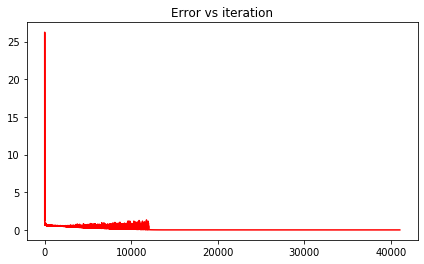

In [52]:
batches = [i for i in range(len(errors_mod))]
plt.figure(figsize = (7,4))
plt.plot(batches, errors, color='red')
plt.title('Error vs iteration')
plt.show()